In [29]:
import netCDF4 as nc
import os
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

## Читаем файл с точками

In [15]:
points_ds=pd.read_csv('./test_grid(10x2).csv', sep=',')
points_ds

id      x      y
0      1   8.72  76.04
1      2   8.72  75.84
2      3   8.72  75.64
3      4   8.72  75.44
4      5   9.72  76.44
..   ...    ...    ...
272  274  31.72  77.04
273  275  31.72  76.84
274  276  31.72  76.64
275  277  31.72  76.44
276  278  32.72  76.84

[277 rows x 3 columns]

In [16]:
def idx_by_2coord(coordinate, lat_array, lon_array):
    # делаем один двумерный массив, в котором каждая ячейка содержит и широту и долготу
    coord_array=np.concatenate((np.array([np.ravel(lat_array)]).T, np.array([np.ravel(lon_array)]).T), axis=1)
    # переворачиваем его к исходной форме
    coord_array=np.reshape(coord_array, (lat_array.shape[0],lat_array.shape[1], 2))
    # вычитаем из каждой координаты нашу координату
    dif=np.abs(coord_array-coordinate)
    # суммируем модули отклонения по обеим координатам
    dis=np.sum(dif, axis=2)
    
    #plt.imshow(dis) # центр "крестика" и есть наша точка
    
    # извлекаем индекс центра "крестика"
    geo_idx = np.unravel_index(dis.argmin(), dis.shape)
    return geo_idx

## Создаем дататест по сетке с ARCTIC reanalysis

In [17]:
nc_file = './arctic-ssh-y2002.nc'
ds = nc.Dataset(nc_file)

In [18]:
coordinates_from_map={'lat': points_ds['y'].tolist(),
                      'lon': points_ds['x'].tolist()}

names_dict={}

for i in range (len(coordinates_from_map['lat'])):
    name=str(coordinates_from_map['lat'][i])+'_'+str(coordinates_from_map['lon'][i])
    names_dict[name]=[]
#print(names_dict)

for j in range(365):  
    sea_level=np.array(ds['ssh'])[j]
    for i in range (len(coordinates_from_map['lat'])):       
        print('Day: '+str(j)+'Point: '+str(i))        

        in_lat = coordinates_from_map['lat'][i]
        in_lon = coordinates_from_map['lon'][i]

        lats = ds.variables['latitude'][:]
        lons = ds.variables['longitude'][:]

        idx = idx_by_2coord([in_lat, in_lon], lats, lons)

        value=sea_level[idx[0], idx[1]]
        name=str(coordinates_from_map['lat'][i])+'_'+str(coordinates_from_map['lon'][i])
        names_dict[name].append(value)
names_dict

Day: 0Point: 0
Day: 0Point: 1
Day: 0Point: 2
Day: 0Point: 3
Day: 0Point: 4
Day: 0Point: 5
Day: 0Point: 6
Day: 0Point: 7
Day: 0Point: 8
Day: 0Point: 9
Day: 0Point: 10
Day: 0Point: 11
Day: 0Point: 12
Day: 0Point: 13
Day: 0Point: 14
Day: 0Point: 15
Day: 0Point: 16
Day: 0Point: 17
Day: 0Point: 18
Day: 0Point: 19
Day: 0Point: 20
Day: 0Point: 21
Day: 0Point: 22
Day: 0Point: 23
Day: 0Point: 24
Day: 0Point: 25
Day: 0Point: 26
Day: 0Point: 27
Day: 0Point: 28
Day: 0Point: 29
Day: 0Point: 30
Day: 0Point: 31
Day: 0Point: 32
Day: 0Point: 33
Day: 0Point: 34
Day: 0Point: 35
Day: 0Point: 36
Day: 0Point: 37
Day: 0Point: 38
Day: 0Point: 39
Day: 0Point: 40
Day: 0Point: 41
Day: 0Point: 42
Day: 0Point: 43
Day: 0Point: 44
Day: 0Point: 45
Day: 0Point: 46
Day: 0Point: 47
Day: 0Point: 48
Day: 0Point: 49
Day: 0Point: 50
Day: 0Point: 51
Day: 0Point: 52
Day: 0Point: 53
Day: 0Point: 54
Day: 0Point: 55
Day: 0Point: 56
Day: 0Point: 57
Day: 0Point: 58
Day: 0Point: 59
Day: 0Point: 60
Day: 0Point: 61
Day: 0Point: 62
Da

Day: 1Point: 239
Day: 1Point: 240
Day: 1Point: 241
Day: 1Point: 242
Day: 1Point: 243
Day: 1Point: 244
Day: 1Point: 245
Day: 1Point: 246
Day: 1Point: 247
Day: 1Point: 248
Day: 1Point: 249
Day: 1Point: 250
Day: 1Point: 251
Day: 1Point: 252
Day: 1Point: 253
Day: 1Point: 254
Day: 1Point: 255
Day: 1Point: 256
Day: 1Point: 257
Day: 1Point: 258
Day: 1Point: 259
Day: 1Point: 260
Day: 1Point: 261
Day: 1Point: 262
Day: 1Point: 263
Day: 1Point: 264
Day: 1Point: 265
Day: 1Point: 266
Day: 1Point: 267
Day: 1Point: 268
Day: 1Point: 269
Day: 1Point: 270
Day: 1Point: 271
Day: 1Point: 272
Day: 1Point: 273
Day: 1Point: 274
Day: 1Point: 275
Day: 1Point: 276
Day: 2Point: 0
Day: 2Point: 1
Day: 2Point: 2
Day: 2Point: 3
Day: 2Point: 4
Day: 2Point: 5
Day: 2Point: 6
Day: 2Point: 7
Day: 2Point: 8
Day: 2Point: 9
Day: 2Point: 10
Day: 2Point: 11
Day: 2Point: 12
Day: 2Point: 13
Day: 2Point: 14
Day: 2Point: 15
Day: 2Point: 16
Day: 2Point: 17
Day: 2Point: 18
Day: 2Point: 19
Day: 2Point: 20
Day: 2Point: 21
Day: 2Point:

Day: 3Point: 182
Day: 3Point: 183
Day: 3Point: 184
Day: 3Point: 185
Day: 3Point: 186
Day: 3Point: 187
Day: 3Point: 188
Day: 3Point: 189
Day: 3Point: 190
Day: 3Point: 191
Day: 3Point: 192
Day: 3Point: 193
Day: 3Point: 194
Day: 3Point: 195
Day: 3Point: 196
Day: 3Point: 197
Day: 3Point: 198
Day: 3Point: 199
Day: 3Point: 200
Day: 3Point: 201
Day: 3Point: 202
Day: 3Point: 203
Day: 3Point: 204
Day: 3Point: 205
Day: 3Point: 206
Day: 3Point: 207
Day: 3Point: 208
Day: 3Point: 209
Day: 3Point: 210
Day: 3Point: 211
Day: 3Point: 212
Day: 3Point: 213
Day: 3Point: 214
Day: 3Point: 215
Day: 3Point: 216
Day: 3Point: 217
Day: 3Point: 218
Day: 3Point: 219
Day: 3Point: 220
Day: 3Point: 221
Day: 3Point: 222
Day: 3Point: 223
Day: 3Point: 224
Day: 3Point: 225
Day: 3Point: 226
Day: 3Point: 227
Day: 3Point: 228
Day: 3Point: 229
Day: 3Point: 230
Day: 3Point: 231
Day: 3Point: 232
Day: 3Point: 233
Day: 3Point: 234
Day: 3Point: 235
Day: 3Point: 236
Day: 3Point: 237
Day: 3Point: 238
Day: 3Point: 239
Day: 3Point: 2

Day: 5Point: 131
Day: 5Point: 132
Day: 5Point: 133
Day: 5Point: 134
Day: 5Point: 135
Day: 5Point: 136
Day: 5Point: 137
Day: 5Point: 138
Day: 5Point: 139
Day: 5Point: 140
Day: 5Point: 141
Day: 5Point: 142
Day: 5Point: 143
Day: 5Point: 144
Day: 5Point: 145
Day: 5Point: 146
Day: 5Point: 147
Day: 5Point: 148
Day: 5Point: 149
Day: 5Point: 150
Day: 5Point: 151
Day: 5Point: 152
Day: 5Point: 153
Day: 5Point: 154
Day: 5Point: 155
Day: 5Point: 156
Day: 5Point: 157
Day: 5Point: 158
Day: 5Point: 159
Day: 5Point: 160
Day: 5Point: 161
Day: 5Point: 162
Day: 5Point: 163
Day: 5Point: 164
Day: 5Point: 165
Day: 5Point: 166
Day: 5Point: 167
Day: 5Point: 168
Day: 5Point: 169
Day: 5Point: 170
Day: 5Point: 171
Day: 5Point: 172
Day: 5Point: 173
Day: 5Point: 174
Day: 5Point: 175
Day: 5Point: 176
Day: 5Point: 177
Day: 5Point: 178
Day: 5Point: 179
Day: 5Point: 180
Day: 5Point: 181
Day: 5Point: 182
Day: 5Point: 183
Day: 5Point: 184
Day: 5Point: 185
Day: 5Point: 186
Day: 5Point: 187
Day: 5Point: 188
Day: 5Point: 1

Day: 7Point: 77
Day: 7Point: 78
Day: 7Point: 79
Day: 7Point: 80
Day: 7Point: 81
Day: 7Point: 82
Day: 7Point: 83
Day: 7Point: 84
Day: 7Point: 85
Day: 7Point: 86
Day: 7Point: 87
Day: 7Point: 88
Day: 7Point: 89
Day: 7Point: 90
Day: 7Point: 91
Day: 7Point: 92
Day: 7Point: 93
Day: 7Point: 94
Day: 7Point: 95
Day: 7Point: 96
Day: 7Point: 97
Day: 7Point: 98
Day: 7Point: 99
Day: 7Point: 100
Day: 7Point: 101
Day: 7Point: 102
Day: 7Point: 103
Day: 7Point: 104
Day: 7Point: 105
Day: 7Point: 106
Day: 7Point: 107
Day: 7Point: 108
Day: 7Point: 109
Day: 7Point: 110
Day: 7Point: 111
Day: 7Point: 112
Day: 7Point: 113
Day: 7Point: 114
Day: 7Point: 115
Day: 7Point: 116
Day: 7Point: 117
Day: 7Point: 118
Day: 7Point: 119
Day: 7Point: 120
Day: 7Point: 121
Day: 7Point: 122
Day: 7Point: 123
Day: 7Point: 124
Day: 7Point: 125
Day: 7Point: 126
Day: 7Point: 127
Day: 7Point: 128
Day: 7Point: 129
Day: 7Point: 130
Day: 7Point: 131
Day: 7Point: 132
Day: 7Point: 133
Day: 7Point: 134
Day: 7Point: 135
Day: 7Point: 136
Day

Day: 9Point: 24
Day: 9Point: 25
Day: 9Point: 26
Day: 9Point: 27
Day: 9Point: 28
Day: 9Point: 29
Day: 9Point: 30
Day: 9Point: 31
Day: 9Point: 32
Day: 9Point: 33
Day: 9Point: 34
Day: 9Point: 35
Day: 9Point: 36
Day: 9Point: 37
Day: 9Point: 38
Day: 9Point: 39
Day: 9Point: 40
Day: 9Point: 41
Day: 9Point: 42
Day: 9Point: 43
Day: 9Point: 44
Day: 9Point: 45
Day: 9Point: 46
Day: 9Point: 47
Day: 9Point: 48
Day: 9Point: 49
Day: 9Point: 50
Day: 9Point: 51
Day: 9Point: 52
Day: 9Point: 53
Day: 9Point: 54
Day: 9Point: 55
Day: 9Point: 56
Day: 9Point: 57
Day: 9Point: 58
Day: 9Point: 59
Day: 9Point: 60
Day: 9Point: 61
Day: 9Point: 62
Day: 9Point: 63
Day: 9Point: 64
Day: 9Point: 65
Day: 9Point: 66
Day: 9Point: 67
Day: 9Point: 68
Day: 9Point: 69
Day: 9Point: 70
Day: 9Point: 71
Day: 9Point: 72
Day: 9Point: 73
Day: 9Point: 74
Day: 9Point: 75
Day: 9Point: 76
Day: 9Point: 77
Day: 9Point: 78
Day: 9Point: 79
Day: 9Point: 80
Day: 9Point: 81
Day: 9Point: 82
Day: 9Point: 83
Day: 9Point: 84
Day: 9Point: 85
Day: 9Po

Day: 10Point: 236
Day: 10Point: 237
Day: 10Point: 238
Day: 10Point: 239
Day: 10Point: 240
Day: 10Point: 241
Day: 10Point: 242
Day: 10Point: 243
Day: 10Point: 244
Day: 10Point: 245
Day: 10Point: 246
Day: 10Point: 247
Day: 10Point: 248
Day: 10Point: 249
Day: 10Point: 250
Day: 10Point: 251
Day: 10Point: 252
Day: 10Point: 253
Day: 10Point: 254
Day: 10Point: 255
Day: 10Point: 256
Day: 10Point: 257
Day: 10Point: 258
Day: 10Point: 259
Day: 10Point: 260
Day: 10Point: 261
Day: 10Point: 262
Day: 10Point: 263
Day: 10Point: 264
Day: 10Point: 265
Day: 10Point: 266
Day: 10Point: 267
Day: 10Point: 268
Day: 10Point: 269
Day: 10Point: 270
Day: 10Point: 271
Day: 10Point: 272
Day: 10Point: 273
Day: 10Point: 274
Day: 10Point: 275
Day: 10Point: 276
Day: 11Point: 0
Day: 11Point: 1
Day: 11Point: 2
Day: 11Point: 3
Day: 11Point: 4
Day: 11Point: 5
Day: 11Point: 6
Day: 11Point: 7
Day: 11Point: 8
Day: 11Point: 9
Day: 11Point: 10
Day: 11Point: 11
Day: 11Point: 12
Day: 11Point: 13
Day: 11Point: 14
Day: 11Point: 15


Day: 12Point: 155
Day: 12Point: 156
Day: 12Point: 157
Day: 12Point: 158
Day: 12Point: 159
Day: 12Point: 160
Day: 12Point: 161
Day: 12Point: 162
Day: 12Point: 163
Day: 12Point: 164
Day: 12Point: 165
Day: 12Point: 166
Day: 12Point: 167
Day: 12Point: 168
Day: 12Point: 169
Day: 12Point: 170
Day: 12Point: 171
Day: 12Point: 172
Day: 12Point: 173
Day: 12Point: 174
Day: 12Point: 175
Day: 12Point: 176
Day: 12Point: 177
Day: 12Point: 178
Day: 12Point: 179
Day: 12Point: 180
Day: 12Point: 181
Day: 12Point: 182
Day: 12Point: 183
Day: 12Point: 184
Day: 12Point: 185
Day: 12Point: 186
Day: 12Point: 187
Day: 12Point: 188
Day: 12Point: 189
Day: 12Point: 190
Day: 12Point: 191
Day: 12Point: 192
Day: 12Point: 193
Day: 12Point: 194
Day: 12Point: 195
Day: 12Point: 196
Day: 12Point: 197
Day: 12Point: 198
Day: 12Point: 199
Day: 12Point: 200
Day: 12Point: 201
Day: 12Point: 202
Day: 12Point: 203
Day: 12Point: 204
Day: 12Point: 205
Day: 12Point: 206
Day: 12Point: 207
Day: 12Point: 208
Day: 12Point: 209
Day: 12Poi

Day: 14Point: 79
Day: 14Point: 80
Day: 14Point: 81
Day: 14Point: 82
Day: 14Point: 83
Day: 14Point: 84
Day: 14Point: 85
Day: 14Point: 86
Day: 14Point: 87
Day: 14Point: 88
Day: 14Point: 89
Day: 14Point: 90
Day: 14Point: 91
Day: 14Point: 92
Day: 14Point: 93
Day: 14Point: 94
Day: 14Point: 95
Day: 14Point: 96
Day: 14Point: 97
Day: 14Point: 98
Day: 14Point: 99
Day: 14Point: 100
Day: 14Point: 101
Day: 14Point: 102
Day: 14Point: 103
Day: 14Point: 104
Day: 14Point: 105
Day: 14Point: 106
Day: 14Point: 107
Day: 14Point: 108
Day: 14Point: 109
Day: 14Point: 110
Day: 14Point: 111
Day: 14Point: 112
Day: 14Point: 113
Day: 14Point: 114
Day: 14Point: 115
Day: 14Point: 116
Day: 14Point: 117
Day: 14Point: 118
Day: 14Point: 119
Day: 14Point: 120
Day: 14Point: 121
Day: 14Point: 122
Day: 14Point: 123
Day: 14Point: 124
Day: 14Point: 125
Day: 14Point: 126
Day: 14Point: 127
Day: 14Point: 128
Day: 14Point: 129
Day: 14Point: 130
Day: 14Point: 131
Day: 14Point: 132
Day: 14Point: 133
Day: 14Point: 134
Day: 14Point:

Day: 16Point: 0
Day: 16Point: 1
Day: 16Point: 2
Day: 16Point: 3
Day: 16Point: 4
Day: 16Point: 5
Day: 16Point: 6
Day: 16Point: 7
Day: 16Point: 8
Day: 16Point: 9
Day: 16Point: 10
Day: 16Point: 11
Day: 16Point: 12
Day: 16Point: 13
Day: 16Point: 14
Day: 16Point: 15
Day: 16Point: 16
Day: 16Point: 17
Day: 16Point: 18
Day: 16Point: 19
Day: 16Point: 20
Day: 16Point: 21
Day: 16Point: 22
Day: 16Point: 23
Day: 16Point: 24
Day: 16Point: 25
Day: 16Point: 26
Day: 16Point: 27
Day: 16Point: 28
Day: 16Point: 29
Day: 16Point: 30
Day: 16Point: 31
Day: 16Point: 32
Day: 16Point: 33
Day: 16Point: 34
Day: 16Point: 35
Day: 16Point: 36
Day: 16Point: 37
Day: 16Point: 38
Day: 16Point: 39
Day: 16Point: 40
Day: 16Point: 41
Day: 16Point: 42
Day: 16Point: 43
Day: 16Point: 44
Day: 16Point: 45
Day: 16Point: 46
Day: 16Point: 47
Day: 16Point: 48
Day: 16Point: 49
Day: 16Point: 50
Day: 16Point: 51
Day: 16Point: 52
Day: 16Point: 53
Day: 16Point: 54
Day: 16Point: 55
Day: 16Point: 56
Day: 16Point: 57
Day: 16Point: 58
Day: 16

Day: 17Point: 209
Day: 17Point: 210
Day: 17Point: 211
Day: 17Point: 212
Day: 17Point: 213
Day: 17Point: 214
Day: 17Point: 215
Day: 17Point: 216
Day: 17Point: 217
Day: 17Point: 218
Day: 17Point: 219
Day: 17Point: 220
Day: 17Point: 221
Day: 17Point: 222
Day: 17Point: 223
Day: 17Point: 224
Day: 17Point: 225
Day: 17Point: 226
Day: 17Point: 227
Day: 17Point: 228
Day: 17Point: 229
Day: 17Point: 230
Day: 17Point: 231
Day: 17Point: 232
Day: 17Point: 233
Day: 17Point: 234
Day: 17Point: 235
Day: 17Point: 236
Day: 17Point: 237
Day: 17Point: 238
Day: 17Point: 239
Day: 17Point: 240
Day: 17Point: 241
Day: 17Point: 242
Day: 17Point: 243
Day: 17Point: 244
Day: 17Point: 245
Day: 17Point: 246
Day: 17Point: 247
Day: 17Point: 248
Day: 17Point: 249
Day: 17Point: 250
Day: 17Point: 251
Day: 17Point: 252
Day: 17Point: 253
Day: 17Point: 254
Day: 17Point: 255
Day: 17Point: 256
Day: 17Point: 257
Day: 17Point: 258
Day: 17Point: 259
Day: 17Point: 260
Day: 17Point: 261
Day: 17Point: 262
Day: 17Point: 263
Day: 17Poi

Day: 19Point: 132
Day: 19Point: 133
Day: 19Point: 134
Day: 19Point: 135
Day: 19Point: 136
Day: 19Point: 137
Day: 19Point: 138
Day: 19Point: 139
Day: 19Point: 140
Day: 19Point: 141
Day: 19Point: 142
Day: 19Point: 143
Day: 19Point: 144
Day: 19Point: 145
Day: 19Point: 146
Day: 19Point: 147
Day: 19Point: 148
Day: 19Point: 149
Day: 19Point: 150
Day: 19Point: 151
Day: 19Point: 152
Day: 19Point: 153
Day: 19Point: 154
Day: 19Point: 155
Day: 19Point: 156
Day: 19Point: 157
Day: 19Point: 158
Day: 19Point: 159
Day: 19Point: 160
Day: 19Point: 161
Day: 19Point: 162
Day: 19Point: 163
Day: 19Point: 164
Day: 19Point: 165
Day: 19Point: 166
Day: 19Point: 167
Day: 19Point: 168
Day: 19Point: 169
Day: 19Point: 170
Day: 19Point: 171
Day: 19Point: 172
Day: 19Point: 173
Day: 19Point: 174
Day: 19Point: 175
Day: 19Point: 176
Day: 19Point: 177
Day: 19Point: 178
Day: 19Point: 179
Day: 19Point: 180
Day: 19Point: 181
Day: 19Point: 182
Day: 19Point: 183
Day: 19Point: 184
Day: 19Point: 185
Day: 19Point: 186
Day: 19Poi

Day: 21Point: 51
Day: 21Point: 52
Day: 21Point: 53
Day: 21Point: 54
Day: 21Point: 55
Day: 21Point: 56
Day: 21Point: 57
Day: 21Point: 58
Day: 21Point: 59
Day: 21Point: 60
Day: 21Point: 61
Day: 21Point: 62
Day: 21Point: 63
Day: 21Point: 64
Day: 21Point: 65
Day: 21Point: 66
Day: 21Point: 67
Day: 21Point: 68
Day: 21Point: 69
Day: 21Point: 70
Day: 21Point: 71
Day: 21Point: 72
Day: 21Point: 73
Day: 21Point: 74
Day: 21Point: 75
Day: 21Point: 76
Day: 21Point: 77
Day: 21Point: 78
Day: 21Point: 79
Day: 21Point: 80
Day: 21Point: 81
Day: 21Point: 82
Day: 21Point: 83
Day: 21Point: 84
Day: 21Point: 85
Day: 21Point: 86
Day: 21Point: 87
Day: 21Point: 88
Day: 21Point: 89
Day: 21Point: 90
Day: 21Point: 91
Day: 21Point: 92
Day: 21Point: 93
Day: 21Point: 94
Day: 21Point: 95
Day: 21Point: 96
Day: 21Point: 97
Day: 21Point: 98
Day: 21Point: 99
Day: 21Point: 100
Day: 21Point: 101
Day: 21Point: 102
Day: 21Point: 103
Day: 21Point: 104
Day: 21Point: 105
Day: 21Point: 106
Day: 21Point: 107
Day: 21Point: 108
Day: 

Day: 22Point: 258
Day: 22Point: 259
Day: 22Point: 260
Day: 22Point: 261
Day: 22Point: 262
Day: 22Point: 263
Day: 22Point: 264
Day: 22Point: 265
Day: 22Point: 266
Day: 22Point: 267
Day: 22Point: 268
Day: 22Point: 269
Day: 22Point: 270
Day: 22Point: 271
Day: 22Point: 272
Day: 22Point: 273
Day: 22Point: 274
Day: 22Point: 275
Day: 22Point: 276
Day: 23Point: 0
Day: 23Point: 1
Day: 23Point: 2
Day: 23Point: 3
Day: 23Point: 4
Day: 23Point: 5
Day: 23Point: 6
Day: 23Point: 7
Day: 23Point: 8
Day: 23Point: 9
Day: 23Point: 10
Day: 23Point: 11
Day: 23Point: 12
Day: 23Point: 13
Day: 23Point: 14
Day: 23Point: 15
Day: 23Point: 16
Day: 23Point: 17
Day: 23Point: 18
Day: 23Point: 19
Day: 23Point: 20
Day: 23Point: 21
Day: 23Point: 22
Day: 23Point: 23
Day: 23Point: 24
Day: 23Point: 25
Day: 23Point: 26
Day: 23Point: 27
Day: 23Point: 28
Day: 23Point: 29
Day: 23Point: 30
Day: 23Point: 31
Day: 23Point: 32
Day: 23Point: 33
Day: 23Point: 34
Day: 23Point: 35
Day: 23Point: 36
Day: 23Point: 37
Day: 23Point: 38
Day: 

Day: 24Point: 180
Day: 24Point: 181
Day: 24Point: 182
Day: 24Point: 183
Day: 24Point: 184
Day: 24Point: 185
Day: 24Point: 186
Day: 24Point: 187
Day: 24Point: 188
Day: 24Point: 189
Day: 24Point: 190
Day: 24Point: 191
Day: 24Point: 192
Day: 24Point: 193
Day: 24Point: 194
Day: 24Point: 195
Day: 24Point: 196
Day: 24Point: 197
Day: 24Point: 198
Day: 24Point: 199
Day: 24Point: 200
Day: 24Point: 201
Day: 24Point: 202
Day: 24Point: 203
Day: 24Point: 204
Day: 24Point: 205
Day: 24Point: 206
Day: 24Point: 207
Day: 24Point: 208
Day: 24Point: 209
Day: 24Point: 210
Day: 24Point: 211
Day: 24Point: 212
Day: 24Point: 213
Day: 24Point: 214
Day: 24Point: 215
Day: 24Point: 216
Day: 24Point: 217
Day: 24Point: 218
Day: 24Point: 219
Day: 24Point: 220
Day: 24Point: 221
Day: 24Point: 222
Day: 24Point: 223
Day: 24Point: 224
Day: 24Point: 225
Day: 24Point: 226
Day: 24Point: 227
Day: 24Point: 228
Day: 24Point: 229
Day: 24Point: 230
Day: 24Point: 231
Day: 24Point: 232
Day: 24Point: 233
Day: 24Point: 234
Day: 24Poi

Day: 26Point: 102
Day: 26Point: 103
Day: 26Point: 104
Day: 26Point: 105
Day: 26Point: 106
Day: 26Point: 107
Day: 26Point: 108
Day: 26Point: 109
Day: 26Point: 110
Day: 26Point: 111
Day: 26Point: 112
Day: 26Point: 113
Day: 26Point: 114
Day: 26Point: 115
Day: 26Point: 116
Day: 26Point: 117
Day: 26Point: 118
Day: 26Point: 119
Day: 26Point: 120
Day: 26Point: 121
Day: 26Point: 122
Day: 26Point: 123
Day: 26Point: 124
Day: 26Point: 125
Day: 26Point: 126
Day: 26Point: 127
Day: 26Point: 128
Day: 26Point: 129
Day: 26Point: 130
Day: 26Point: 131
Day: 26Point: 132
Day: 26Point: 133
Day: 26Point: 134
Day: 26Point: 135
Day: 26Point: 136
Day: 26Point: 137
Day: 26Point: 138
Day: 26Point: 139
Day: 26Point: 140
Day: 26Point: 141
Day: 26Point: 142
Day: 26Point: 143
Day: 26Point: 144
Day: 26Point: 145
Day: 26Point: 146
Day: 26Point: 147
Day: 26Point: 148
Day: 26Point: 149
Day: 26Point: 150
Day: 26Point: 151
Day: 26Point: 152
Day: 26Point: 153
Day: 26Point: 154
Day: 26Point: 155
Day: 26Point: 156
Day: 26Poi

Day: 28Point: 26
Day: 28Point: 27
Day: 28Point: 28
Day: 28Point: 29
Day: 28Point: 30
Day: 28Point: 31
Day: 28Point: 32
Day: 28Point: 33
Day: 28Point: 34
Day: 28Point: 35
Day: 28Point: 36
Day: 28Point: 37
Day: 28Point: 38
Day: 28Point: 39
Day: 28Point: 40
Day: 28Point: 41
Day: 28Point: 42
Day: 28Point: 43
Day: 28Point: 44
Day: 28Point: 45
Day: 28Point: 46
Day: 28Point: 47
Day: 28Point: 48
Day: 28Point: 49
Day: 28Point: 50
Day: 28Point: 51
Day: 28Point: 52
Day: 28Point: 53
Day: 28Point: 54
Day: 28Point: 55
Day: 28Point: 56
Day: 28Point: 57
Day: 28Point: 58
Day: 28Point: 59
Day: 28Point: 60
Day: 28Point: 61
Day: 28Point: 62
Day: 28Point: 63
Day: 28Point: 64
Day: 28Point: 65
Day: 28Point: 66
Day: 28Point: 67
Day: 28Point: 68
Day: 28Point: 69
Day: 28Point: 70
Day: 28Point: 71
Day: 28Point: 72
Day: 28Point: 73
Day: 28Point: 74
Day: 28Point: 75
Day: 28Point: 76
Day: 28Point: 77
Day: 28Point: 78
Day: 28Point: 79
Day: 28Point: 80
Day: 28Point: 81
Day: 28Point: 82
Day: 28Point: 83
Day: 28Point: 

Day: 29Point: 224
Day: 29Point: 225
Day: 29Point: 226
Day: 29Point: 227
Day: 29Point: 228
Day: 29Point: 229
Day: 29Point: 230
Day: 29Point: 231
Day: 29Point: 232
Day: 29Point: 233
Day: 29Point: 234
Day: 29Point: 235
Day: 29Point: 236
Day: 29Point: 237
Day: 29Point: 238
Day: 29Point: 239
Day: 29Point: 240
Day: 29Point: 241
Day: 29Point: 242
Day: 29Point: 243
Day: 29Point: 244
Day: 29Point: 245
Day: 29Point: 246
Day: 29Point: 247
Day: 29Point: 248
Day: 29Point: 249
Day: 29Point: 250
Day: 29Point: 251
Day: 29Point: 252
Day: 29Point: 253
Day: 29Point: 254
Day: 29Point: 255
Day: 29Point: 256
Day: 29Point: 257
Day: 29Point: 258
Day: 29Point: 259
Day: 29Point: 260
Day: 29Point: 261
Day: 29Point: 262
Day: 29Point: 263
Day: 29Point: 264
Day: 29Point: 265
Day: 29Point: 266
Day: 29Point: 267
Day: 29Point: 268
Day: 29Point: 269
Day: 29Point: 270
Day: 29Point: 271
Day: 29Point: 272
Day: 29Point: 273
Day: 29Point: 274
Day: 29Point: 275
Day: 29Point: 276
Day: 30Point: 0
Day: 30Point: 1
Day: 30Point: 

Day: 31Point: 143
Day: 31Point: 144
Day: 31Point: 145
Day: 31Point: 146
Day: 31Point: 147
Day: 31Point: 148
Day: 31Point: 149
Day: 31Point: 150
Day: 31Point: 151
Day: 31Point: 152
Day: 31Point: 153
Day: 31Point: 154
Day: 31Point: 155
Day: 31Point: 156
Day: 31Point: 157
Day: 31Point: 158
Day: 31Point: 159
Day: 31Point: 160
Day: 31Point: 161
Day: 31Point: 162
Day: 31Point: 163
Day: 31Point: 164
Day: 31Point: 165
Day: 31Point: 166
Day: 31Point: 167
Day: 31Point: 168
Day: 31Point: 169
Day: 31Point: 170
Day: 31Point: 171
Day: 31Point: 172
Day: 31Point: 173
Day: 31Point: 174
Day: 31Point: 175
Day: 31Point: 176
Day: 31Point: 177
Day: 31Point: 178
Day: 31Point: 179
Day: 31Point: 180
Day: 31Point: 181
Day: 31Point: 182
Day: 31Point: 183
Day: 31Point: 184
Day: 31Point: 185
Day: 31Point: 186
Day: 31Point: 187
Day: 31Point: 188
Day: 31Point: 189
Day: 31Point: 190
Day: 31Point: 191
Day: 31Point: 192
Day: 31Point: 193
Day: 31Point: 194
Day: 31Point: 195
Day: 31Point: 196
Day: 31Point: 197
Day: 31Poi

Day: 33Point: 78
Day: 33Point: 79
Day: 33Point: 80
Day: 33Point: 81
Day: 33Point: 82
Day: 33Point: 83
Day: 33Point: 84
Day: 33Point: 85
Day: 33Point: 86
Day: 33Point: 87
Day: 33Point: 88
Day: 33Point: 89
Day: 33Point: 90
Day: 33Point: 91
Day: 33Point: 92
Day: 33Point: 93
Day: 33Point: 94
Day: 33Point: 95
Day: 33Point: 96
Day: 33Point: 97
Day: 33Point: 98
Day: 33Point: 99
Day: 33Point: 100
Day: 33Point: 101
Day: 33Point: 102
Day: 33Point: 103
Day: 33Point: 104
Day: 33Point: 105
Day: 33Point: 106
Day: 33Point: 107
Day: 33Point: 108
Day: 33Point: 109
Day: 33Point: 110
Day: 33Point: 111
Day: 33Point: 112
Day: 33Point: 113
Day: 33Point: 114
Day: 33Point: 115
Day: 33Point: 116
Day: 33Point: 117
Day: 33Point: 118
Day: 33Point: 119
Day: 33Point: 120
Day: 33Point: 121
Day: 33Point: 122
Day: 33Point: 123
Day: 33Point: 124
Day: 33Point: 125
Day: 33Point: 126
Day: 33Point: 127
Day: 33Point: 128
Day: 33Point: 129
Day: 33Point: 130
Day: 33Point: 131
Day: 33Point: 132
Day: 33Point: 133
Day: 33Point: 

Day: 35Point: 0
Day: 35Point: 1
Day: 35Point: 2
Day: 35Point: 3
Day: 35Point: 4
Day: 35Point: 5
Day: 35Point: 6
Day: 35Point: 7
Day: 35Point: 8
Day: 35Point: 9
Day: 35Point: 10
Day: 35Point: 11
Day: 35Point: 12
Day: 35Point: 13
Day: 35Point: 14
Day: 35Point: 15
Day: 35Point: 16
Day: 35Point: 17
Day: 35Point: 18
Day: 35Point: 19
Day: 35Point: 20
Day: 35Point: 21
Day: 35Point: 22
Day: 35Point: 23
Day: 35Point: 24
Day: 35Point: 25
Day: 35Point: 26
Day: 35Point: 27
Day: 35Point: 28
Day: 35Point: 29
Day: 35Point: 30
Day: 35Point: 31
Day: 35Point: 32
Day: 35Point: 33
Day: 35Point: 34
Day: 35Point: 35
Day: 35Point: 36
Day: 35Point: 37
Day: 35Point: 38
Day: 35Point: 39
Day: 35Point: 40
Day: 35Point: 41
Day: 35Point: 42
Day: 35Point: 43
Day: 35Point: 44
Day: 35Point: 45
Day: 35Point: 46
Day: 35Point: 47
Day: 35Point: 48
Day: 35Point: 49
Day: 35Point: 50
Day: 35Point: 51
Day: 35Point: 52
Day: 35Point: 53
Day: 35Point: 54
Day: 35Point: 55
Day: 35Point: 56
Day: 35Point: 57
Day: 35Point: 58
Day: 35

Day: 36Point: 204
Day: 36Point: 205
Day: 36Point: 206
Day: 36Point: 207
Day: 36Point: 208
Day: 36Point: 209
Day: 36Point: 210
Day: 36Point: 211
Day: 36Point: 212
Day: 36Point: 213
Day: 36Point: 214
Day: 36Point: 215
Day: 36Point: 216
Day: 36Point: 217
Day: 36Point: 218
Day: 36Point: 219
Day: 36Point: 220
Day: 36Point: 221
Day: 36Point: 222
Day: 36Point: 223
Day: 36Point: 224
Day: 36Point: 225
Day: 36Point: 226
Day: 36Point: 227
Day: 36Point: 228
Day: 36Point: 229
Day: 36Point: 230
Day: 36Point: 231
Day: 36Point: 232
Day: 36Point: 233
Day: 36Point: 234
Day: 36Point: 235
Day: 36Point: 236
Day: 36Point: 237
Day: 36Point: 238
Day: 36Point: 239
Day: 36Point: 240
Day: 36Point: 241
Day: 36Point: 242
Day: 36Point: 243
Day: 36Point: 244
Day: 36Point: 245
Day: 36Point: 246
Day: 36Point: 247
Day: 36Point: 248
Day: 36Point: 249
Day: 36Point: 250
Day: 36Point: 251
Day: 36Point: 252
Day: 36Point: 253
Day: 36Point: 254
Day: 36Point: 255
Day: 36Point: 256
Day: 36Point: 257
Day: 36Point: 258
Day: 36Poi

Day: 38Point: 126
Day: 38Point: 127
Day: 38Point: 128
Day: 38Point: 129
Day: 38Point: 130
Day: 38Point: 131
Day: 38Point: 132
Day: 38Point: 133
Day: 38Point: 134
Day: 38Point: 135
Day: 38Point: 136
Day: 38Point: 137
Day: 38Point: 138
Day: 38Point: 139
Day: 38Point: 140
Day: 38Point: 141
Day: 38Point: 142
Day: 38Point: 143
Day: 38Point: 144
Day: 38Point: 145
Day: 38Point: 146
Day: 38Point: 147
Day: 38Point: 148
Day: 38Point: 149
Day: 38Point: 150
Day: 38Point: 151
Day: 38Point: 152
Day: 38Point: 153
Day: 38Point: 154
Day: 38Point: 155
Day: 38Point: 156
Day: 38Point: 157
Day: 38Point: 158
Day: 38Point: 159
Day: 38Point: 160
Day: 38Point: 161
Day: 38Point: 162
Day: 38Point: 163
Day: 38Point: 164
Day: 38Point: 165
Day: 38Point: 166
Day: 38Point: 167
Day: 38Point: 168
Day: 38Point: 169
Day: 38Point: 170
Day: 38Point: 171
Day: 38Point: 172
Day: 38Point: 173
Day: 38Point: 174
Day: 38Point: 175
Day: 38Point: 176
Day: 38Point: 177
Day: 38Point: 178
Day: 38Point: 179
Day: 38Point: 180
Day: 38Poi

Day: 40Point: 53
Day: 40Point: 54
Day: 40Point: 55
Day: 40Point: 56
Day: 40Point: 57
Day: 40Point: 58
Day: 40Point: 59
Day: 40Point: 60
Day: 40Point: 61
Day: 40Point: 62
Day: 40Point: 63
Day: 40Point: 64
Day: 40Point: 65
Day: 40Point: 66
Day: 40Point: 67
Day: 40Point: 68
Day: 40Point: 69
Day: 40Point: 70
Day: 40Point: 71
Day: 40Point: 72
Day: 40Point: 73
Day: 40Point: 74
Day: 40Point: 75
Day: 40Point: 76
Day: 40Point: 77
Day: 40Point: 78
Day: 40Point: 79
Day: 40Point: 80
Day: 40Point: 81
Day: 40Point: 82
Day: 40Point: 83
Day: 40Point: 84
Day: 40Point: 85
Day: 40Point: 86
Day: 40Point: 87
Day: 40Point: 88
Day: 40Point: 89
Day: 40Point: 90
Day: 40Point: 91
Day: 40Point: 92
Day: 40Point: 93
Day: 40Point: 94
Day: 40Point: 95
Day: 40Point: 96
Day: 40Point: 97
Day: 40Point: 98
Day: 40Point: 99
Day: 40Point: 100
Day: 40Point: 101
Day: 40Point: 102
Day: 40Point: 103
Day: 40Point: 104
Day: 40Point: 105
Day: 40Point: 106
Day: 40Point: 107
Day: 40Point: 108
Day: 40Point: 109
Day: 40Point: 110
Day

Day: 41Point: 256
Day: 41Point: 257
Day: 41Point: 258
Day: 41Point: 259
Day: 41Point: 260
Day: 41Point: 261
Day: 41Point: 262
Day: 41Point: 263
Day: 41Point: 264
Day: 41Point: 265
Day: 41Point: 266
Day: 41Point: 267
Day: 41Point: 268
Day: 41Point: 269
Day: 41Point: 270
Day: 41Point: 271
Day: 41Point: 272
Day: 41Point: 273
Day: 41Point: 274
Day: 41Point: 275
Day: 41Point: 276
Day: 42Point: 0
Day: 42Point: 1
Day: 42Point: 2
Day: 42Point: 3
Day: 42Point: 4
Day: 42Point: 5
Day: 42Point: 6
Day: 42Point: 7
Day: 42Point: 8
Day: 42Point: 9
Day: 42Point: 10
Day: 42Point: 11
Day: 42Point: 12
Day: 42Point: 13
Day: 42Point: 14
Day: 42Point: 15
Day: 42Point: 16
Day: 42Point: 17
Day: 42Point: 18
Day: 42Point: 19
Day: 42Point: 20
Day: 42Point: 21
Day: 42Point: 22
Day: 42Point: 23
Day: 42Point: 24
Day: 42Point: 25
Day: 42Point: 26
Day: 42Point: 27
Day: 42Point: 28
Day: 42Point: 29
Day: 42Point: 30
Day: 42Point: 31
Day: 42Point: 32
Day: 42Point: 33
Day: 42Point: 34
Day: 42Point: 35
Day: 42Point: 36
Day

Day: 43Point: 182
Day: 43Point: 183
Day: 43Point: 184
Day: 43Point: 185
Day: 43Point: 186
Day: 43Point: 187
Day: 43Point: 188
Day: 43Point: 189
Day: 43Point: 190
Day: 43Point: 191
Day: 43Point: 192
Day: 43Point: 193
Day: 43Point: 194
Day: 43Point: 195
Day: 43Point: 196
Day: 43Point: 197
Day: 43Point: 198
Day: 43Point: 199
Day: 43Point: 200
Day: 43Point: 201
Day: 43Point: 202
Day: 43Point: 203
Day: 43Point: 204
Day: 43Point: 205
Day: 43Point: 206
Day: 43Point: 207
Day: 43Point: 208
Day: 43Point: 209
Day: 43Point: 210
Day: 43Point: 211
Day: 43Point: 212
Day: 43Point: 213
Day: 43Point: 214
Day: 43Point: 215
Day: 43Point: 216
Day: 43Point: 217
Day: 43Point: 218
Day: 43Point: 219
Day: 43Point: 220
Day: 43Point: 221
Day: 43Point: 222
Day: 43Point: 223
Day: 43Point: 224
Day: 43Point: 225
Day: 43Point: 226
Day: 43Point: 227
Day: 43Point: 228
Day: 43Point: 229
Day: 43Point: 230
Day: 43Point: 231
Day: 43Point: 232
Day: 43Point: 233
Day: 43Point: 234
Day: 43Point: 235
Day: 43Point: 236
Day: 43Poi

Day: 45Point: 100
Day: 45Point: 101
Day: 45Point: 102
Day: 45Point: 103
Day: 45Point: 104
Day: 45Point: 105
Day: 45Point: 106
Day: 45Point: 107
Day: 45Point: 108
Day: 45Point: 109
Day: 45Point: 110
Day: 45Point: 111
Day: 45Point: 112
Day: 45Point: 113
Day: 45Point: 114
Day: 45Point: 115
Day: 45Point: 116
Day: 45Point: 117
Day: 45Point: 118
Day: 45Point: 119
Day: 45Point: 120
Day: 45Point: 121
Day: 45Point: 122
Day: 45Point: 123
Day: 45Point: 124
Day: 45Point: 125
Day: 45Point: 126
Day: 45Point: 127
Day: 45Point: 128
Day: 45Point: 129
Day: 45Point: 130
Day: 45Point: 131
Day: 45Point: 132
Day: 45Point: 133
Day: 45Point: 134
Day: 45Point: 135
Day: 45Point: 136
Day: 45Point: 137
Day: 45Point: 138
Day: 45Point: 139
Day: 45Point: 140
Day: 45Point: 141
Day: 45Point: 142
Day: 45Point: 143
Day: 45Point: 144
Day: 45Point: 145
Day: 45Point: 146
Day: 45Point: 147
Day: 45Point: 148
Day: 45Point: 149
Day: 45Point: 150
Day: 45Point: 151
Day: 45Point: 152
Day: 45Point: 153
Day: 45Point: 154
Day: 45Poi

Day: 47Point: 25
Day: 47Point: 26
Day: 47Point: 27
Day: 47Point: 28
Day: 47Point: 29
Day: 47Point: 30
Day: 47Point: 31
Day: 47Point: 32
Day: 47Point: 33
Day: 47Point: 34
Day: 47Point: 35
Day: 47Point: 36
Day: 47Point: 37
Day: 47Point: 38
Day: 47Point: 39
Day: 47Point: 40
Day: 47Point: 41
Day: 47Point: 42
Day: 47Point: 43
Day: 47Point: 44
Day: 47Point: 45
Day: 47Point: 46
Day: 47Point: 47
Day: 47Point: 48
Day: 47Point: 49
Day: 47Point: 50
Day: 47Point: 51
Day: 47Point: 52
Day: 47Point: 53
Day: 47Point: 54
Day: 47Point: 55
Day: 47Point: 56
Day: 47Point: 57
Day: 47Point: 58
Day: 47Point: 59
Day: 47Point: 60
Day: 47Point: 61
Day: 47Point: 62
Day: 47Point: 63
Day: 47Point: 64
Day: 47Point: 65
Day: 47Point: 66
Day: 47Point: 67
Day: 47Point: 68
Day: 47Point: 69
Day: 47Point: 70
Day: 47Point: 71
Day: 47Point: 72
Day: 47Point: 73
Day: 47Point: 74
Day: 47Point: 75
Day: 47Point: 76
Day: 47Point: 77
Day: 47Point: 78
Day: 47Point: 79
Day: 47Point: 80
Day: 47Point: 81
Day: 47Point: 82
Day: 47Point: 

Day: 48Point: 235
Day: 48Point: 236
Day: 48Point: 237
Day: 48Point: 238
Day: 48Point: 239
Day: 48Point: 240
Day: 48Point: 241
Day: 48Point: 242
Day: 48Point: 243
Day: 48Point: 244
Day: 48Point: 245
Day: 48Point: 246
Day: 48Point: 247
Day: 48Point: 248
Day: 48Point: 249
Day: 48Point: 250
Day: 48Point: 251
Day: 48Point: 252
Day: 48Point: 253
Day: 48Point: 254
Day: 48Point: 255
Day: 48Point: 256
Day: 48Point: 257
Day: 48Point: 258
Day: 48Point: 259
Day: 48Point: 260
Day: 48Point: 261
Day: 48Point: 262
Day: 48Point: 263
Day: 48Point: 264
Day: 48Point: 265
Day: 48Point: 266
Day: 48Point: 267
Day: 48Point: 268
Day: 48Point: 269
Day: 48Point: 270
Day: 48Point: 271
Day: 48Point: 272
Day: 48Point: 273
Day: 48Point: 274
Day: 48Point: 275
Day: 48Point: 276
Day: 49Point: 0
Day: 49Point: 1
Day: 49Point: 2
Day: 49Point: 3
Day: 49Point: 4
Day: 49Point: 5
Day: 49Point: 6
Day: 49Point: 7
Day: 49Point: 8
Day: 49Point: 9
Day: 49Point: 10
Day: 49Point: 11
Day: 49Point: 12
Day: 49Point: 13
Day: 49Point: 14

Day: 50Point: 151
Day: 50Point: 152
Day: 50Point: 153
Day: 50Point: 154
Day: 50Point: 155
Day: 50Point: 156
Day: 50Point: 157
Day: 50Point: 158
Day: 50Point: 159
Day: 50Point: 160
Day: 50Point: 161
Day: 50Point: 162
Day: 50Point: 163
Day: 50Point: 164
Day: 50Point: 165
Day: 50Point: 166
Day: 50Point: 167
Day: 50Point: 168
Day: 50Point: 169
Day: 50Point: 170
Day: 50Point: 171
Day: 50Point: 172
Day: 50Point: 173
Day: 50Point: 174
Day: 50Point: 175
Day: 50Point: 176
Day: 50Point: 177
Day: 50Point: 178
Day: 50Point: 179
Day: 50Point: 180
Day: 50Point: 181
Day: 50Point: 182
Day: 50Point: 183
Day: 50Point: 184
Day: 50Point: 185
Day: 50Point: 186
Day: 50Point: 187
Day: 50Point: 188
Day: 50Point: 189
Day: 50Point: 190
Day: 50Point: 191
Day: 50Point: 192
Day: 50Point: 193
Day: 50Point: 194
Day: 50Point: 195
Day: 50Point: 196
Day: 50Point: 197
Day: 50Point: 198
Day: 50Point: 199
Day: 50Point: 200
Day: 50Point: 201
Day: 50Point: 202
Day: 50Point: 203
Day: 50Point: 204
Day: 50Point: 205
Day: 50Poi

Day: 52Point: 77
Day: 52Point: 78
Day: 52Point: 79
Day: 52Point: 80
Day: 52Point: 81
Day: 52Point: 82
Day: 52Point: 83
Day: 52Point: 84
Day: 52Point: 85
Day: 52Point: 86
Day: 52Point: 87
Day: 52Point: 88
Day: 52Point: 89
Day: 52Point: 90
Day: 52Point: 91
Day: 52Point: 92
Day: 52Point: 93
Day: 52Point: 94
Day: 52Point: 95
Day: 52Point: 96
Day: 52Point: 97
Day: 52Point: 98
Day: 52Point: 99
Day: 52Point: 100
Day: 52Point: 101
Day: 52Point: 102
Day: 52Point: 103
Day: 52Point: 104
Day: 52Point: 105
Day: 52Point: 106
Day: 52Point: 107
Day: 52Point: 108
Day: 52Point: 109
Day: 52Point: 110
Day: 52Point: 111
Day: 52Point: 112
Day: 52Point: 113
Day: 52Point: 114
Day: 52Point: 115
Day: 52Point: 116
Day: 52Point: 117
Day: 52Point: 118
Day: 52Point: 119
Day: 52Point: 120
Day: 52Point: 121
Day: 52Point: 122
Day: 52Point: 123
Day: 52Point: 124
Day: 52Point: 125
Day: 52Point: 126
Day: 52Point: 127
Day: 52Point: 128
Day: 52Point: 129
Day: 52Point: 130
Day: 52Point: 131
Day: 52Point: 132
Day: 52Point: 1

Day: 54Point: 0
Day: 54Point: 1
Day: 54Point: 2
Day: 54Point: 3
Day: 54Point: 4
Day: 54Point: 5
Day: 54Point: 6
Day: 54Point: 7
Day: 54Point: 8
Day: 54Point: 9
Day: 54Point: 10
Day: 54Point: 11
Day: 54Point: 12
Day: 54Point: 13
Day: 54Point: 14
Day: 54Point: 15
Day: 54Point: 16
Day: 54Point: 17
Day: 54Point: 18
Day: 54Point: 19
Day: 54Point: 20
Day: 54Point: 21
Day: 54Point: 22
Day: 54Point: 23
Day: 54Point: 24
Day: 54Point: 25
Day: 54Point: 26
Day: 54Point: 27
Day: 54Point: 28
Day: 54Point: 29
Day: 54Point: 30
Day: 54Point: 31
Day: 54Point: 32
Day: 54Point: 33
Day: 54Point: 34
Day: 54Point: 35
Day: 54Point: 36
Day: 54Point: 37
Day: 54Point: 38
Day: 54Point: 39
Day: 54Point: 40
Day: 54Point: 41
Day: 54Point: 42
Day: 54Point: 43
Day: 54Point: 44
Day: 54Point: 45
Day: 54Point: 46
Day: 54Point: 47
Day: 54Point: 48
Day: 54Point: 49
Day: 54Point: 50
Day: 54Point: 51
Day: 54Point: 52
Day: 54Point: 53
Day: 54Point: 54
Day: 54Point: 55
Day: 54Point: 56
Day: 54Point: 57
Day: 54Point: 58
Day: 54

Day: 55Point: 206
Day: 55Point: 207
Day: 55Point: 208
Day: 55Point: 209
Day: 55Point: 210
Day: 55Point: 211
Day: 55Point: 212
Day: 55Point: 213
Day: 55Point: 214
Day: 55Point: 215
Day: 55Point: 216
Day: 55Point: 217
Day: 55Point: 218
Day: 55Point: 219
Day: 55Point: 220
Day: 55Point: 221
Day: 55Point: 222
Day: 55Point: 223
Day: 55Point: 224
Day: 55Point: 225
Day: 55Point: 226
Day: 55Point: 227
Day: 55Point: 228
Day: 55Point: 229
Day: 55Point: 230
Day: 55Point: 231
Day: 55Point: 232
Day: 55Point: 233
Day: 55Point: 234
Day: 55Point: 235
Day: 55Point: 236
Day: 55Point: 237
Day: 55Point: 238
Day: 55Point: 239
Day: 55Point: 240
Day: 55Point: 241
Day: 55Point: 242
Day: 55Point: 243
Day: 55Point: 244
Day: 55Point: 245
Day: 55Point: 246
Day: 55Point: 247
Day: 55Point: 248
Day: 55Point: 249
Day: 55Point: 250
Day: 55Point: 251
Day: 55Point: 252
Day: 55Point: 253
Day: 55Point: 254
Day: 55Point: 255
Day: 55Point: 256
Day: 55Point: 257
Day: 55Point: 258
Day: 55Point: 259
Day: 55Point: 260
Day: 55Poi

Day: 57Point: 129
Day: 57Point: 130
Day: 57Point: 131
Day: 57Point: 132
Day: 57Point: 133
Day: 57Point: 134
Day: 57Point: 135
Day: 57Point: 136
Day: 57Point: 137
Day: 57Point: 138
Day: 57Point: 139
Day: 57Point: 140
Day: 57Point: 141
Day: 57Point: 142
Day: 57Point: 143
Day: 57Point: 144
Day: 57Point: 145
Day: 57Point: 146
Day: 57Point: 147
Day: 57Point: 148
Day: 57Point: 149
Day: 57Point: 150
Day: 57Point: 151
Day: 57Point: 152
Day: 57Point: 153
Day: 57Point: 154
Day: 57Point: 155
Day: 57Point: 156
Day: 57Point: 157
Day: 57Point: 158
Day: 57Point: 159
Day: 57Point: 160
Day: 57Point: 161
Day: 57Point: 162
Day: 57Point: 163
Day: 57Point: 164
Day: 57Point: 165
Day: 57Point: 166
Day: 57Point: 167
Day: 57Point: 168
Day: 57Point: 169
Day: 57Point: 170
Day: 57Point: 171
Day: 57Point: 172
Day: 57Point: 173
Day: 57Point: 174
Day: 57Point: 175
Day: 57Point: 176
Day: 57Point: 177
Day: 57Point: 178
Day: 57Point: 179
Day: 57Point: 180
Day: 57Point: 181
Day: 57Point: 182
Day: 57Point: 183
Day: 57Poi

Day: 59Point: 53
Day: 59Point: 54
Day: 59Point: 55
Day: 59Point: 56
Day: 59Point: 57
Day: 59Point: 58
Day: 59Point: 59
Day: 59Point: 60
Day: 59Point: 61
Day: 59Point: 62
Day: 59Point: 63
Day: 59Point: 64
Day: 59Point: 65
Day: 59Point: 66
Day: 59Point: 67
Day: 59Point: 68
Day: 59Point: 69
Day: 59Point: 70
Day: 59Point: 71
Day: 59Point: 72
Day: 59Point: 73
Day: 59Point: 74
Day: 59Point: 75
Day: 59Point: 76
Day: 59Point: 77
Day: 59Point: 78
Day: 59Point: 79
Day: 59Point: 80
Day: 59Point: 81
Day: 59Point: 82
Day: 59Point: 83
Day: 59Point: 84
Day: 59Point: 85
Day: 59Point: 86
Day: 59Point: 87
Day: 59Point: 88
Day: 59Point: 89
Day: 59Point: 90
Day: 59Point: 91
Day: 59Point: 92
Day: 59Point: 93
Day: 59Point: 94
Day: 59Point: 95
Day: 59Point: 96
Day: 59Point: 97
Day: 59Point: 98
Day: 59Point: 99
Day: 59Point: 100
Day: 59Point: 101
Day: 59Point: 102
Day: 59Point: 103
Day: 59Point: 104
Day: 59Point: 105
Day: 59Point: 106
Day: 59Point: 107
Day: 59Point: 108
Day: 59Point: 109
Day: 59Point: 110
Day

Day: 60Point: 258
Day: 60Point: 259
Day: 60Point: 260
Day: 60Point: 261
Day: 60Point: 262
Day: 60Point: 263
Day: 60Point: 264
Day: 60Point: 265
Day: 60Point: 266
Day: 60Point: 267
Day: 60Point: 268
Day: 60Point: 269
Day: 60Point: 270
Day: 60Point: 271
Day: 60Point: 272
Day: 60Point: 273
Day: 60Point: 274
Day: 60Point: 275
Day: 60Point: 276
Day: 61Point: 0
Day: 61Point: 1
Day: 61Point: 2
Day: 61Point: 3
Day: 61Point: 4
Day: 61Point: 5
Day: 61Point: 6
Day: 61Point: 7
Day: 61Point: 8
Day: 61Point: 9
Day: 61Point: 10
Day: 61Point: 11
Day: 61Point: 12
Day: 61Point: 13
Day: 61Point: 14
Day: 61Point: 15
Day: 61Point: 16
Day: 61Point: 17
Day: 61Point: 18
Day: 61Point: 19
Day: 61Point: 20
Day: 61Point: 21
Day: 61Point: 22
Day: 61Point: 23
Day: 61Point: 24
Day: 61Point: 25
Day: 61Point: 26
Day: 61Point: 27
Day: 61Point: 28
Day: 61Point: 29
Day: 61Point: 30
Day: 61Point: 31
Day: 61Point: 32
Day: 61Point: 33
Day: 61Point: 34
Day: 61Point: 35
Day: 61Point: 36
Day: 61Point: 37
Day: 61Point: 38
Day: 

Day: 62Point: 181
Day: 62Point: 182
Day: 62Point: 183
Day: 62Point: 184
Day: 62Point: 185
Day: 62Point: 186
Day: 62Point: 187
Day: 62Point: 188
Day: 62Point: 189
Day: 62Point: 190
Day: 62Point: 191
Day: 62Point: 192
Day: 62Point: 193
Day: 62Point: 194
Day: 62Point: 195
Day: 62Point: 196
Day: 62Point: 197
Day: 62Point: 198
Day: 62Point: 199
Day: 62Point: 200
Day: 62Point: 201
Day: 62Point: 202
Day: 62Point: 203
Day: 62Point: 204
Day: 62Point: 205
Day: 62Point: 206
Day: 62Point: 207
Day: 62Point: 208
Day: 62Point: 209
Day: 62Point: 210
Day: 62Point: 211
Day: 62Point: 212
Day: 62Point: 213
Day: 62Point: 214
Day: 62Point: 215
Day: 62Point: 216
Day: 62Point: 217
Day: 62Point: 218
Day: 62Point: 219
Day: 62Point: 220
Day: 62Point: 221
Day: 62Point: 222
Day: 62Point: 223
Day: 62Point: 224
Day: 62Point: 225
Day: 62Point: 226
Day: 62Point: 227
Day: 62Point: 228
Day: 62Point: 229
Day: 62Point: 230
Day: 62Point: 231
Day: 62Point: 232
Day: 62Point: 233
Day: 62Point: 234
Day: 62Point: 235
Day: 62Poi

Day: 64Point: 104
Day: 64Point: 105
Day: 64Point: 106
Day: 64Point: 107
Day: 64Point: 108
Day: 64Point: 109
Day: 64Point: 110
Day: 64Point: 111
Day: 64Point: 112
Day: 64Point: 113
Day: 64Point: 114
Day: 64Point: 115
Day: 64Point: 116
Day: 64Point: 117
Day: 64Point: 118
Day: 64Point: 119
Day: 64Point: 120
Day: 64Point: 121
Day: 64Point: 122
Day: 64Point: 123
Day: 64Point: 124
Day: 64Point: 125
Day: 64Point: 126
Day: 64Point: 127
Day: 64Point: 128
Day: 64Point: 129
Day: 64Point: 130
Day: 64Point: 131
Day: 64Point: 132
Day: 64Point: 133
Day: 64Point: 134
Day: 64Point: 135
Day: 64Point: 136
Day: 64Point: 137
Day: 64Point: 138
Day: 64Point: 139
Day: 64Point: 140
Day: 64Point: 141
Day: 64Point: 142
Day: 64Point: 143
Day: 64Point: 144
Day: 64Point: 145
Day: 64Point: 146
Day: 64Point: 147
Day: 64Point: 148
Day: 64Point: 149
Day: 64Point: 150
Day: 64Point: 151
Day: 64Point: 152
Day: 64Point: 153
Day: 64Point: 154
Day: 64Point: 155
Day: 64Point: 156
Day: 64Point: 157
Day: 64Point: 158
Day: 64Poi

Day: 66Point: 24
Day: 66Point: 25
Day: 66Point: 26
Day: 66Point: 27
Day: 66Point: 28
Day: 66Point: 29
Day: 66Point: 30
Day: 66Point: 31
Day: 66Point: 32
Day: 66Point: 33
Day: 66Point: 34
Day: 66Point: 35
Day: 66Point: 36
Day: 66Point: 37
Day: 66Point: 38
Day: 66Point: 39
Day: 66Point: 40
Day: 66Point: 41
Day: 66Point: 42
Day: 66Point: 43
Day: 66Point: 44
Day: 66Point: 45
Day: 66Point: 46
Day: 66Point: 47
Day: 66Point: 48
Day: 66Point: 49
Day: 66Point: 50
Day: 66Point: 51
Day: 66Point: 52
Day: 66Point: 53
Day: 66Point: 54
Day: 66Point: 55
Day: 66Point: 56
Day: 66Point: 57
Day: 66Point: 58
Day: 66Point: 59
Day: 66Point: 60
Day: 66Point: 61
Day: 66Point: 62
Day: 66Point: 63
Day: 66Point: 64
Day: 66Point: 65
Day: 66Point: 66
Day: 66Point: 67
Day: 66Point: 68
Day: 66Point: 69
Day: 66Point: 70
Day: 66Point: 71
Day: 66Point: 72
Day: 66Point: 73
Day: 66Point: 74
Day: 66Point: 75
Day: 66Point: 76
Day: 66Point: 77
Day: 66Point: 78
Day: 66Point: 79
Day: 66Point: 80
Day: 66Point: 81
Day: 66Point: 

Day: 67Point: 234
Day: 67Point: 235
Day: 67Point: 236
Day: 67Point: 237
Day: 67Point: 238
Day: 67Point: 239
Day: 67Point: 240
Day: 67Point: 241
Day: 67Point: 242
Day: 67Point: 243
Day: 67Point: 244
Day: 67Point: 245
Day: 67Point: 246
Day: 67Point: 247
Day: 67Point: 248
Day: 67Point: 249
Day: 67Point: 250
Day: 67Point: 251
Day: 67Point: 252
Day: 67Point: 253
Day: 67Point: 254
Day: 67Point: 255
Day: 67Point: 256
Day: 67Point: 257
Day: 67Point: 258
Day: 67Point: 259
Day: 67Point: 260
Day: 67Point: 261
Day: 67Point: 262
Day: 67Point: 263
Day: 67Point: 264
Day: 67Point: 265
Day: 67Point: 266
Day: 67Point: 267
Day: 67Point: 268
Day: 67Point: 269
Day: 67Point: 270
Day: 67Point: 271
Day: 67Point: 272
Day: 67Point: 273
Day: 67Point: 274
Day: 67Point: 275
Day: 67Point: 276
Day: 68Point: 0
Day: 68Point: 1
Day: 68Point: 2
Day: 68Point: 3
Day: 68Point: 4
Day: 68Point: 5
Day: 68Point: 6
Day: 68Point: 7
Day: 68Point: 8
Day: 68Point: 9
Day: 68Point: 10
Day: 68Point: 11
Day: 68Point: 12
Day: 68Point: 1

Day: 69Point: 153
Day: 69Point: 154
Day: 69Point: 155
Day: 69Point: 156
Day: 69Point: 157
Day: 69Point: 158
Day: 69Point: 159
Day: 69Point: 160
Day: 69Point: 161
Day: 69Point: 162
Day: 69Point: 163
Day: 69Point: 164
Day: 69Point: 165
Day: 69Point: 166
Day: 69Point: 167
Day: 69Point: 168
Day: 69Point: 169
Day: 69Point: 170
Day: 69Point: 171
Day: 69Point: 172
Day: 69Point: 173
Day: 69Point: 174
Day: 69Point: 175
Day: 69Point: 176
Day: 69Point: 177
Day: 69Point: 178
Day: 69Point: 179
Day: 69Point: 180
Day: 69Point: 181
Day: 69Point: 182
Day: 69Point: 183
Day: 69Point: 184
Day: 69Point: 185
Day: 69Point: 186
Day: 69Point: 187
Day: 69Point: 188
Day: 69Point: 189
Day: 69Point: 190
Day: 69Point: 191
Day: 69Point: 192
Day: 69Point: 193
Day: 69Point: 194
Day: 69Point: 195
Day: 69Point: 196
Day: 69Point: 197
Day: 69Point: 198
Day: 69Point: 199
Day: 69Point: 200
Day: 69Point: 201
Day: 69Point: 202
Day: 69Point: 203
Day: 69Point: 204
Day: 69Point: 205
Day: 69Point: 206
Day: 69Point: 207
Day: 69Poi

Day: 71Point: 76
Day: 71Point: 77
Day: 71Point: 78
Day: 71Point: 79
Day: 71Point: 80
Day: 71Point: 81
Day: 71Point: 82
Day: 71Point: 83
Day: 71Point: 84
Day: 71Point: 85
Day: 71Point: 86
Day: 71Point: 87
Day: 71Point: 88
Day: 71Point: 89
Day: 71Point: 90
Day: 71Point: 91
Day: 71Point: 92
Day: 71Point: 93
Day: 71Point: 94
Day: 71Point: 95
Day: 71Point: 96
Day: 71Point: 97
Day: 71Point: 98
Day: 71Point: 99
Day: 71Point: 100
Day: 71Point: 101
Day: 71Point: 102
Day: 71Point: 103
Day: 71Point: 104
Day: 71Point: 105
Day: 71Point: 106
Day: 71Point: 107
Day: 71Point: 108
Day: 71Point: 109
Day: 71Point: 110
Day: 71Point: 111
Day: 71Point: 112
Day: 71Point: 113
Day: 71Point: 114
Day: 71Point: 115
Day: 71Point: 116
Day: 71Point: 117
Day: 71Point: 118
Day: 71Point: 119
Day: 71Point: 120
Day: 71Point: 121
Day: 71Point: 122
Day: 71Point: 123
Day: 71Point: 124
Day: 71Point: 125
Day: 71Point: 126
Day: 71Point: 127
Day: 71Point: 128
Day: 71Point: 129
Day: 71Point: 130
Day: 71Point: 131
Day: 71Point: 13

Day: 73Point: 0
Day: 73Point: 1
Day: 73Point: 2
Day: 73Point: 3
Day: 73Point: 4
Day: 73Point: 5
Day: 73Point: 6
Day: 73Point: 7
Day: 73Point: 8
Day: 73Point: 9
Day: 73Point: 10
Day: 73Point: 11
Day: 73Point: 12
Day: 73Point: 13
Day: 73Point: 14
Day: 73Point: 15
Day: 73Point: 16
Day: 73Point: 17
Day: 73Point: 18
Day: 73Point: 19
Day: 73Point: 20
Day: 73Point: 21
Day: 73Point: 22
Day: 73Point: 23
Day: 73Point: 24
Day: 73Point: 25
Day: 73Point: 26
Day: 73Point: 27
Day: 73Point: 28
Day: 73Point: 29
Day: 73Point: 30
Day: 73Point: 31
Day: 73Point: 32
Day: 73Point: 33
Day: 73Point: 34
Day: 73Point: 35
Day: 73Point: 36
Day: 73Point: 37
Day: 73Point: 38
Day: 73Point: 39
Day: 73Point: 40
Day: 73Point: 41
Day: 73Point: 42
Day: 73Point: 43
Day: 73Point: 44
Day: 73Point: 45
Day: 73Point: 46
Day: 73Point: 47
Day: 73Point: 48
Day: 73Point: 49
Day: 73Point: 50
Day: 73Point: 51
Day: 73Point: 52
Day: 73Point: 53
Day: 73Point: 54
Day: 73Point: 55
Day: 73Point: 56
Day: 73Point: 57
Day: 73Point: 58
Day: 73

Day: 74Point: 208
Day: 74Point: 209
Day: 74Point: 210
Day: 74Point: 211
Day: 74Point: 212
Day: 74Point: 213
Day: 74Point: 214
Day: 74Point: 215
Day: 74Point: 216
Day: 74Point: 217
Day: 74Point: 218
Day: 74Point: 219
Day: 74Point: 220
Day: 74Point: 221
Day: 74Point: 222
Day: 74Point: 223
Day: 74Point: 224
Day: 74Point: 225
Day: 74Point: 226
Day: 74Point: 227
Day: 74Point: 228
Day: 74Point: 229
Day: 74Point: 230
Day: 74Point: 231
Day: 74Point: 232
Day: 74Point: 233
Day: 74Point: 234
Day: 74Point: 235
Day: 74Point: 236
Day: 74Point: 237
Day: 74Point: 238
Day: 74Point: 239
Day: 74Point: 240
Day: 74Point: 241
Day: 74Point: 242
Day: 74Point: 243
Day: 74Point: 244
Day: 74Point: 245
Day: 74Point: 246
Day: 74Point: 247
Day: 74Point: 248
Day: 74Point: 249
Day: 74Point: 250
Day: 74Point: 251
Day: 74Point: 252
Day: 74Point: 253
Day: 74Point: 254
Day: 74Point: 255
Day: 74Point: 256
Day: 74Point: 257
Day: 74Point: 258
Day: 74Point: 259
Day: 74Point: 260
Day: 74Point: 261
Day: 74Point: 262
Day: 74Poi

Day: 76Point: 124
Day: 76Point: 125
Day: 76Point: 126
Day: 76Point: 127
Day: 76Point: 128
Day: 76Point: 129
Day: 76Point: 130
Day: 76Point: 131
Day: 76Point: 132
Day: 76Point: 133
Day: 76Point: 134
Day: 76Point: 135
Day: 76Point: 136
Day: 76Point: 137
Day: 76Point: 138
Day: 76Point: 139
Day: 76Point: 140
Day: 76Point: 141
Day: 76Point: 142
Day: 76Point: 143
Day: 76Point: 144
Day: 76Point: 145
Day: 76Point: 146
Day: 76Point: 147
Day: 76Point: 148
Day: 76Point: 149
Day: 76Point: 150
Day: 76Point: 151
Day: 76Point: 152
Day: 76Point: 153
Day: 76Point: 154
Day: 76Point: 155
Day: 76Point: 156
Day: 76Point: 157
Day: 76Point: 158
Day: 76Point: 159
Day: 76Point: 160
Day: 76Point: 161
Day: 76Point: 162
Day: 76Point: 163
Day: 76Point: 164
Day: 76Point: 165
Day: 76Point: 166
Day: 76Point: 167
Day: 76Point: 168
Day: 76Point: 169
Day: 76Point: 170
Day: 76Point: 171
Day: 76Point: 172
Day: 76Point: 173
Day: 76Point: 174
Day: 76Point: 175
Day: 76Point: 176
Day: 76Point: 177
Day: 76Point: 178
Day: 76Poi

Day: 78Point: 52
Day: 78Point: 53
Day: 78Point: 54
Day: 78Point: 55
Day: 78Point: 56
Day: 78Point: 57
Day: 78Point: 58
Day: 78Point: 59
Day: 78Point: 60
Day: 78Point: 61
Day: 78Point: 62
Day: 78Point: 63
Day: 78Point: 64
Day: 78Point: 65
Day: 78Point: 66
Day: 78Point: 67
Day: 78Point: 68
Day: 78Point: 69
Day: 78Point: 70
Day: 78Point: 71
Day: 78Point: 72
Day: 78Point: 73
Day: 78Point: 74
Day: 78Point: 75
Day: 78Point: 76
Day: 78Point: 77
Day: 78Point: 78
Day: 78Point: 79
Day: 78Point: 80
Day: 78Point: 81
Day: 78Point: 82
Day: 78Point: 83
Day: 78Point: 84
Day: 78Point: 85
Day: 78Point: 86
Day: 78Point: 87
Day: 78Point: 88
Day: 78Point: 89
Day: 78Point: 90
Day: 78Point: 91
Day: 78Point: 92
Day: 78Point: 93
Day: 78Point: 94
Day: 78Point: 95
Day: 78Point: 96
Day: 78Point: 97
Day: 78Point: 98
Day: 78Point: 99
Day: 78Point: 100
Day: 78Point: 101
Day: 78Point: 102
Day: 78Point: 103
Day: 78Point: 104
Day: 78Point: 105
Day: 78Point: 106
Day: 78Point: 107
Day: 78Point: 108
Day: 78Point: 109
Day:

Day: 79Point: 251
Day: 79Point: 252
Day: 79Point: 253
Day: 79Point: 254
Day: 79Point: 255
Day: 79Point: 256
Day: 79Point: 257
Day: 79Point: 258
Day: 79Point: 259
Day: 79Point: 260
Day: 79Point: 261
Day: 79Point: 262
Day: 79Point: 263
Day: 79Point: 264
Day: 79Point: 265
Day: 79Point: 266
Day: 79Point: 267
Day: 79Point: 268
Day: 79Point: 269
Day: 79Point: 270
Day: 79Point: 271
Day: 79Point: 272
Day: 79Point: 273
Day: 79Point: 274
Day: 79Point: 275
Day: 79Point: 276
Day: 80Point: 0
Day: 80Point: 1
Day: 80Point: 2
Day: 80Point: 3
Day: 80Point: 4
Day: 80Point: 5
Day: 80Point: 6
Day: 80Point: 7
Day: 80Point: 8
Day: 80Point: 9
Day: 80Point: 10
Day: 80Point: 11
Day: 80Point: 12
Day: 80Point: 13
Day: 80Point: 14
Day: 80Point: 15
Day: 80Point: 16
Day: 80Point: 17
Day: 80Point: 18
Day: 80Point: 19
Day: 80Point: 20
Day: 80Point: 21
Day: 80Point: 22
Day: 80Point: 23
Day: 80Point: 24
Day: 80Point: 25
Day: 80Point: 26
Day: 80Point: 27
Day: 80Point: 28
Day: 80Point: 29
Day: 80Point: 30
Day: 80Point: 3

Day: 81Point: 182
Day: 81Point: 183
Day: 81Point: 184
Day: 81Point: 185
Day: 81Point: 186
Day: 81Point: 187
Day: 81Point: 188
Day: 81Point: 189
Day: 81Point: 190
Day: 81Point: 191
Day: 81Point: 192
Day: 81Point: 193
Day: 81Point: 194
Day: 81Point: 195
Day: 81Point: 196
Day: 81Point: 197
Day: 81Point: 198
Day: 81Point: 199
Day: 81Point: 200
Day: 81Point: 201
Day: 81Point: 202
Day: 81Point: 203
Day: 81Point: 204
Day: 81Point: 205
Day: 81Point: 206
Day: 81Point: 207
Day: 81Point: 208
Day: 81Point: 209
Day: 81Point: 210
Day: 81Point: 211
Day: 81Point: 212
Day: 81Point: 213
Day: 81Point: 214
Day: 81Point: 215
Day: 81Point: 216
Day: 81Point: 217
Day: 81Point: 218
Day: 81Point: 219
Day: 81Point: 220
Day: 81Point: 221
Day: 81Point: 222
Day: 81Point: 223
Day: 81Point: 224
Day: 81Point: 225
Day: 81Point: 226
Day: 81Point: 227
Day: 81Point: 228
Day: 81Point: 229
Day: 81Point: 230
Day: 81Point: 231
Day: 81Point: 232
Day: 81Point: 233
Day: 81Point: 234
Day: 81Point: 235
Day: 81Point: 236
Day: 81Poi

Day: 83Point: 101
Day: 83Point: 102
Day: 83Point: 103
Day: 83Point: 104
Day: 83Point: 105
Day: 83Point: 106
Day: 83Point: 107
Day: 83Point: 108
Day: 83Point: 109
Day: 83Point: 110
Day: 83Point: 111
Day: 83Point: 112
Day: 83Point: 113
Day: 83Point: 114
Day: 83Point: 115
Day: 83Point: 116
Day: 83Point: 117
Day: 83Point: 118
Day: 83Point: 119
Day: 83Point: 120
Day: 83Point: 121
Day: 83Point: 122
Day: 83Point: 123
Day: 83Point: 124
Day: 83Point: 125
Day: 83Point: 126
Day: 83Point: 127
Day: 83Point: 128
Day: 83Point: 129
Day: 83Point: 130
Day: 83Point: 131
Day: 83Point: 132
Day: 83Point: 133
Day: 83Point: 134
Day: 83Point: 135
Day: 83Point: 136
Day: 83Point: 137
Day: 83Point: 138
Day: 83Point: 139
Day: 83Point: 140
Day: 83Point: 141
Day: 83Point: 142
Day: 83Point: 143
Day: 83Point: 144
Day: 83Point: 145
Day: 83Point: 146
Day: 83Point: 147
Day: 83Point: 148
Day: 83Point: 149
Day: 83Point: 150
Day: 83Point: 151
Day: 83Point: 152
Day: 83Point: 153
Day: 83Point: 154
Day: 83Point: 155
Day: 83Poi

Day: 85Point: 24
Day: 85Point: 25
Day: 85Point: 26
Day: 85Point: 27
Day: 85Point: 28
Day: 85Point: 29
Day: 85Point: 30
Day: 85Point: 31
Day: 85Point: 32
Day: 85Point: 33
Day: 85Point: 34
Day: 85Point: 35
Day: 85Point: 36
Day: 85Point: 37
Day: 85Point: 38
Day: 85Point: 39
Day: 85Point: 40
Day: 85Point: 41
Day: 85Point: 42
Day: 85Point: 43
Day: 85Point: 44
Day: 85Point: 45
Day: 85Point: 46
Day: 85Point: 47
Day: 85Point: 48
Day: 85Point: 49
Day: 85Point: 50
Day: 85Point: 51
Day: 85Point: 52
Day: 85Point: 53
Day: 85Point: 54
Day: 85Point: 55
Day: 85Point: 56
Day: 85Point: 57
Day: 85Point: 58
Day: 85Point: 59
Day: 85Point: 60
Day: 85Point: 61
Day: 85Point: 62
Day: 85Point: 63
Day: 85Point: 64
Day: 85Point: 65
Day: 85Point: 66
Day: 85Point: 67
Day: 85Point: 68
Day: 85Point: 69
Day: 85Point: 70
Day: 85Point: 71
Day: 85Point: 72
Day: 85Point: 73
Day: 85Point: 74
Day: 85Point: 75
Day: 85Point: 76
Day: 85Point: 77
Day: 85Point: 78
Day: 85Point: 79
Day: 85Point: 80
Day: 85Point: 81
Day: 85Point: 

Day: 86Point: 233
Day: 86Point: 234
Day: 86Point: 235
Day: 86Point: 236
Day: 86Point: 237
Day: 86Point: 238
Day: 86Point: 239
Day: 86Point: 240
Day: 86Point: 241
Day: 86Point: 242
Day: 86Point: 243
Day: 86Point: 244
Day: 86Point: 245
Day: 86Point: 246
Day: 86Point: 247
Day: 86Point: 248
Day: 86Point: 249
Day: 86Point: 250
Day: 86Point: 251
Day: 86Point: 252
Day: 86Point: 253
Day: 86Point: 254
Day: 86Point: 255
Day: 86Point: 256
Day: 86Point: 257
Day: 86Point: 258
Day: 86Point: 259
Day: 86Point: 260
Day: 86Point: 261
Day: 86Point: 262
Day: 86Point: 263
Day: 86Point: 264
Day: 86Point: 265
Day: 86Point: 266
Day: 86Point: 267
Day: 86Point: 268
Day: 86Point: 269
Day: 86Point: 270
Day: 86Point: 271
Day: 86Point: 272
Day: 86Point: 273
Day: 86Point: 274
Day: 86Point: 275
Day: 86Point: 276
Day: 87Point: 0
Day: 87Point: 1
Day: 87Point: 2
Day: 87Point: 3
Day: 87Point: 4
Day: 87Point: 5
Day: 87Point: 6
Day: 87Point: 7
Day: 87Point: 8
Day: 87Point: 9
Day: 87Point: 10
Day: 87Point: 11
Day: 87Point: 

Day: 88Point: 156
Day: 88Point: 157
Day: 88Point: 158
Day: 88Point: 159
Day: 88Point: 160
Day: 88Point: 161
Day: 88Point: 162
Day: 88Point: 163
Day: 88Point: 164
Day: 88Point: 165
Day: 88Point: 166
Day: 88Point: 167
Day: 88Point: 168
Day: 88Point: 169
Day: 88Point: 170
Day: 88Point: 171
Day: 88Point: 172
Day: 88Point: 173
Day: 88Point: 174
Day: 88Point: 175
Day: 88Point: 176
Day: 88Point: 177
Day: 88Point: 178
Day: 88Point: 179
Day: 88Point: 180
Day: 88Point: 181
Day: 88Point: 182
Day: 88Point: 183
Day: 88Point: 184
Day: 88Point: 185
Day: 88Point: 186
Day: 88Point: 187
Day: 88Point: 188
Day: 88Point: 189
Day: 88Point: 190
Day: 88Point: 191
Day: 88Point: 192
Day: 88Point: 193
Day: 88Point: 194
Day: 88Point: 195
Day: 88Point: 196
Day: 88Point: 197
Day: 88Point: 198
Day: 88Point: 199
Day: 88Point: 200
Day: 88Point: 201
Day: 88Point: 202
Day: 88Point: 203
Day: 88Point: 204
Day: 88Point: 205
Day: 88Point: 206
Day: 88Point: 207
Day: 88Point: 208
Day: 88Point: 209
Day: 88Point: 210
Day: 88Poi

Day: 90Point: 75
Day: 90Point: 76
Day: 90Point: 77
Day: 90Point: 78
Day: 90Point: 79
Day: 90Point: 80
Day: 90Point: 81
Day: 90Point: 82
Day: 90Point: 83
Day: 90Point: 84
Day: 90Point: 85
Day: 90Point: 86
Day: 90Point: 87
Day: 90Point: 88
Day: 90Point: 89
Day: 90Point: 90
Day: 90Point: 91
Day: 90Point: 92
Day: 90Point: 93
Day: 90Point: 94
Day: 90Point: 95
Day: 90Point: 96
Day: 90Point: 97
Day: 90Point: 98
Day: 90Point: 99
Day: 90Point: 100
Day: 90Point: 101
Day: 90Point: 102
Day: 90Point: 103
Day: 90Point: 104
Day: 90Point: 105
Day: 90Point: 106
Day: 90Point: 107
Day: 90Point: 108
Day: 90Point: 109
Day: 90Point: 110
Day: 90Point: 111
Day: 90Point: 112
Day: 90Point: 113
Day: 90Point: 114
Day: 90Point: 115
Day: 90Point: 116
Day: 90Point: 117
Day: 90Point: 118
Day: 90Point: 119
Day: 90Point: 120
Day: 90Point: 121
Day: 90Point: 122
Day: 90Point: 123
Day: 90Point: 124
Day: 90Point: 125
Day: 90Point: 126
Day: 90Point: 127
Day: 90Point: 128
Day: 90Point: 129
Day: 90Point: 130
Day: 90Point: 131

Day: 92Point: 0
Day: 92Point: 1
Day: 92Point: 2
Day: 92Point: 3
Day: 92Point: 4
Day: 92Point: 5
Day: 92Point: 6
Day: 92Point: 7
Day: 92Point: 8
Day: 92Point: 9
Day: 92Point: 10
Day: 92Point: 11
Day: 92Point: 12
Day: 92Point: 13
Day: 92Point: 14
Day: 92Point: 15
Day: 92Point: 16
Day: 92Point: 17
Day: 92Point: 18
Day: 92Point: 19
Day: 92Point: 20
Day: 92Point: 21
Day: 92Point: 22
Day: 92Point: 23
Day: 92Point: 24
Day: 92Point: 25
Day: 92Point: 26
Day: 92Point: 27
Day: 92Point: 28
Day: 92Point: 29
Day: 92Point: 30
Day: 92Point: 31
Day: 92Point: 32
Day: 92Point: 33
Day: 92Point: 34
Day: 92Point: 35
Day: 92Point: 36
Day: 92Point: 37
Day: 92Point: 38
Day: 92Point: 39
Day: 92Point: 40
Day: 92Point: 41
Day: 92Point: 42
Day: 92Point: 43
Day: 92Point: 44
Day: 92Point: 45
Day: 92Point: 46
Day: 92Point: 47
Day: 92Point: 48
Day: 92Point: 49
Day: 92Point: 50
Day: 92Point: 51
Day: 92Point: 52
Day: 92Point: 53
Day: 92Point: 54
Day: 92Point: 55
Day: 92Point: 56
Day: 92Point: 57
Day: 92Point: 58
Day: 92

Day: 93Point: 205
Day: 93Point: 206
Day: 93Point: 207
Day: 93Point: 208
Day: 93Point: 209
Day: 93Point: 210
Day: 93Point: 211
Day: 93Point: 212
Day: 93Point: 213
Day: 93Point: 214
Day: 93Point: 215
Day: 93Point: 216
Day: 93Point: 217
Day: 93Point: 218
Day: 93Point: 219
Day: 93Point: 220
Day: 93Point: 221
Day: 93Point: 222
Day: 93Point: 223
Day: 93Point: 224
Day: 93Point: 225
Day: 93Point: 226
Day: 93Point: 227
Day: 93Point: 228
Day: 93Point: 229
Day: 93Point: 230
Day: 93Point: 231
Day: 93Point: 232
Day: 93Point: 233
Day: 93Point: 234
Day: 93Point: 235
Day: 93Point: 236
Day: 93Point: 237
Day: 93Point: 238
Day: 93Point: 239
Day: 93Point: 240
Day: 93Point: 241
Day: 93Point: 242
Day: 93Point: 243
Day: 93Point: 244
Day: 93Point: 245
Day: 93Point: 246
Day: 93Point: 247
Day: 93Point: 248
Day: 93Point: 249
Day: 93Point: 250
Day: 93Point: 251
Day: 93Point: 252
Day: 93Point: 253
Day: 93Point: 254
Day: 93Point: 255
Day: 93Point: 256
Day: 93Point: 257
Day: 93Point: 258
Day: 93Point: 259
Day: 93Poi

Day: 95Point: 128
Day: 95Point: 129
Day: 95Point: 130
Day: 95Point: 131
Day: 95Point: 132
Day: 95Point: 133
Day: 95Point: 134
Day: 95Point: 135
Day: 95Point: 136
Day: 95Point: 137
Day: 95Point: 138
Day: 95Point: 139
Day: 95Point: 140
Day: 95Point: 141
Day: 95Point: 142
Day: 95Point: 143
Day: 95Point: 144
Day: 95Point: 145
Day: 95Point: 146
Day: 95Point: 147
Day: 95Point: 148
Day: 95Point: 149
Day: 95Point: 150
Day: 95Point: 151
Day: 95Point: 152
Day: 95Point: 153
Day: 95Point: 154
Day: 95Point: 155
Day: 95Point: 156
Day: 95Point: 157
Day: 95Point: 158
Day: 95Point: 159
Day: 95Point: 160
Day: 95Point: 161
Day: 95Point: 162
Day: 95Point: 163
Day: 95Point: 164
Day: 95Point: 165
Day: 95Point: 166
Day: 95Point: 167
Day: 95Point: 168
Day: 95Point: 169
Day: 95Point: 170
Day: 95Point: 171
Day: 95Point: 172
Day: 95Point: 173
Day: 95Point: 174
Day: 95Point: 175
Day: 95Point: 176
Day: 95Point: 177
Day: 95Point: 178
Day: 95Point: 179
Day: 95Point: 180
Day: 95Point: 181
Day: 95Point: 182
Day: 95Poi

Day: 97Point: 50
Day: 97Point: 51
Day: 97Point: 52
Day: 97Point: 53
Day: 97Point: 54
Day: 97Point: 55
Day: 97Point: 56
Day: 97Point: 57
Day: 97Point: 58
Day: 97Point: 59
Day: 97Point: 60
Day: 97Point: 61
Day: 97Point: 62
Day: 97Point: 63
Day: 97Point: 64
Day: 97Point: 65
Day: 97Point: 66
Day: 97Point: 67
Day: 97Point: 68
Day: 97Point: 69
Day: 97Point: 70
Day: 97Point: 71
Day: 97Point: 72
Day: 97Point: 73
Day: 97Point: 74
Day: 97Point: 75
Day: 97Point: 76
Day: 97Point: 77
Day: 97Point: 78
Day: 97Point: 79
Day: 97Point: 80
Day: 97Point: 81
Day: 97Point: 82
Day: 97Point: 83
Day: 97Point: 84
Day: 97Point: 85
Day: 97Point: 86
Day: 97Point: 87
Day: 97Point: 88
Day: 97Point: 89
Day: 97Point: 90
Day: 97Point: 91
Day: 97Point: 92
Day: 97Point: 93
Day: 97Point: 94
Day: 97Point: 95
Day: 97Point: 96
Day: 97Point: 97
Day: 97Point: 98
Day: 97Point: 99
Day: 97Point: 100
Day: 97Point: 101
Day: 97Point: 102
Day: 97Point: 103
Day: 97Point: 104
Day: 97Point: 105
Day: 97Point: 106
Day: 97Point: 107
Day: 9

Day: 98Point: 261
Day: 98Point: 262
Day: 98Point: 263
Day: 98Point: 264
Day: 98Point: 265
Day: 98Point: 266
Day: 98Point: 267
Day: 98Point: 268
Day: 98Point: 269
Day: 98Point: 270
Day: 98Point: 271
Day: 98Point: 272
Day: 98Point: 273
Day: 98Point: 274
Day: 98Point: 275
Day: 98Point: 276
Day: 99Point: 0
Day: 99Point: 1
Day: 99Point: 2
Day: 99Point: 3
Day: 99Point: 4
Day: 99Point: 5
Day: 99Point: 6
Day: 99Point: 7
Day: 99Point: 8
Day: 99Point: 9
Day: 99Point: 10
Day: 99Point: 11
Day: 99Point: 12
Day: 99Point: 13
Day: 99Point: 14
Day: 99Point: 15
Day: 99Point: 16
Day: 99Point: 17
Day: 99Point: 18
Day: 99Point: 19
Day: 99Point: 20
Day: 99Point: 21
Day: 99Point: 22
Day: 99Point: 23
Day: 99Point: 24
Day: 99Point: 25
Day: 99Point: 26
Day: 99Point: 27
Day: 99Point: 28
Day: 99Point: 29
Day: 99Point: 30
Day: 99Point: 31
Day: 99Point: 32
Day: 99Point: 33
Day: 99Point: 34
Day: 99Point: 35
Day: 99Point: 36
Day: 99Point: 37
Day: 99Point: 38
Day: 99Point: 39
Day: 99Point: 40
Day: 99Point: 41
Day: 99P

Day: 100Point: 181
Day: 100Point: 182
Day: 100Point: 183
Day: 100Point: 184
Day: 100Point: 185
Day: 100Point: 186
Day: 100Point: 187
Day: 100Point: 188
Day: 100Point: 189
Day: 100Point: 190
Day: 100Point: 191
Day: 100Point: 192
Day: 100Point: 193
Day: 100Point: 194
Day: 100Point: 195
Day: 100Point: 196
Day: 100Point: 197
Day: 100Point: 198
Day: 100Point: 199
Day: 100Point: 200
Day: 100Point: 201
Day: 100Point: 202
Day: 100Point: 203
Day: 100Point: 204
Day: 100Point: 205
Day: 100Point: 206
Day: 100Point: 207
Day: 100Point: 208
Day: 100Point: 209
Day: 100Point: 210
Day: 100Point: 211
Day: 100Point: 212
Day: 100Point: 213
Day: 100Point: 214
Day: 100Point: 215
Day: 100Point: 216
Day: 100Point: 217
Day: 100Point: 218
Day: 100Point: 219
Day: 100Point: 220
Day: 100Point: 221
Day: 100Point: 222
Day: 100Point: 223
Day: 100Point: 224
Day: 100Point: 225
Day: 100Point: 226
Day: 100Point: 227
Day: 100Point: 228
Day: 100Point: 229
Day: 100Point: 230
Day: 100Point: 231
Day: 100Point: 232
Day: 100Poin

Day: 102Point: 74
Day: 102Point: 75
Day: 102Point: 76
Day: 102Point: 77
Day: 102Point: 78
Day: 102Point: 79
Day: 102Point: 80
Day: 102Point: 81
Day: 102Point: 82
Day: 102Point: 83
Day: 102Point: 84
Day: 102Point: 85
Day: 102Point: 86
Day: 102Point: 87
Day: 102Point: 88
Day: 102Point: 89
Day: 102Point: 90
Day: 102Point: 91
Day: 102Point: 92
Day: 102Point: 93
Day: 102Point: 94
Day: 102Point: 95
Day: 102Point: 96
Day: 102Point: 97
Day: 102Point: 98
Day: 102Point: 99
Day: 102Point: 100
Day: 102Point: 101
Day: 102Point: 102
Day: 102Point: 103
Day: 102Point: 104
Day: 102Point: 105
Day: 102Point: 106
Day: 102Point: 107
Day: 102Point: 108
Day: 102Point: 109
Day: 102Point: 110
Day: 102Point: 111
Day: 102Point: 112
Day: 102Point: 113
Day: 102Point: 114
Day: 102Point: 115
Day: 102Point: 116
Day: 102Point: 117
Day: 102Point: 118
Day: 102Point: 119
Day: 102Point: 120
Day: 102Point: 121
Day: 102Point: 122
Day: 102Point: 123
Day: 102Point: 124
Day: 102Point: 125
Day: 102Point: 126
Day: 102Point: 127


Day: 103Point: 261
Day: 103Point: 262
Day: 103Point: 263
Day: 103Point: 264
Day: 103Point: 265
Day: 103Point: 266
Day: 103Point: 267
Day: 103Point: 268
Day: 103Point: 269
Day: 103Point: 270
Day: 103Point: 271
Day: 103Point: 272
Day: 103Point: 273
Day: 103Point: 274
Day: 103Point: 275
Day: 103Point: 276
Day: 104Point: 0
Day: 104Point: 1
Day: 104Point: 2
Day: 104Point: 3
Day: 104Point: 4
Day: 104Point: 5
Day: 104Point: 6
Day: 104Point: 7
Day: 104Point: 8
Day: 104Point: 9
Day: 104Point: 10
Day: 104Point: 11
Day: 104Point: 12
Day: 104Point: 13
Day: 104Point: 14
Day: 104Point: 15
Day: 104Point: 16
Day: 104Point: 17
Day: 104Point: 18
Day: 104Point: 19
Day: 104Point: 20
Day: 104Point: 21
Day: 104Point: 22
Day: 104Point: 23
Day: 104Point: 24
Day: 104Point: 25
Day: 104Point: 26
Day: 104Point: 27
Day: 104Point: 28
Day: 104Point: 29
Day: 104Point: 30
Day: 104Point: 31
Day: 104Point: 32
Day: 104Point: 33
Day: 104Point: 34
Day: 104Point: 35
Day: 104Point: 36
Day: 104Point: 37
Day: 104Point: 38
Day:

Day: 105Point: 150
Day: 105Point: 151
Day: 105Point: 152
Day: 105Point: 153
Day: 105Point: 154
Day: 105Point: 155
Day: 105Point: 156
Day: 105Point: 157
Day: 105Point: 158
Day: 105Point: 159
Day: 105Point: 160
Day: 105Point: 161
Day: 105Point: 162
Day: 105Point: 163
Day: 105Point: 164
Day: 105Point: 165
Day: 105Point: 166
Day: 105Point: 167
Day: 105Point: 168
Day: 105Point: 169
Day: 105Point: 170
Day: 105Point: 171
Day: 105Point: 172
Day: 105Point: 173
Day: 105Point: 174
Day: 105Point: 175
Day: 105Point: 176
Day: 105Point: 177
Day: 105Point: 178
Day: 105Point: 179
Day: 105Point: 180
Day: 105Point: 181
Day: 105Point: 182
Day: 105Point: 183
Day: 105Point: 184
Day: 105Point: 185
Day: 105Point: 186
Day: 105Point: 187
Day: 105Point: 188
Day: 105Point: 189
Day: 105Point: 190
Day: 105Point: 191
Day: 105Point: 192
Day: 105Point: 193
Day: 105Point: 194
Day: 105Point: 195
Day: 105Point: 196
Day: 105Point: 197
Day: 105Point: 198
Day: 105Point: 199
Day: 105Point: 200
Day: 105Point: 201
Day: 105Poin

Day: 107Point: 49
Day: 107Point: 50
Day: 107Point: 51
Day: 107Point: 52
Day: 107Point: 53
Day: 107Point: 54
Day: 107Point: 55
Day: 107Point: 56
Day: 107Point: 57
Day: 107Point: 58
Day: 107Point: 59
Day: 107Point: 60
Day: 107Point: 61
Day: 107Point: 62
Day: 107Point: 63
Day: 107Point: 64
Day: 107Point: 65
Day: 107Point: 66
Day: 107Point: 67
Day: 107Point: 68
Day: 107Point: 69
Day: 107Point: 70
Day: 107Point: 71
Day: 107Point: 72
Day: 107Point: 73
Day: 107Point: 74
Day: 107Point: 75
Day: 107Point: 76
Day: 107Point: 77
Day: 107Point: 78
Day: 107Point: 79
Day: 107Point: 80
Day: 107Point: 81
Day: 107Point: 82
Day: 107Point: 83
Day: 107Point: 84
Day: 107Point: 85
Day: 107Point: 86
Day: 107Point: 87
Day: 107Point: 88
Day: 107Point: 89
Day: 107Point: 90
Day: 107Point: 91
Day: 107Point: 92
Day: 107Point: 93
Day: 107Point: 94
Day: 107Point: 95
Day: 107Point: 96
Day: 107Point: 97
Day: 107Point: 98
Day: 107Point: 99
Day: 107Point: 100
Day: 107Point: 101
Day: 107Point: 102
Day: 107Point: 103
Day: 1

Day: 108Point: 226
Day: 108Point: 227
Day: 108Point: 228
Day: 108Point: 229
Day: 108Point: 230
Day: 108Point: 231
Day: 108Point: 232
Day: 108Point: 233
Day: 108Point: 234
Day: 108Point: 235
Day: 108Point: 236
Day: 108Point: 237
Day: 108Point: 238
Day: 108Point: 239
Day: 108Point: 240
Day: 108Point: 241
Day: 108Point: 242
Day: 108Point: 243
Day: 108Point: 244
Day: 108Point: 245
Day: 108Point: 246
Day: 108Point: 247
Day: 108Point: 248
Day: 108Point: 249
Day: 108Point: 250
Day: 108Point: 251
Day: 108Point: 252
Day: 108Point: 253
Day: 108Point: 254
Day: 108Point: 255
Day: 108Point: 256
Day: 108Point: 257
Day: 108Point: 258
Day: 108Point: 259
Day: 108Point: 260
Day: 108Point: 261
Day: 108Point: 262
Day: 108Point: 263
Day: 108Point: 264
Day: 108Point: 265
Day: 108Point: 266
Day: 108Point: 267
Day: 108Point: 268
Day: 108Point: 269
Day: 108Point: 270
Day: 108Point: 271
Day: 108Point: 272
Day: 108Point: 273
Day: 108Point: 274
Day: 108Point: 275
Day: 108Point: 276
Day: 109Point: 0
Day: 109Point:

Day: 110Point: 123
Day: 110Point: 124
Day: 110Point: 125
Day: 110Point: 126
Day: 110Point: 127
Day: 110Point: 128
Day: 110Point: 129
Day: 110Point: 130
Day: 110Point: 131
Day: 110Point: 132
Day: 110Point: 133
Day: 110Point: 134
Day: 110Point: 135
Day: 110Point: 136
Day: 110Point: 137
Day: 110Point: 138
Day: 110Point: 139
Day: 110Point: 140
Day: 110Point: 141
Day: 110Point: 142
Day: 110Point: 143
Day: 110Point: 144
Day: 110Point: 145
Day: 110Point: 146
Day: 110Point: 147
Day: 110Point: 148
Day: 110Point: 149
Day: 110Point: 150
Day: 110Point: 151
Day: 110Point: 152
Day: 110Point: 153
Day: 110Point: 154
Day: 110Point: 155
Day: 110Point: 156
Day: 110Point: 157
Day: 110Point: 158
Day: 110Point: 159
Day: 110Point: 160
Day: 110Point: 161
Day: 110Point: 162
Day: 110Point: 163
Day: 110Point: 164
Day: 110Point: 165
Day: 110Point: 166
Day: 110Point: 167
Day: 110Point: 168
Day: 110Point: 169
Day: 110Point: 170
Day: 110Point: 171
Day: 110Point: 172
Day: 110Point: 173
Day: 110Point: 174
Day: 110Poin

Day: 112Point: 25
Day: 112Point: 26
Day: 112Point: 27
Day: 112Point: 28
Day: 112Point: 29
Day: 112Point: 30
Day: 112Point: 31
Day: 112Point: 32
Day: 112Point: 33
Day: 112Point: 34
Day: 112Point: 35
Day: 112Point: 36
Day: 112Point: 37
Day: 112Point: 38
Day: 112Point: 39
Day: 112Point: 40
Day: 112Point: 41
Day: 112Point: 42
Day: 112Point: 43
Day: 112Point: 44
Day: 112Point: 45
Day: 112Point: 46
Day: 112Point: 47
Day: 112Point: 48
Day: 112Point: 49
Day: 112Point: 50
Day: 112Point: 51
Day: 112Point: 52
Day: 112Point: 53
Day: 112Point: 54
Day: 112Point: 55
Day: 112Point: 56
Day: 112Point: 57
Day: 112Point: 58
Day: 112Point: 59
Day: 112Point: 60
Day: 112Point: 61
Day: 112Point: 62
Day: 112Point: 63
Day: 112Point: 64
Day: 112Point: 65
Day: 112Point: 66
Day: 112Point: 67
Day: 112Point: 68
Day: 112Point: 69
Day: 112Point: 70
Day: 112Point: 71
Day: 112Point: 72
Day: 112Point: 73
Day: 112Point: 74
Day: 112Point: 75
Day: 112Point: 76
Day: 112Point: 77
Day: 112Point: 78
Day: 112Point: 79
Day: 112Po

Day: 113Point: 202
Day: 113Point: 203
Day: 113Point: 204
Day: 113Point: 205
Day: 113Point: 206
Day: 113Point: 207
Day: 113Point: 208
Day: 113Point: 209
Day: 113Point: 210
Day: 113Point: 211
Day: 113Point: 212
Day: 113Point: 213
Day: 113Point: 214
Day: 113Point: 215
Day: 113Point: 216
Day: 113Point: 217
Day: 113Point: 218
Day: 113Point: 219
Day: 113Point: 220
Day: 113Point: 221
Day: 113Point: 222
Day: 113Point: 223
Day: 113Point: 224
Day: 113Point: 225
Day: 113Point: 226
Day: 113Point: 227
Day: 113Point: 228
Day: 113Point: 229
Day: 113Point: 230
Day: 113Point: 231
Day: 113Point: 232
Day: 113Point: 233
Day: 113Point: 234
Day: 113Point: 235
Day: 113Point: 236
Day: 113Point: 237
Day: 113Point: 238
Day: 113Point: 239
Day: 113Point: 240
Day: 113Point: 241
Day: 113Point: 242
Day: 113Point: 243
Day: 113Point: 244
Day: 113Point: 245
Day: 113Point: 246
Day: 113Point: 247
Day: 113Point: 248
Day: 113Point: 249
Day: 113Point: 250
Day: 113Point: 251
Day: 113Point: 252
Day: 113Point: 253
Day: 113Poin

Day: 115Point: 101
Day: 115Point: 102
Day: 115Point: 103
Day: 115Point: 104
Day: 115Point: 105
Day: 115Point: 106
Day: 115Point: 107
Day: 115Point: 108
Day: 115Point: 109
Day: 115Point: 110
Day: 115Point: 111
Day: 115Point: 112
Day: 115Point: 113
Day: 115Point: 114
Day: 115Point: 115
Day: 115Point: 116
Day: 115Point: 117
Day: 115Point: 118
Day: 115Point: 119
Day: 115Point: 120
Day: 115Point: 121
Day: 115Point: 122
Day: 115Point: 123
Day: 115Point: 124
Day: 115Point: 125
Day: 115Point: 126
Day: 115Point: 127
Day: 115Point: 128
Day: 115Point: 129
Day: 115Point: 130
Day: 115Point: 131
Day: 115Point: 132
Day: 115Point: 133
Day: 115Point: 134
Day: 115Point: 135
Day: 115Point: 136
Day: 115Point: 137
Day: 115Point: 138
Day: 115Point: 139
Day: 115Point: 140
Day: 115Point: 141
Day: 115Point: 142
Day: 115Point: 143
Day: 115Point: 144
Day: 115Point: 145
Day: 115Point: 146
Day: 115Point: 147
Day: 115Point: 148
Day: 115Point: 149
Day: 115Point: 150
Day: 115Point: 151
Day: 115Point: 152
Day: 115Poin

Day: 117Point: 0
Day: 117Point: 1
Day: 117Point: 2
Day: 117Point: 3
Day: 117Point: 4
Day: 117Point: 5
Day: 117Point: 6
Day: 117Point: 7
Day: 117Point: 8
Day: 117Point: 9
Day: 117Point: 10
Day: 117Point: 11
Day: 117Point: 12
Day: 117Point: 13
Day: 117Point: 14
Day: 117Point: 15
Day: 117Point: 16
Day: 117Point: 17
Day: 117Point: 18
Day: 117Point: 19
Day: 117Point: 20
Day: 117Point: 21
Day: 117Point: 22
Day: 117Point: 23
Day: 117Point: 24
Day: 117Point: 25
Day: 117Point: 26
Day: 117Point: 27
Day: 117Point: 28
Day: 117Point: 29
Day: 117Point: 30
Day: 117Point: 31
Day: 117Point: 32
Day: 117Point: 33
Day: 117Point: 34
Day: 117Point: 35
Day: 117Point: 36
Day: 117Point: 37
Day: 117Point: 38
Day: 117Point: 39
Day: 117Point: 40
Day: 117Point: 41
Day: 117Point: 42
Day: 117Point: 43
Day: 117Point: 44
Day: 117Point: 45
Day: 117Point: 46
Day: 117Point: 47
Day: 117Point: 48
Day: 117Point: 49
Day: 117Point: 50
Day: 117Point: 51
Day: 117Point: 52
Day: 117Point: 53
Day: 117Point: 54
Day: 117Point: 55
Da

Day: 118Point: 178
Day: 118Point: 179
Day: 118Point: 180
Day: 118Point: 181
Day: 118Point: 182
Day: 118Point: 183
Day: 118Point: 184
Day: 118Point: 185
Day: 118Point: 186
Day: 118Point: 187
Day: 118Point: 188
Day: 118Point: 189
Day: 118Point: 190
Day: 118Point: 191
Day: 118Point: 192
Day: 118Point: 193
Day: 118Point: 194
Day: 118Point: 195
Day: 118Point: 196
Day: 118Point: 197
Day: 118Point: 198
Day: 118Point: 199
Day: 118Point: 200
Day: 118Point: 201
Day: 118Point: 202
Day: 118Point: 203
Day: 118Point: 204
Day: 118Point: 205
Day: 118Point: 206
Day: 118Point: 207
Day: 118Point: 208
Day: 118Point: 209
Day: 118Point: 210
Day: 118Point: 211
Day: 118Point: 212
Day: 118Point: 213
Day: 118Point: 214
Day: 118Point: 215
Day: 118Point: 216
Day: 118Point: 217
Day: 118Point: 218
Day: 118Point: 219
Day: 118Point: 220
Day: 118Point: 221
Day: 118Point: 222
Day: 118Point: 223
Day: 118Point: 224
Day: 118Point: 225
Day: 118Point: 226
Day: 118Point: 227
Day: 118Point: 228
Day: 118Point: 229
Day: 118Poin

Day: 120Point: 77
Day: 120Point: 78
Day: 120Point: 79
Day: 120Point: 80
Day: 120Point: 81
Day: 120Point: 82
Day: 120Point: 83
Day: 120Point: 84
Day: 120Point: 85
Day: 120Point: 86
Day: 120Point: 87
Day: 120Point: 88
Day: 120Point: 89
Day: 120Point: 90
Day: 120Point: 91
Day: 120Point: 92
Day: 120Point: 93
Day: 120Point: 94
Day: 120Point: 95
Day: 120Point: 96
Day: 120Point: 97
Day: 120Point: 98
Day: 120Point: 99
Day: 120Point: 100
Day: 120Point: 101
Day: 120Point: 102
Day: 120Point: 103
Day: 120Point: 104
Day: 120Point: 105
Day: 120Point: 106
Day: 120Point: 107
Day: 120Point: 108
Day: 120Point: 109
Day: 120Point: 110
Day: 120Point: 111
Day: 120Point: 112
Day: 120Point: 113
Day: 120Point: 114
Day: 120Point: 115
Day: 120Point: 116
Day: 120Point: 117
Day: 120Point: 118
Day: 120Point: 119
Day: 120Point: 120
Day: 120Point: 121
Day: 120Point: 122
Day: 120Point: 123
Day: 120Point: 124
Day: 120Point: 125
Day: 120Point: 126
Day: 120Point: 127
Day: 120Point: 128
Day: 120Point: 129
Day: 120Point: 1

Day: 121Point: 262
Day: 121Point: 263
Day: 121Point: 264
Day: 121Point: 265
Day: 121Point: 266
Day: 121Point: 267
Day: 121Point: 268
Day: 121Point: 269
Day: 121Point: 270
Day: 121Point: 271
Day: 121Point: 272
Day: 121Point: 273
Day: 121Point: 274
Day: 121Point: 275
Day: 121Point: 276
Day: 122Point: 0
Day: 122Point: 1
Day: 122Point: 2
Day: 122Point: 3
Day: 122Point: 4
Day: 122Point: 5
Day: 122Point: 6
Day: 122Point: 7
Day: 122Point: 8
Day: 122Point: 9
Day: 122Point: 10
Day: 122Point: 11
Day: 122Point: 12
Day: 122Point: 13
Day: 122Point: 14
Day: 122Point: 15
Day: 122Point: 16
Day: 122Point: 17
Day: 122Point: 18
Day: 122Point: 19
Day: 122Point: 20
Day: 122Point: 21
Day: 122Point: 22
Day: 122Point: 23
Day: 122Point: 24
Day: 122Point: 25
Day: 122Point: 26
Day: 122Point: 27
Day: 122Point: 28
Day: 122Point: 29
Day: 122Point: 30
Day: 122Point: 31
Day: 122Point: 32
Day: 122Point: 33
Day: 122Point: 34
Day: 122Point: 35
Day: 122Point: 36
Day: 122Point: 37
Day: 122Point: 38
Day: 122Point: 39
Day: 

Day: 123Point: 156
Day: 123Point: 157
Day: 123Point: 158
Day: 123Point: 159
Day: 123Point: 160
Day: 123Point: 161
Day: 123Point: 162
Day: 123Point: 163
Day: 123Point: 164
Day: 123Point: 165
Day: 123Point: 166
Day: 123Point: 167
Day: 123Point: 168
Day: 123Point: 169
Day: 123Point: 170
Day: 123Point: 171
Day: 123Point: 172
Day: 123Point: 173
Day: 123Point: 174
Day: 123Point: 175
Day: 123Point: 176
Day: 123Point: 177
Day: 123Point: 178
Day: 123Point: 179
Day: 123Point: 180
Day: 123Point: 181
Day: 123Point: 182
Day: 123Point: 183
Day: 123Point: 184
Day: 123Point: 185
Day: 123Point: 186
Day: 123Point: 187
Day: 123Point: 188
Day: 123Point: 189
Day: 123Point: 190
Day: 123Point: 191
Day: 123Point: 192
Day: 123Point: 193
Day: 123Point: 194
Day: 123Point: 195
Day: 123Point: 196
Day: 123Point: 197
Day: 123Point: 198
Day: 123Point: 199
Day: 123Point: 200
Day: 123Point: 201
Day: 123Point: 202
Day: 123Point: 203
Day: 123Point: 204
Day: 123Point: 205
Day: 123Point: 206
Day: 123Point: 207
Day: 123Poin

Day: 125Point: 52
Day: 125Point: 53
Day: 125Point: 54
Day: 125Point: 55
Day: 125Point: 56
Day: 125Point: 57
Day: 125Point: 58
Day: 125Point: 59
Day: 125Point: 60
Day: 125Point: 61
Day: 125Point: 62
Day: 125Point: 63
Day: 125Point: 64
Day: 125Point: 65
Day: 125Point: 66
Day: 125Point: 67
Day: 125Point: 68
Day: 125Point: 69
Day: 125Point: 70
Day: 125Point: 71
Day: 125Point: 72
Day: 125Point: 73
Day: 125Point: 74
Day: 125Point: 75
Day: 125Point: 76
Day: 125Point: 77
Day: 125Point: 78
Day: 125Point: 79
Day: 125Point: 80
Day: 125Point: 81
Day: 125Point: 82
Day: 125Point: 83
Day: 125Point: 84
Day: 125Point: 85
Day: 125Point: 86
Day: 125Point: 87
Day: 125Point: 88
Day: 125Point: 89
Day: 125Point: 90
Day: 125Point: 91
Day: 125Point: 92
Day: 125Point: 93
Day: 125Point: 94
Day: 125Point: 95
Day: 125Point: 96
Day: 125Point: 97
Day: 125Point: 98
Day: 125Point: 99
Day: 125Point: 100
Day: 125Point: 101
Day: 125Point: 102
Day: 125Point: 103
Day: 125Point: 104
Day: 125Point: 105
Day: 125Point: 106
Day

Day: 126Point: 233
Day: 126Point: 234
Day: 126Point: 235
Day: 126Point: 236
Day: 126Point: 237
Day: 126Point: 238
Day: 126Point: 239
Day: 126Point: 240
Day: 126Point: 241
Day: 126Point: 242
Day: 126Point: 243
Day: 126Point: 244
Day: 126Point: 245
Day: 126Point: 246
Day: 126Point: 247
Day: 126Point: 248
Day: 126Point: 249
Day: 126Point: 250
Day: 126Point: 251
Day: 126Point: 252
Day: 126Point: 253
Day: 126Point: 254
Day: 126Point: 255
Day: 126Point: 256
Day: 126Point: 257
Day: 126Point: 258
Day: 126Point: 259
Day: 126Point: 260
Day: 126Point: 261
Day: 126Point: 262
Day: 126Point: 263
Day: 126Point: 264
Day: 126Point: 265
Day: 126Point: 266
Day: 126Point: 267
Day: 126Point: 268
Day: 126Point: 269
Day: 126Point: 270
Day: 126Point: 271
Day: 126Point: 272
Day: 126Point: 273
Day: 126Point: 274
Day: 126Point: 275
Day: 126Point: 276
Day: 127Point: 0
Day: 127Point: 1
Day: 127Point: 2
Day: 127Point: 3
Day: 127Point: 4
Day: 127Point: 5
Day: 127Point: 6
Day: 127Point: 7
Day: 127Point: 8
Day: 127Poi

Day: 128Point: 129
Day: 128Point: 130
Day: 128Point: 131
Day: 128Point: 132
Day: 128Point: 133
Day: 128Point: 134
Day: 128Point: 135
Day: 128Point: 136
Day: 128Point: 137
Day: 128Point: 138
Day: 128Point: 139
Day: 128Point: 140
Day: 128Point: 141
Day: 128Point: 142
Day: 128Point: 143
Day: 128Point: 144
Day: 128Point: 145
Day: 128Point: 146
Day: 128Point: 147
Day: 128Point: 148
Day: 128Point: 149
Day: 128Point: 150
Day: 128Point: 151
Day: 128Point: 152
Day: 128Point: 153
Day: 128Point: 154
Day: 128Point: 155
Day: 128Point: 156
Day: 128Point: 157
Day: 128Point: 158
Day: 128Point: 159
Day: 128Point: 160
Day: 128Point: 161
Day: 128Point: 162
Day: 128Point: 163
Day: 128Point: 164
Day: 128Point: 165
Day: 128Point: 166
Day: 128Point: 167
Day: 128Point: 168
Day: 128Point: 169
Day: 128Point: 170
Day: 128Point: 171
Day: 128Point: 172
Day: 128Point: 173
Day: 128Point: 174
Day: 128Point: 175
Day: 128Point: 176
Day: 128Point: 177
Day: 128Point: 178
Day: 128Point: 179
Day: 128Point: 180
Day: 128Poin

Day: 130Point: 25
Day: 130Point: 26
Day: 130Point: 27
Day: 130Point: 28
Day: 130Point: 29
Day: 130Point: 30
Day: 130Point: 31
Day: 130Point: 32
Day: 130Point: 33
Day: 130Point: 34
Day: 130Point: 35
Day: 130Point: 36
Day: 130Point: 37
Day: 130Point: 38
Day: 130Point: 39
Day: 130Point: 40
Day: 130Point: 41
Day: 130Point: 42
Day: 130Point: 43
Day: 130Point: 44
Day: 130Point: 45
Day: 130Point: 46
Day: 130Point: 47
Day: 130Point: 48
Day: 130Point: 49
Day: 130Point: 50
Day: 130Point: 51
Day: 130Point: 52
Day: 130Point: 53
Day: 130Point: 54
Day: 130Point: 55
Day: 130Point: 56
Day: 130Point: 57
Day: 130Point: 58
Day: 130Point: 59
Day: 130Point: 60
Day: 130Point: 61
Day: 130Point: 62
Day: 130Point: 63
Day: 130Point: 64
Day: 130Point: 65
Day: 130Point: 66
Day: 130Point: 67
Day: 130Point: 68
Day: 130Point: 69
Day: 130Point: 70
Day: 130Point: 71
Day: 130Point: 72
Day: 130Point: 73
Day: 130Point: 74
Day: 130Point: 75
Day: 130Point: 76
Day: 130Point: 77
Day: 130Point: 78
Day: 130Point: 79
Day: 130Po

Day: 131Point: 203
Day: 131Point: 204
Day: 131Point: 205
Day: 131Point: 206
Day: 131Point: 207
Day: 131Point: 208
Day: 131Point: 209
Day: 131Point: 210
Day: 131Point: 211
Day: 131Point: 212
Day: 131Point: 213
Day: 131Point: 214
Day: 131Point: 215
Day: 131Point: 216
Day: 131Point: 217
Day: 131Point: 218
Day: 131Point: 219
Day: 131Point: 220
Day: 131Point: 221
Day: 131Point: 222
Day: 131Point: 223
Day: 131Point: 224
Day: 131Point: 225
Day: 131Point: 226
Day: 131Point: 227
Day: 131Point: 228
Day: 131Point: 229
Day: 131Point: 230
Day: 131Point: 231
Day: 131Point: 232
Day: 131Point: 233
Day: 131Point: 234
Day: 131Point: 235
Day: 131Point: 236
Day: 131Point: 237
Day: 131Point: 238
Day: 131Point: 239
Day: 131Point: 240
Day: 131Point: 241
Day: 131Point: 242
Day: 131Point: 243
Day: 131Point: 244
Day: 131Point: 245
Day: 131Point: 246
Day: 131Point: 247
Day: 131Point: 248
Day: 131Point: 249
Day: 131Point: 250
Day: 131Point: 251
Day: 131Point: 252
Day: 131Point: 253
Day: 131Point: 254
Day: 131Poin

Day: 133Point: 103
Day: 133Point: 104
Day: 133Point: 105
Day: 133Point: 106
Day: 133Point: 107
Day: 133Point: 108
Day: 133Point: 109
Day: 133Point: 110
Day: 133Point: 111
Day: 133Point: 112
Day: 133Point: 113
Day: 133Point: 114
Day: 133Point: 115
Day: 133Point: 116
Day: 133Point: 117
Day: 133Point: 118
Day: 133Point: 119
Day: 133Point: 120
Day: 133Point: 121
Day: 133Point: 122
Day: 133Point: 123
Day: 133Point: 124
Day: 133Point: 125
Day: 133Point: 126
Day: 133Point: 127
Day: 133Point: 128
Day: 133Point: 129
Day: 133Point: 130
Day: 133Point: 131
Day: 133Point: 132
Day: 133Point: 133
Day: 133Point: 134
Day: 133Point: 135
Day: 133Point: 136
Day: 133Point: 137
Day: 133Point: 138
Day: 133Point: 139
Day: 133Point: 140
Day: 133Point: 141
Day: 133Point: 142
Day: 133Point: 143
Day: 133Point: 144
Day: 133Point: 145
Day: 133Point: 146
Day: 133Point: 147
Day: 133Point: 148
Day: 133Point: 149
Day: 133Point: 150
Day: 133Point: 151
Day: 133Point: 152
Day: 133Point: 153
Day: 133Point: 154
Day: 133Poin

Day: 135Point: 0
Day: 135Point: 1
Day: 135Point: 2
Day: 135Point: 3
Day: 135Point: 4
Day: 135Point: 5
Day: 135Point: 6
Day: 135Point: 7
Day: 135Point: 8
Day: 135Point: 9
Day: 135Point: 10
Day: 135Point: 11
Day: 135Point: 12
Day: 135Point: 13
Day: 135Point: 14
Day: 135Point: 15
Day: 135Point: 16
Day: 135Point: 17
Day: 135Point: 18
Day: 135Point: 19
Day: 135Point: 20
Day: 135Point: 21
Day: 135Point: 22
Day: 135Point: 23
Day: 135Point: 24
Day: 135Point: 25
Day: 135Point: 26
Day: 135Point: 27
Day: 135Point: 28
Day: 135Point: 29
Day: 135Point: 30
Day: 135Point: 31
Day: 135Point: 32
Day: 135Point: 33
Day: 135Point: 34
Day: 135Point: 35
Day: 135Point: 36
Day: 135Point: 37
Day: 135Point: 38
Day: 135Point: 39
Day: 135Point: 40
Day: 135Point: 41
Day: 135Point: 42
Day: 135Point: 43
Day: 135Point: 44
Day: 135Point: 45
Day: 135Point: 46
Day: 135Point: 47
Day: 135Point: 48
Day: 135Point: 49
Day: 135Point: 50
Day: 135Point: 51
Day: 135Point: 52
Day: 135Point: 53
Day: 135Point: 54
Day: 135Point: 55
Da

Day: 136Point: 182
Day: 136Point: 183
Day: 136Point: 184
Day: 136Point: 185
Day: 136Point: 186
Day: 136Point: 187
Day: 136Point: 188
Day: 136Point: 189
Day: 136Point: 190
Day: 136Point: 191
Day: 136Point: 192
Day: 136Point: 193
Day: 136Point: 194
Day: 136Point: 195
Day: 136Point: 196
Day: 136Point: 197
Day: 136Point: 198
Day: 136Point: 199
Day: 136Point: 200
Day: 136Point: 201
Day: 136Point: 202
Day: 136Point: 203
Day: 136Point: 204
Day: 136Point: 205
Day: 136Point: 206
Day: 136Point: 207
Day: 136Point: 208
Day: 136Point: 209
Day: 136Point: 210
Day: 136Point: 211
Day: 136Point: 212
Day: 136Point: 213
Day: 136Point: 214
Day: 136Point: 215
Day: 136Point: 216
Day: 136Point: 217
Day: 136Point: 218
Day: 136Point: 219
Day: 136Point: 220
Day: 136Point: 221
Day: 136Point: 222
Day: 136Point: 223
Day: 136Point: 224
Day: 136Point: 225
Day: 136Point: 226
Day: 136Point: 227
Day: 136Point: 228
Day: 136Point: 229
Day: 136Point: 230
Day: 136Point: 231
Day: 136Point: 232
Day: 136Point: 233
Day: 136Poin

Day: 138Point: 77
Day: 138Point: 78
Day: 138Point: 79
Day: 138Point: 80
Day: 138Point: 81
Day: 138Point: 82
Day: 138Point: 83
Day: 138Point: 84
Day: 138Point: 85
Day: 138Point: 86
Day: 138Point: 87
Day: 138Point: 88
Day: 138Point: 89
Day: 138Point: 90
Day: 138Point: 91
Day: 138Point: 92
Day: 138Point: 93
Day: 138Point: 94
Day: 138Point: 95
Day: 138Point: 96
Day: 138Point: 97
Day: 138Point: 98
Day: 138Point: 99
Day: 138Point: 100
Day: 138Point: 101
Day: 138Point: 102
Day: 138Point: 103
Day: 138Point: 104
Day: 138Point: 105
Day: 138Point: 106
Day: 138Point: 107
Day: 138Point: 108
Day: 138Point: 109
Day: 138Point: 110
Day: 138Point: 111
Day: 138Point: 112
Day: 138Point: 113
Day: 138Point: 114
Day: 138Point: 115
Day: 138Point: 116
Day: 138Point: 117
Day: 138Point: 118
Day: 138Point: 119
Day: 138Point: 120
Day: 138Point: 121
Day: 138Point: 122
Day: 138Point: 123
Day: 138Point: 124
Day: 138Point: 125
Day: 138Point: 126
Day: 138Point: 127
Day: 138Point: 128
Day: 138Point: 129
Day: 138Point: 1

Day: 139Point: 263
Day: 139Point: 264
Day: 139Point: 265
Day: 139Point: 266
Day: 139Point: 267
Day: 139Point: 268
Day: 139Point: 269
Day: 139Point: 270
Day: 139Point: 271
Day: 139Point: 272
Day: 139Point: 273
Day: 139Point: 274
Day: 139Point: 275
Day: 139Point: 276
Day: 140Point: 0
Day: 140Point: 1
Day: 140Point: 2
Day: 140Point: 3
Day: 140Point: 4
Day: 140Point: 5
Day: 140Point: 6
Day: 140Point: 7
Day: 140Point: 8
Day: 140Point: 9
Day: 140Point: 10
Day: 140Point: 11
Day: 140Point: 12
Day: 140Point: 13
Day: 140Point: 14
Day: 140Point: 15
Day: 140Point: 16
Day: 140Point: 17
Day: 140Point: 18
Day: 140Point: 19
Day: 140Point: 20
Day: 140Point: 21
Day: 140Point: 22
Day: 140Point: 23
Day: 140Point: 24
Day: 140Point: 25
Day: 140Point: 26
Day: 140Point: 27
Day: 140Point: 28
Day: 140Point: 29
Day: 140Point: 30
Day: 140Point: 31
Day: 140Point: 32
Day: 140Point: 33
Day: 140Point: 34
Day: 140Point: 35
Day: 140Point: 36
Day: 140Point: 37
Day: 140Point: 38
Day: 140Point: 39
Day: 140Point: 40
Day: 1

Day: 141Point: 157
Day: 141Point: 158
Day: 141Point: 159
Day: 141Point: 160
Day: 141Point: 161
Day: 141Point: 162
Day: 141Point: 163
Day: 141Point: 164
Day: 141Point: 165
Day: 141Point: 166
Day: 141Point: 167
Day: 141Point: 168
Day: 141Point: 169
Day: 141Point: 170
Day: 141Point: 171
Day: 141Point: 172
Day: 141Point: 173
Day: 141Point: 174
Day: 141Point: 175
Day: 141Point: 176
Day: 141Point: 177
Day: 141Point: 178
Day: 141Point: 179
Day: 141Point: 180
Day: 141Point: 181
Day: 141Point: 182
Day: 141Point: 183
Day: 141Point: 184
Day: 141Point: 185
Day: 141Point: 186
Day: 141Point: 187
Day: 141Point: 188
Day: 141Point: 189
Day: 141Point: 190
Day: 141Point: 191
Day: 141Point: 192
Day: 141Point: 193
Day: 141Point: 194
Day: 141Point: 195
Day: 141Point: 196
Day: 141Point: 197
Day: 141Point: 198
Day: 141Point: 199
Day: 141Point: 200
Day: 141Point: 201
Day: 141Point: 202
Day: 141Point: 203
Day: 141Point: 204
Day: 141Point: 205
Day: 141Point: 206
Day: 141Point: 207
Day: 141Point: 208
Day: 141Poin

Day: 143Point: 50
Day: 143Point: 51
Day: 143Point: 52
Day: 143Point: 53
Day: 143Point: 54
Day: 143Point: 55
Day: 143Point: 56
Day: 143Point: 57
Day: 143Point: 58
Day: 143Point: 59
Day: 143Point: 60
Day: 143Point: 61
Day: 143Point: 62
Day: 143Point: 63
Day: 143Point: 64
Day: 143Point: 65
Day: 143Point: 66
Day: 143Point: 67
Day: 143Point: 68
Day: 143Point: 69
Day: 143Point: 70
Day: 143Point: 71
Day: 143Point: 72
Day: 143Point: 73
Day: 143Point: 74
Day: 143Point: 75
Day: 143Point: 76
Day: 143Point: 77
Day: 143Point: 78
Day: 143Point: 79
Day: 143Point: 80
Day: 143Point: 81
Day: 143Point: 82
Day: 143Point: 83
Day: 143Point: 84
Day: 143Point: 85
Day: 143Point: 86
Day: 143Point: 87
Day: 143Point: 88
Day: 143Point: 89
Day: 143Point: 90
Day: 143Point: 91
Day: 143Point: 92
Day: 143Point: 93
Day: 143Point: 94
Day: 143Point: 95
Day: 143Point: 96
Day: 143Point: 97
Day: 143Point: 98
Day: 143Point: 99
Day: 143Point: 100
Day: 143Point: 101
Day: 143Point: 102
Day: 143Point: 103
Day: 143Point: 104
Day: 

Day: 144Point: 230
Day: 144Point: 231
Day: 144Point: 232
Day: 144Point: 233
Day: 144Point: 234
Day: 144Point: 235
Day: 144Point: 236
Day: 144Point: 237
Day: 144Point: 238
Day: 144Point: 239
Day: 144Point: 240
Day: 144Point: 241
Day: 144Point: 242
Day: 144Point: 243
Day: 144Point: 244
Day: 144Point: 245
Day: 144Point: 246
Day: 144Point: 247
Day: 144Point: 248
Day: 144Point: 249
Day: 144Point: 250
Day: 144Point: 251
Day: 144Point: 252
Day: 144Point: 253
Day: 144Point: 254
Day: 144Point: 255
Day: 144Point: 256
Day: 144Point: 257
Day: 144Point: 258
Day: 144Point: 259
Day: 144Point: 260
Day: 144Point: 261
Day: 144Point: 262
Day: 144Point: 263
Day: 144Point: 264
Day: 144Point: 265
Day: 144Point: 266
Day: 144Point: 267
Day: 144Point: 268
Day: 144Point: 269
Day: 144Point: 270
Day: 144Point: 271
Day: 144Point: 272
Day: 144Point: 273
Day: 144Point: 274
Day: 144Point: 275
Day: 144Point: 276
Day: 145Point: 0
Day: 145Point: 1
Day: 145Point: 2
Day: 145Point: 3
Day: 145Point: 4
Day: 145Point: 5
Day: 

Day: 146Point: 128
Day: 146Point: 129
Day: 146Point: 130
Day: 146Point: 131
Day: 146Point: 132
Day: 146Point: 133
Day: 146Point: 134
Day: 146Point: 135
Day: 146Point: 136
Day: 146Point: 137
Day: 146Point: 138
Day: 146Point: 139
Day: 146Point: 140
Day: 146Point: 141
Day: 146Point: 142
Day: 146Point: 143
Day: 146Point: 144
Day: 146Point: 145
Day: 146Point: 146
Day: 146Point: 147
Day: 146Point: 148
Day: 146Point: 149
Day: 146Point: 150
Day: 146Point: 151
Day: 146Point: 152
Day: 146Point: 153
Day: 146Point: 154
Day: 146Point: 155
Day: 146Point: 156
Day: 146Point: 157
Day: 146Point: 158
Day: 146Point: 159
Day: 146Point: 160
Day: 146Point: 161
Day: 146Point: 162
Day: 146Point: 163
Day: 146Point: 164
Day: 146Point: 165
Day: 146Point: 166
Day: 146Point: 167
Day: 146Point: 168
Day: 146Point: 169
Day: 146Point: 170
Day: 146Point: 171
Day: 146Point: 172
Day: 146Point: 173
Day: 146Point: 174
Day: 146Point: 175
Day: 146Point: 176
Day: 146Point: 177
Day: 146Point: 178
Day: 146Point: 179
Day: 146Poin

Day: 148Point: 26
Day: 148Point: 27
Day: 148Point: 28
Day: 148Point: 29
Day: 148Point: 30
Day: 148Point: 31
Day: 148Point: 32
Day: 148Point: 33
Day: 148Point: 34
Day: 148Point: 35
Day: 148Point: 36
Day: 148Point: 37
Day: 148Point: 38
Day: 148Point: 39
Day: 148Point: 40
Day: 148Point: 41
Day: 148Point: 42
Day: 148Point: 43
Day: 148Point: 44
Day: 148Point: 45
Day: 148Point: 46
Day: 148Point: 47
Day: 148Point: 48
Day: 148Point: 49
Day: 148Point: 50
Day: 148Point: 51
Day: 148Point: 52
Day: 148Point: 53
Day: 148Point: 54
Day: 148Point: 55
Day: 148Point: 56
Day: 148Point: 57
Day: 148Point: 58
Day: 148Point: 59
Day: 148Point: 60
Day: 148Point: 61
Day: 148Point: 62
Day: 148Point: 63
Day: 148Point: 64
Day: 148Point: 65
Day: 148Point: 66
Day: 148Point: 67
Day: 148Point: 68
Day: 148Point: 69
Day: 148Point: 70
Day: 148Point: 71
Day: 148Point: 72
Day: 148Point: 73
Day: 148Point: 74
Day: 148Point: 75
Day: 148Point: 76
Day: 148Point: 77
Day: 148Point: 78
Day: 148Point: 79
Day: 148Point: 80
Day: 148Po

Day: 149Point: 205
Day: 149Point: 206
Day: 149Point: 207
Day: 149Point: 208
Day: 149Point: 209
Day: 149Point: 210
Day: 149Point: 211
Day: 149Point: 212
Day: 149Point: 213
Day: 149Point: 214
Day: 149Point: 215
Day: 149Point: 216
Day: 149Point: 217
Day: 149Point: 218
Day: 149Point: 219
Day: 149Point: 220
Day: 149Point: 221
Day: 149Point: 222
Day: 149Point: 223
Day: 149Point: 224
Day: 149Point: 225
Day: 149Point: 226
Day: 149Point: 227
Day: 149Point: 228
Day: 149Point: 229
Day: 149Point: 230
Day: 149Point: 231
Day: 149Point: 232
Day: 149Point: 233
Day: 149Point: 234
Day: 149Point: 235
Day: 149Point: 236
Day: 149Point: 237
Day: 149Point: 238
Day: 149Point: 239
Day: 149Point: 240
Day: 149Point: 241
Day: 149Point: 242
Day: 149Point: 243
Day: 149Point: 244
Day: 149Point: 245
Day: 149Point: 246
Day: 149Point: 247
Day: 149Point: 248
Day: 149Point: 249
Day: 149Point: 250
Day: 149Point: 251
Day: 149Point: 252
Day: 149Point: 253
Day: 149Point: 254
Day: 149Point: 255
Day: 149Point: 256
Day: 149Poin

Day: 151Point: 102
Day: 151Point: 103
Day: 151Point: 104
Day: 151Point: 105
Day: 151Point: 106
Day: 151Point: 107
Day: 151Point: 108
Day: 151Point: 109
Day: 151Point: 110
Day: 151Point: 111
Day: 151Point: 112
Day: 151Point: 113
Day: 151Point: 114
Day: 151Point: 115
Day: 151Point: 116
Day: 151Point: 117
Day: 151Point: 118
Day: 151Point: 119
Day: 151Point: 120
Day: 151Point: 121
Day: 151Point: 122
Day: 151Point: 123
Day: 151Point: 124
Day: 151Point: 125
Day: 151Point: 126
Day: 151Point: 127
Day: 151Point: 128
Day: 151Point: 129
Day: 151Point: 130
Day: 151Point: 131
Day: 151Point: 132
Day: 151Point: 133
Day: 151Point: 134
Day: 151Point: 135
Day: 151Point: 136
Day: 151Point: 137
Day: 151Point: 138
Day: 151Point: 139
Day: 151Point: 140
Day: 151Point: 141
Day: 151Point: 142
Day: 151Point: 143
Day: 151Point: 144
Day: 151Point: 145
Day: 151Point: 146
Day: 151Point: 147
Day: 151Point: 148
Day: 151Point: 149
Day: 151Point: 150
Day: 151Point: 151
Day: 151Point: 152
Day: 151Point: 153
Day: 151Poin

Day: 153Point: 0
Day: 153Point: 1
Day: 153Point: 2
Day: 153Point: 3
Day: 153Point: 4
Day: 153Point: 5
Day: 153Point: 6
Day: 153Point: 7
Day: 153Point: 8
Day: 153Point: 9
Day: 153Point: 10
Day: 153Point: 11
Day: 153Point: 12
Day: 153Point: 13
Day: 153Point: 14
Day: 153Point: 15
Day: 153Point: 16
Day: 153Point: 17
Day: 153Point: 18
Day: 153Point: 19
Day: 153Point: 20
Day: 153Point: 21
Day: 153Point: 22
Day: 153Point: 23
Day: 153Point: 24
Day: 153Point: 25
Day: 153Point: 26
Day: 153Point: 27
Day: 153Point: 28
Day: 153Point: 29
Day: 153Point: 30
Day: 153Point: 31
Day: 153Point: 32
Day: 153Point: 33
Day: 153Point: 34
Day: 153Point: 35
Day: 153Point: 36
Day: 153Point: 37
Day: 153Point: 38
Day: 153Point: 39
Day: 153Point: 40
Day: 153Point: 41
Day: 153Point: 42
Day: 153Point: 43
Day: 153Point: 44
Day: 153Point: 45
Day: 153Point: 46
Day: 153Point: 47
Day: 153Point: 48
Day: 153Point: 49
Day: 153Point: 50
Day: 153Point: 51
Day: 153Point: 52
Day: 153Point: 53
Day: 153Point: 54
Day: 153Point: 55
Da

Day: 154Point: 184
Day: 154Point: 185
Day: 154Point: 186
Day: 154Point: 187
Day: 154Point: 188
Day: 154Point: 189
Day: 154Point: 190
Day: 154Point: 191
Day: 154Point: 192
Day: 154Point: 193
Day: 154Point: 194
Day: 154Point: 195
Day: 154Point: 196
Day: 154Point: 197
Day: 154Point: 198
Day: 154Point: 199
Day: 154Point: 200
Day: 154Point: 201
Day: 154Point: 202
Day: 154Point: 203
Day: 154Point: 204
Day: 154Point: 205
Day: 154Point: 206
Day: 154Point: 207
Day: 154Point: 208
Day: 154Point: 209
Day: 154Point: 210
Day: 154Point: 211
Day: 154Point: 212
Day: 154Point: 213
Day: 154Point: 214
Day: 154Point: 215
Day: 154Point: 216
Day: 154Point: 217
Day: 154Point: 218
Day: 154Point: 219
Day: 154Point: 220
Day: 154Point: 221
Day: 154Point: 222
Day: 154Point: 223
Day: 154Point: 224
Day: 154Point: 225
Day: 154Point: 226
Day: 154Point: 227
Day: 154Point: 228
Day: 154Point: 229
Day: 154Point: 230
Day: 154Point: 231
Day: 154Point: 232
Day: 154Point: 233
Day: 154Point: 234
Day: 154Point: 235
Day: 154Poin

Day: 156Point: 75
Day: 156Point: 76
Day: 156Point: 77
Day: 156Point: 78
Day: 156Point: 79
Day: 156Point: 80
Day: 156Point: 81
Day: 156Point: 82
Day: 156Point: 83
Day: 156Point: 84
Day: 156Point: 85
Day: 156Point: 86
Day: 156Point: 87
Day: 156Point: 88
Day: 156Point: 89
Day: 156Point: 90
Day: 156Point: 91
Day: 156Point: 92
Day: 156Point: 93
Day: 156Point: 94
Day: 156Point: 95
Day: 156Point: 96
Day: 156Point: 97
Day: 156Point: 98
Day: 156Point: 99
Day: 156Point: 100
Day: 156Point: 101
Day: 156Point: 102
Day: 156Point: 103
Day: 156Point: 104
Day: 156Point: 105
Day: 156Point: 106
Day: 156Point: 107
Day: 156Point: 108
Day: 156Point: 109
Day: 156Point: 110
Day: 156Point: 111
Day: 156Point: 112
Day: 156Point: 113
Day: 156Point: 114
Day: 156Point: 115
Day: 156Point: 116
Day: 156Point: 117
Day: 156Point: 118
Day: 156Point: 119
Day: 156Point: 120
Day: 156Point: 121
Day: 156Point: 122
Day: 156Point: 123
Day: 156Point: 124
Day: 156Point: 125
Day: 156Point: 126
Day: 156Point: 127
Day: 156Point: 128

Day: 157Point: 253
Day: 157Point: 254
Day: 157Point: 255
Day: 157Point: 256
Day: 157Point: 257
Day: 157Point: 258
Day: 157Point: 259
Day: 157Point: 260
Day: 157Point: 261
Day: 157Point: 262
Day: 157Point: 263
Day: 157Point: 264
Day: 157Point: 265
Day: 157Point: 266
Day: 157Point: 267
Day: 157Point: 268
Day: 157Point: 269
Day: 157Point: 270
Day: 157Point: 271
Day: 157Point: 272
Day: 157Point: 273
Day: 157Point: 274
Day: 157Point: 275
Day: 157Point: 276
Day: 158Point: 0
Day: 158Point: 1
Day: 158Point: 2
Day: 158Point: 3
Day: 158Point: 4
Day: 158Point: 5
Day: 158Point: 6
Day: 158Point: 7
Day: 158Point: 8
Day: 158Point: 9
Day: 158Point: 10
Day: 158Point: 11
Day: 158Point: 12
Day: 158Point: 13
Day: 158Point: 14
Day: 158Point: 15
Day: 158Point: 16
Day: 158Point: 17
Day: 158Point: 18
Day: 158Point: 19
Day: 158Point: 20
Day: 158Point: 21
Day: 158Point: 22
Day: 158Point: 23
Day: 158Point: 24
Day: 158Point: 25
Day: 158Point: 26
Day: 158Point: 27
Day: 158Point: 28
Day: 158Point: 29
Day: 158Point:

Day: 159Point: 157
Day: 159Point: 158
Day: 159Point: 159
Day: 159Point: 160
Day: 159Point: 161
Day: 159Point: 162
Day: 159Point: 163
Day: 159Point: 164
Day: 159Point: 165
Day: 159Point: 166
Day: 159Point: 167
Day: 159Point: 168
Day: 159Point: 169
Day: 159Point: 170
Day: 159Point: 171
Day: 159Point: 172
Day: 159Point: 173
Day: 159Point: 174
Day: 159Point: 175
Day: 159Point: 176
Day: 159Point: 177
Day: 159Point: 178
Day: 159Point: 179
Day: 159Point: 180
Day: 159Point: 181
Day: 159Point: 182
Day: 159Point: 183
Day: 159Point: 184
Day: 159Point: 185
Day: 159Point: 186
Day: 159Point: 187
Day: 159Point: 188
Day: 159Point: 189
Day: 159Point: 190
Day: 159Point: 191
Day: 159Point: 192
Day: 159Point: 193
Day: 159Point: 194
Day: 159Point: 195
Day: 159Point: 196
Day: 159Point: 197
Day: 159Point: 198
Day: 159Point: 199
Day: 159Point: 200
Day: 159Point: 201
Day: 159Point: 202
Day: 159Point: 203
Day: 159Point: 204
Day: 159Point: 205
Day: 159Point: 206
Day: 159Point: 207
Day: 159Point: 208
Day: 159Poin

Day: 161Point: 51
Day: 161Point: 52
Day: 161Point: 53
Day: 161Point: 54
Day: 161Point: 55
Day: 161Point: 56
Day: 161Point: 57
Day: 161Point: 58
Day: 161Point: 59
Day: 161Point: 60
Day: 161Point: 61
Day: 161Point: 62
Day: 161Point: 63
Day: 161Point: 64
Day: 161Point: 65
Day: 161Point: 66
Day: 161Point: 67
Day: 161Point: 68
Day: 161Point: 69
Day: 161Point: 70
Day: 161Point: 71
Day: 161Point: 72
Day: 161Point: 73
Day: 161Point: 74
Day: 161Point: 75
Day: 161Point: 76
Day: 161Point: 77
Day: 161Point: 78
Day: 161Point: 79
Day: 161Point: 80
Day: 161Point: 81
Day: 161Point: 82
Day: 161Point: 83
Day: 161Point: 84
Day: 161Point: 85
Day: 161Point: 86
Day: 161Point: 87
Day: 161Point: 88
Day: 161Point: 89
Day: 161Point: 90
Day: 161Point: 91
Day: 161Point: 92
Day: 161Point: 93
Day: 161Point: 94
Day: 161Point: 95
Day: 161Point: 96
Day: 161Point: 97
Day: 161Point: 98
Day: 161Point: 99
Day: 161Point: 100
Day: 161Point: 101
Day: 161Point: 102
Day: 161Point: 103
Day: 161Point: 104
Day: 161Point: 105
Day:

Day: 162Point: 239
Day: 162Point: 240
Day: 162Point: 241
Day: 162Point: 242
Day: 162Point: 243
Day: 162Point: 244
Day: 162Point: 245
Day: 162Point: 246
Day: 162Point: 247
Day: 162Point: 248
Day: 162Point: 249
Day: 162Point: 250
Day: 162Point: 251
Day: 162Point: 252
Day: 162Point: 253
Day: 162Point: 254
Day: 162Point: 255
Day: 162Point: 256
Day: 162Point: 257
Day: 162Point: 258
Day: 162Point: 259
Day: 162Point: 260
Day: 162Point: 261
Day: 162Point: 262
Day: 162Point: 263
Day: 162Point: 264
Day: 162Point: 265
Day: 162Point: 266
Day: 162Point: 267
Day: 162Point: 268
Day: 162Point: 269
Day: 162Point: 270
Day: 162Point: 271
Day: 162Point: 272
Day: 162Point: 273
Day: 162Point: 274
Day: 162Point: 275
Day: 162Point: 276
Day: 163Point: 0
Day: 163Point: 1
Day: 163Point: 2
Day: 163Point: 3
Day: 163Point: 4
Day: 163Point: 5
Day: 163Point: 6
Day: 163Point: 7
Day: 163Point: 8
Day: 163Point: 9
Day: 163Point: 10
Day: 163Point: 11
Day: 163Point: 12
Day: 163Point: 13
Day: 163Point: 14
Day: 163Point: 15


Day: 164Point: 128
Day: 164Point: 129
Day: 164Point: 130
Day: 164Point: 131
Day: 164Point: 132
Day: 164Point: 133
Day: 164Point: 134
Day: 164Point: 135
Day: 164Point: 136
Day: 164Point: 137
Day: 164Point: 138
Day: 164Point: 139
Day: 164Point: 140
Day: 164Point: 141
Day: 164Point: 142
Day: 164Point: 143
Day: 164Point: 144
Day: 164Point: 145
Day: 164Point: 146
Day: 164Point: 147
Day: 164Point: 148
Day: 164Point: 149
Day: 164Point: 150
Day: 164Point: 151
Day: 164Point: 152
Day: 164Point: 153
Day: 164Point: 154
Day: 164Point: 155
Day: 164Point: 156
Day: 164Point: 157
Day: 164Point: 158
Day: 164Point: 159
Day: 164Point: 160
Day: 164Point: 161
Day: 164Point: 162
Day: 164Point: 163
Day: 164Point: 164
Day: 164Point: 165
Day: 164Point: 166
Day: 164Point: 167
Day: 164Point: 168
Day: 164Point: 169
Day: 164Point: 170
Day: 164Point: 171
Day: 164Point: 172
Day: 164Point: 173
Day: 164Point: 174
Day: 164Point: 175
Day: 164Point: 176
Day: 164Point: 177
Day: 164Point: 178
Day: 164Point: 179
Day: 164Poin

Day: 166Point: 26
Day: 166Point: 27
Day: 166Point: 28
Day: 166Point: 29
Day: 166Point: 30
Day: 166Point: 31
Day: 166Point: 32
Day: 166Point: 33
Day: 166Point: 34
Day: 166Point: 35
Day: 166Point: 36
Day: 166Point: 37
Day: 166Point: 38
Day: 166Point: 39
Day: 166Point: 40
Day: 166Point: 41
Day: 166Point: 42
Day: 166Point: 43
Day: 166Point: 44
Day: 166Point: 45
Day: 166Point: 46
Day: 166Point: 47
Day: 166Point: 48
Day: 166Point: 49
Day: 166Point: 50
Day: 166Point: 51
Day: 166Point: 52
Day: 166Point: 53
Day: 166Point: 54
Day: 166Point: 55
Day: 166Point: 56
Day: 166Point: 57
Day: 166Point: 58
Day: 166Point: 59
Day: 166Point: 60
Day: 166Point: 61
Day: 166Point: 62
Day: 166Point: 63
Day: 166Point: 64
Day: 166Point: 65
Day: 166Point: 66
Day: 166Point: 67
Day: 166Point: 68
Day: 166Point: 69
Day: 166Point: 70
Day: 166Point: 71
Day: 166Point: 72
Day: 166Point: 73
Day: 166Point: 74
Day: 166Point: 75
Day: 166Point: 76
Day: 166Point: 77
Day: 166Point: 78
Day: 166Point: 79
Day: 166Point: 80
Day: 166Po

Day: 167Point: 207
Day: 167Point: 208
Day: 167Point: 209
Day: 167Point: 210
Day: 167Point: 211
Day: 167Point: 212
Day: 167Point: 213
Day: 167Point: 214
Day: 167Point: 215
Day: 167Point: 216
Day: 167Point: 217
Day: 167Point: 218
Day: 167Point: 219
Day: 167Point: 220
Day: 167Point: 221
Day: 167Point: 222
Day: 167Point: 223
Day: 167Point: 224
Day: 167Point: 225
Day: 167Point: 226
Day: 167Point: 227
Day: 167Point: 228
Day: 167Point: 229
Day: 167Point: 230
Day: 167Point: 231
Day: 167Point: 232
Day: 167Point: 233
Day: 167Point: 234
Day: 167Point: 235
Day: 167Point: 236
Day: 167Point: 237
Day: 167Point: 238
Day: 167Point: 239
Day: 167Point: 240
Day: 167Point: 241
Day: 167Point: 242
Day: 167Point: 243
Day: 167Point: 244
Day: 167Point: 245
Day: 167Point: 246
Day: 167Point: 247
Day: 167Point: 248
Day: 167Point: 249
Day: 167Point: 250
Day: 167Point: 251
Day: 167Point: 252
Day: 167Point: 253
Day: 167Point: 254
Day: 167Point: 255
Day: 167Point: 256
Day: 167Point: 257
Day: 167Point: 258
Day: 167Poin

Day: 169Point: 102
Day: 169Point: 103
Day: 169Point: 104
Day: 169Point: 105
Day: 169Point: 106
Day: 169Point: 107
Day: 169Point: 108
Day: 169Point: 109
Day: 169Point: 110
Day: 169Point: 111
Day: 169Point: 112
Day: 169Point: 113
Day: 169Point: 114
Day: 169Point: 115
Day: 169Point: 116
Day: 169Point: 117
Day: 169Point: 118
Day: 169Point: 119
Day: 169Point: 120
Day: 169Point: 121
Day: 169Point: 122
Day: 169Point: 123
Day: 169Point: 124
Day: 169Point: 125
Day: 169Point: 126
Day: 169Point: 127
Day: 169Point: 128
Day: 169Point: 129
Day: 169Point: 130
Day: 169Point: 131
Day: 169Point: 132
Day: 169Point: 133
Day: 169Point: 134
Day: 169Point: 135
Day: 169Point: 136
Day: 169Point: 137
Day: 169Point: 138
Day: 169Point: 139
Day: 169Point: 140
Day: 169Point: 141
Day: 169Point: 142
Day: 169Point: 143
Day: 169Point: 144
Day: 169Point: 145
Day: 169Point: 146
Day: 169Point: 147
Day: 169Point: 148
Day: 169Point: 149
Day: 169Point: 150
Day: 169Point: 151
Day: 169Point: 152
Day: 169Point: 153
Day: 169Poin

Day: 170Point: 266
Day: 170Point: 267
Day: 170Point: 268
Day: 170Point: 269
Day: 170Point: 270
Day: 170Point: 271
Day: 170Point: 272
Day: 170Point: 273
Day: 170Point: 274
Day: 170Point: 275
Day: 170Point: 276
Day: 171Point: 0
Day: 171Point: 1
Day: 171Point: 2
Day: 171Point: 3
Day: 171Point: 4
Day: 171Point: 5
Day: 171Point: 6
Day: 171Point: 7
Day: 171Point: 8
Day: 171Point: 9
Day: 171Point: 10
Day: 171Point: 11
Day: 171Point: 12
Day: 171Point: 13
Day: 171Point: 14
Day: 171Point: 15
Day: 171Point: 16
Day: 171Point: 17
Day: 171Point: 18
Day: 171Point: 19
Day: 171Point: 20
Day: 171Point: 21
Day: 171Point: 22
Day: 171Point: 23
Day: 171Point: 24
Day: 171Point: 25
Day: 171Point: 26
Day: 171Point: 27
Day: 171Point: 28
Day: 171Point: 29
Day: 171Point: 30
Day: 171Point: 31
Day: 171Point: 32
Day: 171Point: 33
Day: 171Point: 34
Day: 171Point: 35
Day: 171Point: 36
Day: 171Point: 37
Day: 171Point: 38
Day: 171Point: 39
Day: 171Point: 40
Day: 171Point: 41
Day: 171Point: 42
Day: 171Point: 43
Day: 171P

Day: 172Point: 176
Day: 172Point: 177
Day: 172Point: 178
Day: 172Point: 179
Day: 172Point: 180
Day: 172Point: 181
Day: 172Point: 182
Day: 172Point: 183
Day: 172Point: 184
Day: 172Point: 185
Day: 172Point: 186
Day: 172Point: 187
Day: 172Point: 188
Day: 172Point: 189
Day: 172Point: 190
Day: 172Point: 191
Day: 172Point: 192
Day: 172Point: 193
Day: 172Point: 194
Day: 172Point: 195
Day: 172Point: 196
Day: 172Point: 197
Day: 172Point: 198
Day: 172Point: 199
Day: 172Point: 200
Day: 172Point: 201
Day: 172Point: 202
Day: 172Point: 203
Day: 172Point: 204
Day: 172Point: 205
Day: 172Point: 206
Day: 172Point: 207
Day: 172Point: 208
Day: 172Point: 209
Day: 172Point: 210
Day: 172Point: 211
Day: 172Point: 212
Day: 172Point: 213
Day: 172Point: 214
Day: 172Point: 215
Day: 172Point: 216
Day: 172Point: 217
Day: 172Point: 218
Day: 172Point: 219
Day: 172Point: 220
Day: 172Point: 221
Day: 172Point: 222
Day: 172Point: 223
Day: 172Point: 224
Day: 172Point: 225
Day: 172Point: 226
Day: 172Point: 227
Day: 172Poin

Day: 174Point: 73
Day: 174Point: 74
Day: 174Point: 75
Day: 174Point: 76
Day: 174Point: 77
Day: 174Point: 78
Day: 174Point: 79
Day: 174Point: 80
Day: 174Point: 81
Day: 174Point: 82
Day: 174Point: 83
Day: 174Point: 84
Day: 174Point: 85
Day: 174Point: 86
Day: 174Point: 87
Day: 174Point: 88
Day: 174Point: 89
Day: 174Point: 90
Day: 174Point: 91
Day: 174Point: 92
Day: 174Point: 93
Day: 174Point: 94
Day: 174Point: 95
Day: 174Point: 96
Day: 174Point: 97
Day: 174Point: 98
Day: 174Point: 99
Day: 174Point: 100
Day: 174Point: 101
Day: 174Point: 102
Day: 174Point: 103
Day: 174Point: 104
Day: 174Point: 105
Day: 174Point: 106
Day: 174Point: 107
Day: 174Point: 108
Day: 174Point: 109
Day: 174Point: 110
Day: 174Point: 111
Day: 174Point: 112
Day: 174Point: 113
Day: 174Point: 114
Day: 174Point: 115
Day: 174Point: 116
Day: 174Point: 117
Day: 174Point: 118
Day: 174Point: 119
Day: 174Point: 120
Day: 174Point: 121
Day: 174Point: 122
Day: 174Point: 123
Day: 174Point: 124
Day: 174Point: 125
Day: 174Point: 126
D

Day: 175Point: 250
Day: 175Point: 251
Day: 175Point: 252
Day: 175Point: 253
Day: 175Point: 254
Day: 175Point: 255
Day: 175Point: 256
Day: 175Point: 257
Day: 175Point: 258
Day: 175Point: 259
Day: 175Point: 260
Day: 175Point: 261
Day: 175Point: 262
Day: 175Point: 263
Day: 175Point: 264
Day: 175Point: 265
Day: 175Point: 266
Day: 175Point: 267
Day: 175Point: 268
Day: 175Point: 269
Day: 175Point: 270
Day: 175Point: 271
Day: 175Point: 272
Day: 175Point: 273
Day: 175Point: 274
Day: 175Point: 275
Day: 175Point: 276
Day: 176Point: 0
Day: 176Point: 1
Day: 176Point: 2
Day: 176Point: 3
Day: 176Point: 4
Day: 176Point: 5
Day: 176Point: 6
Day: 176Point: 7
Day: 176Point: 8
Day: 176Point: 9
Day: 176Point: 10
Day: 176Point: 11
Day: 176Point: 12
Day: 176Point: 13
Day: 176Point: 14
Day: 176Point: 15
Day: 176Point: 16
Day: 176Point: 17
Day: 176Point: 18
Day: 176Point: 19
Day: 176Point: 20
Day: 176Point: 21
Day: 176Point: 22
Day: 176Point: 23
Day: 176Point: 24
Day: 176Point: 25
Day: 176Point: 26
Day: 176Poi

Day: 177Point: 147
Day: 177Point: 148
Day: 177Point: 149
Day: 177Point: 150
Day: 177Point: 151
Day: 177Point: 152
Day: 177Point: 153
Day: 177Point: 154
Day: 177Point: 155
Day: 177Point: 156
Day: 177Point: 157
Day: 177Point: 158
Day: 177Point: 159
Day: 177Point: 160
Day: 177Point: 161
Day: 177Point: 162
Day: 177Point: 163
Day: 177Point: 164
Day: 177Point: 165
Day: 177Point: 166
Day: 177Point: 167
Day: 177Point: 168
Day: 177Point: 169
Day: 177Point: 170
Day: 177Point: 171
Day: 177Point: 172
Day: 177Point: 173
Day: 177Point: 174
Day: 177Point: 175
Day: 177Point: 176
Day: 177Point: 177
Day: 177Point: 178
Day: 177Point: 179
Day: 177Point: 180
Day: 177Point: 181
Day: 177Point: 182
Day: 177Point: 183
Day: 177Point: 184
Day: 177Point: 185
Day: 177Point: 186
Day: 177Point: 187
Day: 177Point: 188
Day: 177Point: 189
Day: 177Point: 190
Day: 177Point: 191
Day: 177Point: 192
Day: 177Point: 193
Day: 177Point: 194
Day: 177Point: 195
Day: 177Point: 196
Day: 177Point: 197
Day: 177Point: 198
Day: 177Poin

Day: 179Point: 46
Day: 179Point: 47
Day: 179Point: 48
Day: 179Point: 49
Day: 179Point: 50
Day: 179Point: 51
Day: 179Point: 52
Day: 179Point: 53
Day: 179Point: 54
Day: 179Point: 55
Day: 179Point: 56
Day: 179Point: 57
Day: 179Point: 58
Day: 179Point: 59
Day: 179Point: 60
Day: 179Point: 61
Day: 179Point: 62
Day: 179Point: 63
Day: 179Point: 64
Day: 179Point: 65
Day: 179Point: 66
Day: 179Point: 67
Day: 179Point: 68
Day: 179Point: 69
Day: 179Point: 70
Day: 179Point: 71
Day: 179Point: 72
Day: 179Point: 73
Day: 179Point: 74
Day: 179Point: 75
Day: 179Point: 76
Day: 179Point: 77
Day: 179Point: 78
Day: 179Point: 79
Day: 179Point: 80
Day: 179Point: 81
Day: 179Point: 82
Day: 179Point: 83
Day: 179Point: 84
Day: 179Point: 85
Day: 179Point: 86
Day: 179Point: 87
Day: 179Point: 88
Day: 179Point: 89
Day: 179Point: 90
Day: 179Point: 91
Day: 179Point: 92
Day: 179Point: 93
Day: 179Point: 94
Day: 179Point: 95
Day: 179Point: 96
Day: 179Point: 97
Day: 179Point: 98
Day: 179Point: 99
Day: 179Point: 100
Day: 179P

Day: 180Point: 210
Day: 180Point: 211
Day: 180Point: 212
Day: 180Point: 213
Day: 180Point: 214
Day: 180Point: 215
Day: 180Point: 216
Day: 180Point: 217
Day: 180Point: 218
Day: 180Point: 219
Day: 180Point: 220
Day: 180Point: 221
Day: 180Point: 222
Day: 180Point: 223
Day: 180Point: 224
Day: 180Point: 225
Day: 180Point: 226
Day: 180Point: 227
Day: 180Point: 228
Day: 180Point: 229
Day: 180Point: 230
Day: 180Point: 231
Day: 180Point: 232
Day: 180Point: 233
Day: 180Point: 234
Day: 180Point: 235
Day: 180Point: 236
Day: 180Point: 237
Day: 180Point: 238
Day: 180Point: 239
Day: 180Point: 240
Day: 180Point: 241
Day: 180Point: 242
Day: 180Point: 243
Day: 180Point: 244
Day: 180Point: 245
Day: 180Point: 246
Day: 180Point: 247
Day: 180Point: 248
Day: 180Point: 249
Day: 180Point: 250
Day: 180Point: 251
Day: 180Point: 252
Day: 180Point: 253
Day: 180Point: 254
Day: 180Point: 255
Day: 180Point: 256
Day: 180Point: 257
Day: 180Point: 258
Day: 180Point: 259
Day: 180Point: 260
Day: 180Point: 261
Day: 180Poin

Day: 182Point: 103
Day: 182Point: 104
Day: 182Point: 105
Day: 182Point: 106
Day: 182Point: 107
Day: 182Point: 108
Day: 182Point: 109
Day: 182Point: 110
Day: 182Point: 111
Day: 182Point: 112
Day: 182Point: 113
Day: 182Point: 114
Day: 182Point: 115
Day: 182Point: 116
Day: 182Point: 117
Day: 182Point: 118
Day: 182Point: 119
Day: 182Point: 120
Day: 182Point: 121
Day: 182Point: 122
Day: 182Point: 123
Day: 182Point: 124
Day: 182Point: 125
Day: 182Point: 126
Day: 182Point: 127
Day: 182Point: 128
Day: 182Point: 129
Day: 182Point: 130
Day: 182Point: 131
Day: 182Point: 132
Day: 182Point: 133
Day: 182Point: 134
Day: 182Point: 135
Day: 182Point: 136
Day: 182Point: 137
Day: 182Point: 138
Day: 182Point: 139
Day: 182Point: 140
Day: 182Point: 141
Day: 182Point: 142
Day: 182Point: 143
Day: 182Point: 144
Day: 182Point: 145
Day: 182Point: 146
Day: 182Point: 147
Day: 182Point: 148
Day: 182Point: 149
Day: 182Point: 150
Day: 182Point: 151
Day: 182Point: 152
Day: 182Point: 153
Day: 182Point: 154
Day: 182Poin

Day: 184Point: 0
Day: 184Point: 1
Day: 184Point: 2
Day: 184Point: 3
Day: 184Point: 4
Day: 184Point: 5
Day: 184Point: 6
Day: 184Point: 7
Day: 184Point: 8
Day: 184Point: 9
Day: 184Point: 10
Day: 184Point: 11
Day: 184Point: 12
Day: 184Point: 13
Day: 184Point: 14
Day: 184Point: 15
Day: 184Point: 16
Day: 184Point: 17
Day: 184Point: 18
Day: 184Point: 19
Day: 184Point: 20
Day: 184Point: 21
Day: 184Point: 22
Day: 184Point: 23
Day: 184Point: 24
Day: 184Point: 25
Day: 184Point: 26
Day: 184Point: 27
Day: 184Point: 28
Day: 184Point: 29
Day: 184Point: 30
Day: 184Point: 31
Day: 184Point: 32
Day: 184Point: 33
Day: 184Point: 34
Day: 184Point: 35
Day: 184Point: 36
Day: 184Point: 37
Day: 184Point: 38
Day: 184Point: 39
Day: 184Point: 40
Day: 184Point: 41
Day: 184Point: 42
Day: 184Point: 43
Day: 184Point: 44
Day: 184Point: 45
Day: 184Point: 46
Day: 184Point: 47
Day: 184Point: 48
Day: 184Point: 49
Day: 184Point: 50
Day: 184Point: 51
Day: 184Point: 52
Day: 184Point: 53
Day: 184Point: 54
Day: 184Point: 55
Da

Day: 185Point: 182
Day: 185Point: 183
Day: 185Point: 184
Day: 185Point: 185
Day: 185Point: 186
Day: 185Point: 187
Day: 185Point: 188
Day: 185Point: 189
Day: 185Point: 190
Day: 185Point: 191
Day: 185Point: 192
Day: 185Point: 193
Day: 185Point: 194
Day: 185Point: 195
Day: 185Point: 196
Day: 185Point: 197
Day: 185Point: 198
Day: 185Point: 199
Day: 185Point: 200
Day: 185Point: 201
Day: 185Point: 202
Day: 185Point: 203
Day: 185Point: 204
Day: 185Point: 205
Day: 185Point: 206
Day: 185Point: 207
Day: 185Point: 208
Day: 185Point: 209
Day: 185Point: 210
Day: 185Point: 211
Day: 185Point: 212
Day: 185Point: 213
Day: 185Point: 214
Day: 185Point: 215
Day: 185Point: 216
Day: 185Point: 217
Day: 185Point: 218
Day: 185Point: 219
Day: 185Point: 220
Day: 185Point: 221
Day: 185Point: 222
Day: 185Point: 223
Day: 185Point: 224
Day: 185Point: 225
Day: 185Point: 226
Day: 185Point: 227
Day: 185Point: 228
Day: 185Point: 229
Day: 185Point: 230
Day: 185Point: 231
Day: 185Point: 232
Day: 185Point: 233
Day: 185Poin

Day: 187Point: 76
Day: 187Point: 77
Day: 187Point: 78
Day: 187Point: 79
Day: 187Point: 80
Day: 187Point: 81
Day: 187Point: 82
Day: 187Point: 83
Day: 187Point: 84
Day: 187Point: 85
Day: 187Point: 86
Day: 187Point: 87
Day: 187Point: 88
Day: 187Point: 89
Day: 187Point: 90
Day: 187Point: 91
Day: 187Point: 92
Day: 187Point: 93
Day: 187Point: 94
Day: 187Point: 95
Day: 187Point: 96
Day: 187Point: 97
Day: 187Point: 98
Day: 187Point: 99
Day: 187Point: 100
Day: 187Point: 101
Day: 187Point: 102
Day: 187Point: 103
Day: 187Point: 104
Day: 187Point: 105
Day: 187Point: 106
Day: 187Point: 107
Day: 187Point: 108
Day: 187Point: 109
Day: 187Point: 110
Day: 187Point: 111
Day: 187Point: 112
Day: 187Point: 113
Day: 187Point: 114
Day: 187Point: 115
Day: 187Point: 116
Day: 187Point: 117
Day: 187Point: 118
Day: 187Point: 119
Day: 187Point: 120
Day: 187Point: 121
Day: 187Point: 122
Day: 187Point: 123
Day: 187Point: 124
Day: 187Point: 125
Day: 187Point: 126
Day: 187Point: 127
Day: 187Point: 128
Day: 187Point: 12

Day: 188Point: 259
Day: 188Point: 260
Day: 188Point: 261
Day: 188Point: 262
Day: 188Point: 263
Day: 188Point: 264
Day: 188Point: 265
Day: 188Point: 266
Day: 188Point: 267
Day: 188Point: 268
Day: 188Point: 269
Day: 188Point: 270
Day: 188Point: 271
Day: 188Point: 272
Day: 188Point: 273
Day: 188Point: 274
Day: 188Point: 275
Day: 188Point: 276
Day: 189Point: 0
Day: 189Point: 1
Day: 189Point: 2
Day: 189Point: 3
Day: 189Point: 4
Day: 189Point: 5
Day: 189Point: 6
Day: 189Point: 7
Day: 189Point: 8
Day: 189Point: 9
Day: 189Point: 10
Day: 189Point: 11
Day: 189Point: 12
Day: 189Point: 13
Day: 189Point: 14
Day: 189Point: 15
Day: 189Point: 16
Day: 189Point: 17
Day: 189Point: 18
Day: 189Point: 19
Day: 189Point: 20
Day: 189Point: 21
Day: 189Point: 22
Day: 189Point: 23
Day: 189Point: 24
Day: 189Point: 25
Day: 189Point: 26
Day: 189Point: 27
Day: 189Point: 28
Day: 189Point: 29
Day: 189Point: 30
Day: 189Point: 31
Day: 189Point: 32
Day: 189Point: 33
Day: 189Point: 34
Day: 189Point: 35
Day: 189Point: 36
Da

Day: 190Point: 156
Day: 190Point: 157
Day: 190Point: 158
Day: 190Point: 159
Day: 190Point: 160
Day: 190Point: 161
Day: 190Point: 162
Day: 190Point: 163
Day: 190Point: 164
Day: 190Point: 165
Day: 190Point: 166
Day: 190Point: 167
Day: 190Point: 168
Day: 190Point: 169
Day: 190Point: 170
Day: 190Point: 171
Day: 190Point: 172
Day: 190Point: 173
Day: 190Point: 174
Day: 190Point: 175
Day: 190Point: 176
Day: 190Point: 177
Day: 190Point: 178
Day: 190Point: 179
Day: 190Point: 180
Day: 190Point: 181
Day: 190Point: 182
Day: 190Point: 183
Day: 190Point: 184
Day: 190Point: 185
Day: 190Point: 186
Day: 190Point: 187
Day: 190Point: 188
Day: 190Point: 189
Day: 190Point: 190
Day: 190Point: 191
Day: 190Point: 192
Day: 190Point: 193
Day: 190Point: 194
Day: 190Point: 195
Day: 190Point: 196
Day: 190Point: 197
Day: 190Point: 198
Day: 190Point: 199
Day: 190Point: 200
Day: 190Point: 201
Day: 190Point: 202
Day: 190Point: 203
Day: 190Point: 204
Day: 190Point: 205
Day: 190Point: 206
Day: 190Point: 207
Day: 190Poin

Day: 192Point: 52
Day: 192Point: 53
Day: 192Point: 54
Day: 192Point: 55
Day: 192Point: 56
Day: 192Point: 57
Day: 192Point: 58
Day: 192Point: 59
Day: 192Point: 60
Day: 192Point: 61
Day: 192Point: 62
Day: 192Point: 63
Day: 192Point: 64
Day: 192Point: 65
Day: 192Point: 66
Day: 192Point: 67
Day: 192Point: 68
Day: 192Point: 69
Day: 192Point: 70
Day: 192Point: 71
Day: 192Point: 72
Day: 192Point: 73
Day: 192Point: 74
Day: 192Point: 75
Day: 192Point: 76
Day: 192Point: 77
Day: 192Point: 78
Day: 192Point: 79
Day: 192Point: 80
Day: 192Point: 81
Day: 192Point: 82
Day: 192Point: 83
Day: 192Point: 84
Day: 192Point: 85
Day: 192Point: 86
Day: 192Point: 87
Day: 192Point: 88
Day: 192Point: 89
Day: 192Point: 90
Day: 192Point: 91
Day: 192Point: 92
Day: 192Point: 93
Day: 192Point: 94
Day: 192Point: 95
Day: 192Point: 96
Day: 192Point: 97
Day: 192Point: 98
Day: 192Point: 99
Day: 192Point: 100
Day: 192Point: 101
Day: 192Point: 102
Day: 192Point: 103
Day: 192Point: 104
Day: 192Point: 105
Day: 192Point: 106
Day

Day: 193Point: 229
Day: 193Point: 230
Day: 193Point: 231
Day: 193Point: 232
Day: 193Point: 233
Day: 193Point: 234
Day: 193Point: 235
Day: 193Point: 236
Day: 193Point: 237
Day: 193Point: 238
Day: 193Point: 239
Day: 193Point: 240
Day: 193Point: 241
Day: 193Point: 242
Day: 193Point: 243
Day: 193Point: 244
Day: 193Point: 245
Day: 193Point: 246
Day: 193Point: 247
Day: 193Point: 248
Day: 193Point: 249
Day: 193Point: 250
Day: 193Point: 251
Day: 193Point: 252
Day: 193Point: 253
Day: 193Point: 254
Day: 193Point: 255
Day: 193Point: 256
Day: 193Point: 257
Day: 193Point: 258
Day: 193Point: 259
Day: 193Point: 260
Day: 193Point: 261
Day: 193Point: 262
Day: 193Point: 263
Day: 193Point: 264
Day: 193Point: 265
Day: 193Point: 266
Day: 193Point: 267
Day: 193Point: 268
Day: 193Point: 269
Day: 193Point: 270
Day: 193Point: 271
Day: 193Point: 272
Day: 193Point: 273
Day: 193Point: 274
Day: 193Point: 275
Day: 193Point: 276
Day: 194Point: 0
Day: 194Point: 1
Day: 194Point: 2
Day: 194Point: 3
Day: 194Point: 4
Day

Day: 195Point: 127
Day: 195Point: 128
Day: 195Point: 129
Day: 195Point: 130
Day: 195Point: 131
Day: 195Point: 132
Day: 195Point: 133
Day: 195Point: 134
Day: 195Point: 135
Day: 195Point: 136
Day: 195Point: 137
Day: 195Point: 138
Day: 195Point: 139
Day: 195Point: 140
Day: 195Point: 141
Day: 195Point: 142
Day: 195Point: 143
Day: 195Point: 144
Day: 195Point: 145
Day: 195Point: 146
Day: 195Point: 147
Day: 195Point: 148
Day: 195Point: 149
Day: 195Point: 150
Day: 195Point: 151
Day: 195Point: 152
Day: 195Point: 153
Day: 195Point: 154
Day: 195Point: 155
Day: 195Point: 156
Day: 195Point: 157
Day: 195Point: 158
Day: 195Point: 159
Day: 195Point: 160
Day: 195Point: 161
Day: 195Point: 162
Day: 195Point: 163
Day: 195Point: 164
Day: 195Point: 165
Day: 195Point: 166
Day: 195Point: 167
Day: 195Point: 168
Day: 195Point: 169
Day: 195Point: 170
Day: 195Point: 171
Day: 195Point: 172
Day: 195Point: 173
Day: 195Point: 174
Day: 195Point: 175
Day: 195Point: 176
Day: 195Point: 177
Day: 195Point: 178
Day: 195Poin

Day: 197Point: 25
Day: 197Point: 26
Day: 197Point: 27
Day: 197Point: 28
Day: 197Point: 29
Day: 197Point: 30
Day: 197Point: 31
Day: 197Point: 32
Day: 197Point: 33
Day: 197Point: 34
Day: 197Point: 35
Day: 197Point: 36
Day: 197Point: 37
Day: 197Point: 38
Day: 197Point: 39
Day: 197Point: 40
Day: 197Point: 41
Day: 197Point: 42
Day: 197Point: 43
Day: 197Point: 44
Day: 197Point: 45
Day: 197Point: 46
Day: 197Point: 47
Day: 197Point: 48
Day: 197Point: 49
Day: 197Point: 50
Day: 197Point: 51
Day: 197Point: 52
Day: 197Point: 53
Day: 197Point: 54
Day: 197Point: 55
Day: 197Point: 56
Day: 197Point: 57
Day: 197Point: 58
Day: 197Point: 59
Day: 197Point: 60
Day: 197Point: 61
Day: 197Point: 62
Day: 197Point: 63
Day: 197Point: 64
Day: 197Point: 65
Day: 197Point: 66
Day: 197Point: 67
Day: 197Point: 68
Day: 197Point: 69
Day: 197Point: 70
Day: 197Point: 71
Day: 197Point: 72
Day: 197Point: 73
Day: 197Point: 74
Day: 197Point: 75
Day: 197Point: 76
Day: 197Point: 77
Day: 197Point: 78
Day: 197Point: 79
Day: 197Po

Day: 198Point: 205
Day: 198Point: 206
Day: 198Point: 207
Day: 198Point: 208
Day: 198Point: 209
Day: 198Point: 210
Day: 198Point: 211
Day: 198Point: 212
Day: 198Point: 213
Day: 198Point: 214
Day: 198Point: 215
Day: 198Point: 216
Day: 198Point: 217
Day: 198Point: 218
Day: 198Point: 219
Day: 198Point: 220
Day: 198Point: 221
Day: 198Point: 222
Day: 198Point: 223
Day: 198Point: 224
Day: 198Point: 225
Day: 198Point: 226
Day: 198Point: 227
Day: 198Point: 228
Day: 198Point: 229
Day: 198Point: 230
Day: 198Point: 231
Day: 198Point: 232
Day: 198Point: 233
Day: 198Point: 234
Day: 198Point: 235
Day: 198Point: 236
Day: 198Point: 237
Day: 198Point: 238
Day: 198Point: 239
Day: 198Point: 240
Day: 198Point: 241
Day: 198Point: 242
Day: 198Point: 243
Day: 198Point: 244
Day: 198Point: 245
Day: 198Point: 246
Day: 198Point: 247
Day: 198Point: 248
Day: 198Point: 249
Day: 198Point: 250
Day: 198Point: 251
Day: 198Point: 252
Day: 198Point: 253
Day: 198Point: 254
Day: 198Point: 255
Day: 198Point: 256
Day: 198Poin

Day: 200Point: 97
Day: 200Point: 98
Day: 200Point: 99
Day: 200Point: 100
Day: 200Point: 101
Day: 200Point: 102
Day: 200Point: 103
Day: 200Point: 104
Day: 200Point: 105
Day: 200Point: 106
Day: 200Point: 107
Day: 200Point: 108
Day: 200Point: 109
Day: 200Point: 110
Day: 200Point: 111
Day: 200Point: 112
Day: 200Point: 113
Day: 200Point: 114
Day: 200Point: 115
Day: 200Point: 116
Day: 200Point: 117
Day: 200Point: 118
Day: 200Point: 119
Day: 200Point: 120
Day: 200Point: 121
Day: 200Point: 122
Day: 200Point: 123
Day: 200Point: 124
Day: 200Point: 125
Day: 200Point: 126
Day: 200Point: 127
Day: 200Point: 128
Day: 200Point: 129
Day: 200Point: 130
Day: 200Point: 131
Day: 200Point: 132
Day: 200Point: 133
Day: 200Point: 134
Day: 200Point: 135
Day: 200Point: 136
Day: 200Point: 137
Day: 200Point: 138
Day: 200Point: 139
Day: 200Point: 140
Day: 200Point: 141
Day: 200Point: 142
Day: 200Point: 143
Day: 200Point: 144
Day: 200Point: 145
Day: 200Point: 146
Day: 200Point: 147
Day: 200Point: 148
Day: 200Point: 

Day: 201Point: 259
Day: 201Point: 260
Day: 201Point: 261
Day: 201Point: 262
Day: 201Point: 263
Day: 201Point: 264
Day: 201Point: 265
Day: 201Point: 266
Day: 201Point: 267
Day: 201Point: 268
Day: 201Point: 269
Day: 201Point: 270
Day: 201Point: 271
Day: 201Point: 272
Day: 201Point: 273
Day: 201Point: 274
Day: 201Point: 275
Day: 201Point: 276
Day: 202Point: 0
Day: 202Point: 1
Day: 202Point: 2
Day: 202Point: 3
Day: 202Point: 4
Day: 202Point: 5
Day: 202Point: 6
Day: 202Point: 7
Day: 202Point: 8
Day: 202Point: 9
Day: 202Point: 10
Day: 202Point: 11
Day: 202Point: 12
Day: 202Point: 13
Day: 202Point: 14
Day: 202Point: 15
Day: 202Point: 16
Day: 202Point: 17
Day: 202Point: 18
Day: 202Point: 19
Day: 202Point: 20
Day: 202Point: 21
Day: 202Point: 22
Day: 202Point: 23
Day: 202Point: 24
Day: 202Point: 25
Day: 202Point: 26
Day: 202Point: 27
Day: 202Point: 28
Day: 202Point: 29
Day: 202Point: 30
Day: 202Point: 31
Day: 202Point: 32
Day: 202Point: 33
Day: 202Point: 34
Day: 202Point: 35
Day: 202Point: 36
Da

Day: 203Point: 153
Day: 203Point: 154
Day: 203Point: 155
Day: 203Point: 156
Day: 203Point: 157
Day: 203Point: 158
Day: 203Point: 159
Day: 203Point: 160
Day: 203Point: 161
Day: 203Point: 162
Day: 203Point: 163
Day: 203Point: 164
Day: 203Point: 165
Day: 203Point: 166
Day: 203Point: 167
Day: 203Point: 168
Day: 203Point: 169
Day: 203Point: 170
Day: 203Point: 171
Day: 203Point: 172
Day: 203Point: 173
Day: 203Point: 174
Day: 203Point: 175
Day: 203Point: 176
Day: 203Point: 177
Day: 203Point: 178
Day: 203Point: 179
Day: 203Point: 180
Day: 203Point: 181
Day: 203Point: 182
Day: 203Point: 183
Day: 203Point: 184
Day: 203Point: 185
Day: 203Point: 186
Day: 203Point: 187
Day: 203Point: 188
Day: 203Point: 189
Day: 203Point: 190
Day: 203Point: 191
Day: 203Point: 192
Day: 203Point: 193
Day: 203Point: 194
Day: 203Point: 195
Day: 203Point: 196
Day: 203Point: 197
Day: 203Point: 198
Day: 203Point: 199
Day: 203Point: 200
Day: 203Point: 201
Day: 203Point: 202
Day: 203Point: 203
Day: 203Point: 204
Day: 203Poin

Day: 205Point: 52
Day: 205Point: 53
Day: 205Point: 54
Day: 205Point: 55
Day: 205Point: 56
Day: 205Point: 57
Day: 205Point: 58
Day: 205Point: 59
Day: 205Point: 60
Day: 205Point: 61
Day: 205Point: 62
Day: 205Point: 63
Day: 205Point: 64
Day: 205Point: 65
Day: 205Point: 66
Day: 205Point: 67
Day: 205Point: 68
Day: 205Point: 69
Day: 205Point: 70
Day: 205Point: 71
Day: 205Point: 72
Day: 205Point: 73
Day: 205Point: 74
Day: 205Point: 75
Day: 205Point: 76
Day: 205Point: 77
Day: 205Point: 78
Day: 205Point: 79
Day: 205Point: 80
Day: 205Point: 81
Day: 205Point: 82
Day: 205Point: 83
Day: 205Point: 84
Day: 205Point: 85
Day: 205Point: 86
Day: 205Point: 87
Day: 205Point: 88
Day: 205Point: 89
Day: 205Point: 90
Day: 205Point: 91
Day: 205Point: 92
Day: 205Point: 93
Day: 205Point: 94
Day: 205Point: 95
Day: 205Point: 96
Day: 205Point: 97
Day: 205Point: 98
Day: 205Point: 99
Day: 205Point: 100
Day: 205Point: 101
Day: 205Point: 102
Day: 205Point: 103
Day: 205Point: 104
Day: 205Point: 105
Day: 205Point: 106
Day

Day: 206Point: 234
Day: 206Point: 235
Day: 206Point: 236
Day: 206Point: 237
Day: 206Point: 238
Day: 206Point: 239
Day: 206Point: 240
Day: 206Point: 241
Day: 206Point: 242
Day: 206Point: 243
Day: 206Point: 244
Day: 206Point: 245
Day: 206Point: 246
Day: 206Point: 247
Day: 206Point: 248
Day: 206Point: 249
Day: 206Point: 250
Day: 206Point: 251
Day: 206Point: 252
Day: 206Point: 253
Day: 206Point: 254
Day: 206Point: 255
Day: 206Point: 256
Day: 206Point: 257
Day: 206Point: 258
Day: 206Point: 259
Day: 206Point: 260
Day: 206Point: 261
Day: 206Point: 262
Day: 206Point: 263
Day: 206Point: 264
Day: 206Point: 265
Day: 206Point: 266
Day: 206Point: 267
Day: 206Point: 268
Day: 206Point: 269
Day: 206Point: 270
Day: 206Point: 271
Day: 206Point: 272
Day: 206Point: 273
Day: 206Point: 274
Day: 206Point: 275
Day: 206Point: 276
Day: 207Point: 0
Day: 207Point: 1
Day: 207Point: 2
Day: 207Point: 3
Day: 207Point: 4
Day: 207Point: 5
Day: 207Point: 6
Day: 207Point: 7
Day: 207Point: 8
Day: 207Point: 9
Day: 207Point

Day: 208Point: 129
Day: 208Point: 130
Day: 208Point: 131
Day: 208Point: 132
Day: 208Point: 133
Day: 208Point: 134
Day: 208Point: 135
Day: 208Point: 136
Day: 208Point: 137
Day: 208Point: 138
Day: 208Point: 139
Day: 208Point: 140
Day: 208Point: 141
Day: 208Point: 142
Day: 208Point: 143
Day: 208Point: 144
Day: 208Point: 145
Day: 208Point: 146
Day: 208Point: 147
Day: 208Point: 148
Day: 208Point: 149
Day: 208Point: 150
Day: 208Point: 151
Day: 208Point: 152
Day: 208Point: 153
Day: 208Point: 154
Day: 208Point: 155
Day: 208Point: 156
Day: 208Point: 157
Day: 208Point: 158
Day: 208Point: 159
Day: 208Point: 160
Day: 208Point: 161
Day: 208Point: 162
Day: 208Point: 163
Day: 208Point: 164
Day: 208Point: 165
Day: 208Point: 166
Day: 208Point: 167
Day: 208Point: 168
Day: 208Point: 169
Day: 208Point: 170
Day: 208Point: 171
Day: 208Point: 172
Day: 208Point: 173
Day: 208Point: 174
Day: 208Point: 175
Day: 208Point: 176
Day: 208Point: 177
Day: 208Point: 178
Day: 208Point: 179
Day: 208Point: 180
Day: 208Poin

Day: 210Point: 23
Day: 210Point: 24
Day: 210Point: 25
Day: 210Point: 26
Day: 210Point: 27
Day: 210Point: 28
Day: 210Point: 29
Day: 210Point: 30
Day: 210Point: 31
Day: 210Point: 32
Day: 210Point: 33
Day: 210Point: 34
Day: 210Point: 35
Day: 210Point: 36
Day: 210Point: 37
Day: 210Point: 38
Day: 210Point: 39
Day: 210Point: 40
Day: 210Point: 41
Day: 210Point: 42
Day: 210Point: 43
Day: 210Point: 44
Day: 210Point: 45
Day: 210Point: 46
Day: 210Point: 47
Day: 210Point: 48
Day: 210Point: 49
Day: 210Point: 50
Day: 210Point: 51
Day: 210Point: 52
Day: 210Point: 53
Day: 210Point: 54
Day: 210Point: 55
Day: 210Point: 56
Day: 210Point: 57
Day: 210Point: 58
Day: 210Point: 59
Day: 210Point: 60
Day: 210Point: 61
Day: 210Point: 62
Day: 210Point: 63
Day: 210Point: 64
Day: 210Point: 65
Day: 210Point: 66
Day: 210Point: 67
Day: 210Point: 68
Day: 210Point: 69
Day: 210Point: 70
Day: 210Point: 71
Day: 210Point: 72
Day: 210Point: 73
Day: 210Point: 74
Day: 210Point: 75
Day: 210Point: 76
Day: 210Point: 77
Day: 210Po

Day: 211Point: 210
Day: 211Point: 211
Day: 211Point: 212
Day: 211Point: 213
Day: 211Point: 214
Day: 211Point: 215
Day: 211Point: 216
Day: 211Point: 217
Day: 211Point: 218
Day: 211Point: 219
Day: 211Point: 220
Day: 211Point: 221
Day: 211Point: 222
Day: 211Point: 223
Day: 211Point: 224
Day: 211Point: 225
Day: 211Point: 226
Day: 211Point: 227
Day: 211Point: 228
Day: 211Point: 229
Day: 211Point: 230
Day: 211Point: 231
Day: 211Point: 232
Day: 211Point: 233
Day: 211Point: 234
Day: 211Point: 235
Day: 211Point: 236
Day: 211Point: 237
Day: 211Point: 238
Day: 211Point: 239
Day: 211Point: 240
Day: 211Point: 241
Day: 211Point: 242
Day: 211Point: 243
Day: 211Point: 244
Day: 211Point: 245
Day: 211Point: 246
Day: 211Point: 247
Day: 211Point: 248
Day: 211Point: 249
Day: 211Point: 250
Day: 211Point: 251
Day: 211Point: 252
Day: 211Point: 253
Day: 211Point: 254
Day: 211Point: 255
Day: 211Point: 256
Day: 211Point: 257
Day: 211Point: 258
Day: 211Point: 259
Day: 211Point: 260
Day: 211Point: 261
Day: 211Poin

Day: 213Point: 104
Day: 213Point: 105
Day: 213Point: 106
Day: 213Point: 107
Day: 213Point: 108
Day: 213Point: 109
Day: 213Point: 110
Day: 213Point: 111
Day: 213Point: 112
Day: 213Point: 113
Day: 213Point: 114
Day: 213Point: 115
Day: 213Point: 116
Day: 213Point: 117
Day: 213Point: 118
Day: 213Point: 119
Day: 213Point: 120
Day: 213Point: 121
Day: 213Point: 122
Day: 213Point: 123
Day: 213Point: 124
Day: 213Point: 125
Day: 213Point: 126
Day: 213Point: 127
Day: 213Point: 128
Day: 213Point: 129
Day: 213Point: 130
Day: 213Point: 131
Day: 213Point: 132
Day: 213Point: 133
Day: 213Point: 134
Day: 213Point: 135
Day: 213Point: 136
Day: 213Point: 137
Day: 213Point: 138
Day: 213Point: 139
Day: 213Point: 140
Day: 213Point: 141
Day: 213Point: 142
Day: 213Point: 143
Day: 213Point: 144
Day: 213Point: 145
Day: 213Point: 146
Day: 213Point: 147
Day: 213Point: 148
Day: 213Point: 149
Day: 213Point: 150
Day: 213Point: 151
Day: 213Point: 152
Day: 213Point: 153
Day: 213Point: 154
Day: 213Point: 155
Day: 213Poin

Day: 215Point: 0
Day: 215Point: 1
Day: 215Point: 2
Day: 215Point: 3
Day: 215Point: 4
Day: 215Point: 5
Day: 215Point: 6
Day: 215Point: 7
Day: 215Point: 8
Day: 215Point: 9
Day: 215Point: 10
Day: 215Point: 11
Day: 215Point: 12
Day: 215Point: 13
Day: 215Point: 14
Day: 215Point: 15
Day: 215Point: 16
Day: 215Point: 17
Day: 215Point: 18
Day: 215Point: 19
Day: 215Point: 20
Day: 215Point: 21
Day: 215Point: 22
Day: 215Point: 23
Day: 215Point: 24
Day: 215Point: 25
Day: 215Point: 26
Day: 215Point: 27
Day: 215Point: 28
Day: 215Point: 29
Day: 215Point: 30
Day: 215Point: 31
Day: 215Point: 32
Day: 215Point: 33
Day: 215Point: 34
Day: 215Point: 35
Day: 215Point: 36
Day: 215Point: 37
Day: 215Point: 38
Day: 215Point: 39
Day: 215Point: 40
Day: 215Point: 41
Day: 215Point: 42
Day: 215Point: 43
Day: 215Point: 44
Day: 215Point: 45
Day: 215Point: 46
Day: 215Point: 47
Day: 215Point: 48
Day: 215Point: 49
Day: 215Point: 50
Day: 215Point: 51
Day: 215Point: 52
Day: 215Point: 53
Day: 215Point: 54
Day: 215Point: 55
Da

Day: 216Point: 185
Day: 216Point: 186
Day: 216Point: 187
Day: 216Point: 188
Day: 216Point: 189
Day: 216Point: 190
Day: 216Point: 191
Day: 216Point: 192
Day: 216Point: 193
Day: 216Point: 194
Day: 216Point: 195
Day: 216Point: 196
Day: 216Point: 197
Day: 216Point: 198
Day: 216Point: 199
Day: 216Point: 200
Day: 216Point: 201
Day: 216Point: 202
Day: 216Point: 203
Day: 216Point: 204
Day: 216Point: 205
Day: 216Point: 206
Day: 216Point: 207
Day: 216Point: 208
Day: 216Point: 209
Day: 216Point: 210
Day: 216Point: 211
Day: 216Point: 212
Day: 216Point: 213
Day: 216Point: 214
Day: 216Point: 215
Day: 216Point: 216
Day: 216Point: 217
Day: 216Point: 218
Day: 216Point: 219
Day: 216Point: 220
Day: 216Point: 221
Day: 216Point: 222
Day: 216Point: 223
Day: 216Point: 224
Day: 216Point: 225
Day: 216Point: 226
Day: 216Point: 227
Day: 216Point: 228
Day: 216Point: 229
Day: 216Point: 230
Day: 216Point: 231
Day: 216Point: 232
Day: 216Point: 233
Day: 216Point: 234
Day: 216Point: 235
Day: 216Point: 236
Day: 216Poin

Day: 218Point: 77
Day: 218Point: 78
Day: 218Point: 79
Day: 218Point: 80
Day: 218Point: 81
Day: 218Point: 82
Day: 218Point: 83
Day: 218Point: 84
Day: 218Point: 85
Day: 218Point: 86
Day: 218Point: 87
Day: 218Point: 88
Day: 218Point: 89
Day: 218Point: 90
Day: 218Point: 91
Day: 218Point: 92
Day: 218Point: 93
Day: 218Point: 94
Day: 218Point: 95
Day: 218Point: 96
Day: 218Point: 97
Day: 218Point: 98
Day: 218Point: 99
Day: 218Point: 100
Day: 218Point: 101
Day: 218Point: 102
Day: 218Point: 103
Day: 218Point: 104
Day: 218Point: 105
Day: 218Point: 106
Day: 218Point: 107
Day: 218Point: 108
Day: 218Point: 109
Day: 218Point: 110
Day: 218Point: 111
Day: 218Point: 112
Day: 218Point: 113
Day: 218Point: 114
Day: 218Point: 115
Day: 218Point: 116
Day: 218Point: 117
Day: 218Point: 118
Day: 218Point: 119
Day: 218Point: 120
Day: 218Point: 121
Day: 218Point: 122
Day: 218Point: 123
Day: 218Point: 124
Day: 218Point: 125
Day: 218Point: 126
Day: 218Point: 127
Day: 218Point: 128
Day: 218Point: 129
Day: 218Point: 1

Day: 219Point: 257
Day: 219Point: 258
Day: 219Point: 259
Day: 219Point: 260
Day: 219Point: 261
Day: 219Point: 262
Day: 219Point: 263
Day: 219Point: 264
Day: 219Point: 265
Day: 219Point: 266
Day: 219Point: 267
Day: 219Point: 268
Day: 219Point: 269
Day: 219Point: 270
Day: 219Point: 271
Day: 219Point: 272
Day: 219Point: 273
Day: 219Point: 274
Day: 219Point: 275
Day: 219Point: 276
Day: 220Point: 0
Day: 220Point: 1
Day: 220Point: 2
Day: 220Point: 3
Day: 220Point: 4
Day: 220Point: 5
Day: 220Point: 6
Day: 220Point: 7
Day: 220Point: 8
Day: 220Point: 9
Day: 220Point: 10
Day: 220Point: 11
Day: 220Point: 12
Day: 220Point: 13
Day: 220Point: 14
Day: 220Point: 15
Day: 220Point: 16
Day: 220Point: 17
Day: 220Point: 18
Day: 220Point: 19
Day: 220Point: 20
Day: 220Point: 21
Day: 220Point: 22
Day: 220Point: 23
Day: 220Point: 24
Day: 220Point: 25
Day: 220Point: 26
Day: 220Point: 27
Day: 220Point: 28
Day: 220Point: 29
Day: 220Point: 30
Day: 220Point: 31
Day: 220Point: 32
Day: 220Point: 33
Day: 220Point: 34


Day: 221Point: 152
Day: 221Point: 153
Day: 221Point: 154
Day: 221Point: 155
Day: 221Point: 156
Day: 221Point: 157
Day: 221Point: 158
Day: 221Point: 159
Day: 221Point: 160
Day: 221Point: 161
Day: 221Point: 162
Day: 221Point: 163
Day: 221Point: 164
Day: 221Point: 165
Day: 221Point: 166
Day: 221Point: 167
Day: 221Point: 168
Day: 221Point: 169
Day: 221Point: 170
Day: 221Point: 171
Day: 221Point: 172
Day: 221Point: 173
Day: 221Point: 174
Day: 221Point: 175
Day: 221Point: 176
Day: 221Point: 177
Day: 221Point: 178
Day: 221Point: 179
Day: 221Point: 180
Day: 221Point: 181
Day: 221Point: 182
Day: 221Point: 183
Day: 221Point: 184
Day: 221Point: 185
Day: 221Point: 186
Day: 221Point: 187
Day: 221Point: 188
Day: 221Point: 189
Day: 221Point: 190
Day: 221Point: 191
Day: 221Point: 192
Day: 221Point: 193
Day: 221Point: 194
Day: 221Point: 195
Day: 221Point: 196
Day: 221Point: 197
Day: 221Point: 198
Day: 221Point: 199
Day: 221Point: 200
Day: 221Point: 201
Day: 221Point: 202
Day: 221Point: 203
Day: 221Poin

Day: 223Point: 52
Day: 223Point: 53
Day: 223Point: 54
Day: 223Point: 55
Day: 223Point: 56
Day: 223Point: 57
Day: 223Point: 58
Day: 223Point: 59
Day: 223Point: 60
Day: 223Point: 61
Day: 223Point: 62
Day: 223Point: 63
Day: 223Point: 64
Day: 223Point: 65
Day: 223Point: 66
Day: 223Point: 67
Day: 223Point: 68
Day: 223Point: 69
Day: 223Point: 70
Day: 223Point: 71
Day: 223Point: 72
Day: 223Point: 73
Day: 223Point: 74
Day: 223Point: 75
Day: 223Point: 76
Day: 223Point: 77
Day: 223Point: 78
Day: 223Point: 79
Day: 223Point: 80
Day: 223Point: 81
Day: 223Point: 82
Day: 223Point: 83
Day: 223Point: 84
Day: 223Point: 85
Day: 223Point: 86
Day: 223Point: 87
Day: 223Point: 88
Day: 223Point: 89
Day: 223Point: 90
Day: 223Point: 91
Day: 223Point: 92
Day: 223Point: 93
Day: 223Point: 94
Day: 223Point: 95
Day: 223Point: 96
Day: 223Point: 97
Day: 223Point: 98
Day: 223Point: 99
Day: 223Point: 100
Day: 223Point: 101
Day: 223Point: 102
Day: 223Point: 103
Day: 223Point: 104
Day: 223Point: 105
Day: 223Point: 106
Day

Day: 224Point: 220
Day: 224Point: 221
Day: 224Point: 222
Day: 224Point: 223
Day: 224Point: 224
Day: 224Point: 225
Day: 224Point: 226
Day: 224Point: 227
Day: 224Point: 228
Day: 224Point: 229
Day: 224Point: 230
Day: 224Point: 231
Day: 224Point: 232
Day: 224Point: 233
Day: 224Point: 234
Day: 224Point: 235
Day: 224Point: 236
Day: 224Point: 237
Day: 224Point: 238
Day: 224Point: 239
Day: 224Point: 240
Day: 224Point: 241
Day: 224Point: 242
Day: 224Point: 243
Day: 224Point: 244
Day: 224Point: 245
Day: 224Point: 246
Day: 224Point: 247
Day: 224Point: 248
Day: 224Point: 249
Day: 224Point: 250
Day: 224Point: 251
Day: 224Point: 252
Day: 224Point: 253
Day: 224Point: 254
Day: 224Point: 255
Day: 224Point: 256
Day: 224Point: 257
Day: 224Point: 258
Day: 224Point: 259
Day: 224Point: 260
Day: 224Point: 261
Day: 224Point: 262
Day: 224Point: 263
Day: 224Point: 264
Day: 224Point: 265
Day: 224Point: 266
Day: 224Point: 267
Day: 224Point: 268
Day: 224Point: 269
Day: 224Point: 270
Day: 224Point: 271
Day: 224Poin

Day: 226Point: 128
Day: 226Point: 129
Day: 226Point: 130
Day: 226Point: 131
Day: 226Point: 132
Day: 226Point: 133
Day: 226Point: 134
Day: 226Point: 135
Day: 226Point: 136
Day: 226Point: 137
Day: 226Point: 138
Day: 226Point: 139
Day: 226Point: 140
Day: 226Point: 141
Day: 226Point: 142
Day: 226Point: 143
Day: 226Point: 144
Day: 226Point: 145
Day: 226Point: 146
Day: 226Point: 147
Day: 226Point: 148
Day: 226Point: 149
Day: 226Point: 150
Day: 226Point: 151
Day: 226Point: 152
Day: 226Point: 153
Day: 226Point: 154
Day: 226Point: 155
Day: 226Point: 156
Day: 226Point: 157
Day: 226Point: 158
Day: 226Point: 159
Day: 226Point: 160
Day: 226Point: 161
Day: 226Point: 162
Day: 226Point: 163
Day: 226Point: 164
Day: 226Point: 165
Day: 226Point: 166
Day: 226Point: 167
Day: 226Point: 168
Day: 226Point: 169
Day: 226Point: 170
Day: 226Point: 171
Day: 226Point: 172
Day: 226Point: 173
Day: 226Point: 174
Day: 226Point: 175
Day: 226Point: 176
Day: 226Point: 177
Day: 226Point: 178
Day: 226Point: 179
Day: 226Poin

Day: 228Point: 26
Day: 228Point: 27
Day: 228Point: 28
Day: 228Point: 29
Day: 228Point: 30
Day: 228Point: 31
Day: 228Point: 32
Day: 228Point: 33
Day: 228Point: 34
Day: 228Point: 35
Day: 228Point: 36
Day: 228Point: 37
Day: 228Point: 38
Day: 228Point: 39
Day: 228Point: 40
Day: 228Point: 41
Day: 228Point: 42
Day: 228Point: 43
Day: 228Point: 44
Day: 228Point: 45
Day: 228Point: 46
Day: 228Point: 47
Day: 228Point: 48
Day: 228Point: 49
Day: 228Point: 50
Day: 228Point: 51
Day: 228Point: 52
Day: 228Point: 53
Day: 228Point: 54
Day: 228Point: 55
Day: 228Point: 56
Day: 228Point: 57
Day: 228Point: 58
Day: 228Point: 59
Day: 228Point: 60
Day: 228Point: 61
Day: 228Point: 62
Day: 228Point: 63
Day: 228Point: 64
Day: 228Point: 65
Day: 228Point: 66
Day: 228Point: 67
Day: 228Point: 68
Day: 228Point: 69
Day: 228Point: 70
Day: 228Point: 71
Day: 228Point: 72
Day: 228Point: 73
Day: 228Point: 74
Day: 228Point: 75
Day: 228Point: 76
Day: 228Point: 77
Day: 228Point: 78
Day: 228Point: 79
Day: 228Point: 80
Day: 228Po

Day: 229Point: 207
Day: 229Point: 208
Day: 229Point: 209
Day: 229Point: 210
Day: 229Point: 211
Day: 229Point: 212
Day: 229Point: 213
Day: 229Point: 214
Day: 229Point: 215
Day: 229Point: 216
Day: 229Point: 217
Day: 229Point: 218
Day: 229Point: 219
Day: 229Point: 220
Day: 229Point: 221
Day: 229Point: 222
Day: 229Point: 223
Day: 229Point: 224
Day: 229Point: 225
Day: 229Point: 226
Day: 229Point: 227
Day: 229Point: 228
Day: 229Point: 229
Day: 229Point: 230
Day: 229Point: 231
Day: 229Point: 232
Day: 229Point: 233
Day: 229Point: 234
Day: 229Point: 235
Day: 229Point: 236
Day: 229Point: 237
Day: 229Point: 238
Day: 229Point: 239
Day: 229Point: 240
Day: 229Point: 241
Day: 229Point: 242
Day: 229Point: 243
Day: 229Point: 244
Day: 229Point: 245
Day: 229Point: 246
Day: 229Point: 247
Day: 229Point: 248
Day: 229Point: 249
Day: 229Point: 250
Day: 229Point: 251
Day: 229Point: 252
Day: 229Point: 253
Day: 229Point: 254
Day: 229Point: 255
Day: 229Point: 256
Day: 229Point: 257
Day: 229Point: 258
Day: 229Poin

Day: 231Point: 100
Day: 231Point: 101
Day: 231Point: 102
Day: 231Point: 103
Day: 231Point: 104
Day: 231Point: 105
Day: 231Point: 106
Day: 231Point: 107
Day: 231Point: 108
Day: 231Point: 109
Day: 231Point: 110
Day: 231Point: 111
Day: 231Point: 112
Day: 231Point: 113
Day: 231Point: 114
Day: 231Point: 115
Day: 231Point: 116
Day: 231Point: 117
Day: 231Point: 118
Day: 231Point: 119
Day: 231Point: 120
Day: 231Point: 121
Day: 231Point: 122
Day: 231Point: 123
Day: 231Point: 124
Day: 231Point: 125
Day: 231Point: 126
Day: 231Point: 127
Day: 231Point: 128
Day: 231Point: 129
Day: 231Point: 130
Day: 231Point: 131
Day: 231Point: 132
Day: 231Point: 133
Day: 231Point: 134
Day: 231Point: 135
Day: 231Point: 136
Day: 231Point: 137
Day: 231Point: 138
Day: 231Point: 139
Day: 231Point: 140
Day: 231Point: 141
Day: 231Point: 142
Day: 231Point: 143
Day: 231Point: 144
Day: 231Point: 145
Day: 231Point: 146
Day: 231Point: 147
Day: 231Point: 148
Day: 231Point: 149
Day: 231Point: 150
Day: 231Point: 151
Day: 231Poin

Day: 233Point: 0
Day: 233Point: 1
Day: 233Point: 2
Day: 233Point: 3
Day: 233Point: 4
Day: 233Point: 5
Day: 233Point: 6
Day: 233Point: 7
Day: 233Point: 8
Day: 233Point: 9
Day: 233Point: 10
Day: 233Point: 11
Day: 233Point: 12
Day: 233Point: 13
Day: 233Point: 14
Day: 233Point: 15
Day: 233Point: 16
Day: 233Point: 17
Day: 233Point: 18
Day: 233Point: 19
Day: 233Point: 20
Day: 233Point: 21
Day: 233Point: 22
Day: 233Point: 23
Day: 233Point: 24
Day: 233Point: 25
Day: 233Point: 26
Day: 233Point: 27
Day: 233Point: 28
Day: 233Point: 29
Day: 233Point: 30
Day: 233Point: 31
Day: 233Point: 32
Day: 233Point: 33
Day: 233Point: 34
Day: 233Point: 35
Day: 233Point: 36
Day: 233Point: 37
Day: 233Point: 38
Day: 233Point: 39
Day: 233Point: 40
Day: 233Point: 41
Day: 233Point: 42
Day: 233Point: 43
Day: 233Point: 44
Day: 233Point: 45
Day: 233Point: 46
Day: 233Point: 47
Day: 233Point: 48
Day: 233Point: 49
Day: 233Point: 50
Day: 233Point: 51
Day: 233Point: 52
Day: 233Point: 53
Day: 233Point: 54
Day: 233Point: 55
Da

Day: 234Point: 186
Day: 234Point: 187
Day: 234Point: 188
Day: 234Point: 189
Day: 234Point: 190
Day: 234Point: 191
Day: 234Point: 192
Day: 234Point: 193
Day: 234Point: 194
Day: 234Point: 195
Day: 234Point: 196
Day: 234Point: 197
Day: 234Point: 198
Day: 234Point: 199
Day: 234Point: 200
Day: 234Point: 201
Day: 234Point: 202
Day: 234Point: 203
Day: 234Point: 204
Day: 234Point: 205
Day: 234Point: 206
Day: 234Point: 207
Day: 234Point: 208
Day: 234Point: 209
Day: 234Point: 210
Day: 234Point: 211
Day: 234Point: 212
Day: 234Point: 213
Day: 234Point: 214
Day: 234Point: 215
Day: 234Point: 216
Day: 234Point: 217
Day: 234Point: 218
Day: 234Point: 219
Day: 234Point: 220
Day: 234Point: 221
Day: 234Point: 222
Day: 234Point: 223
Day: 234Point: 224
Day: 234Point: 225
Day: 234Point: 226
Day: 234Point: 227
Day: 234Point: 228
Day: 234Point: 229
Day: 234Point: 230
Day: 234Point: 231
Day: 234Point: 232
Day: 234Point: 233
Day: 234Point: 234
Day: 234Point: 235
Day: 234Point: 236
Day: 234Point: 237
Day: 234Poin

Day: 236Point: 74
Day: 236Point: 75
Day: 236Point: 76
Day: 236Point: 77
Day: 236Point: 78
Day: 236Point: 79
Day: 236Point: 80
Day: 236Point: 81
Day: 236Point: 82
Day: 236Point: 83
Day: 236Point: 84
Day: 236Point: 85
Day: 236Point: 86
Day: 236Point: 87
Day: 236Point: 88
Day: 236Point: 89
Day: 236Point: 90
Day: 236Point: 91
Day: 236Point: 92
Day: 236Point: 93
Day: 236Point: 94
Day: 236Point: 95
Day: 236Point: 96
Day: 236Point: 97
Day: 236Point: 98
Day: 236Point: 99
Day: 236Point: 100
Day: 236Point: 101
Day: 236Point: 102
Day: 236Point: 103
Day: 236Point: 104
Day: 236Point: 105
Day: 236Point: 106
Day: 236Point: 107
Day: 236Point: 108
Day: 236Point: 109
Day: 236Point: 110
Day: 236Point: 111
Day: 236Point: 112
Day: 236Point: 113
Day: 236Point: 114
Day: 236Point: 115
Day: 236Point: 116
Day: 236Point: 117
Day: 236Point: 118
Day: 236Point: 119
Day: 236Point: 120
Day: 236Point: 121
Day: 236Point: 122
Day: 236Point: 123
Day: 236Point: 124
Day: 236Point: 125
Day: 236Point: 126
Day: 236Point: 127


Day: 237Point: 253
Day: 237Point: 254
Day: 237Point: 255
Day: 237Point: 256
Day: 237Point: 257
Day: 237Point: 258
Day: 237Point: 259
Day: 237Point: 260
Day: 237Point: 261
Day: 237Point: 262
Day: 237Point: 263
Day: 237Point: 264
Day: 237Point: 265
Day: 237Point: 266
Day: 237Point: 267
Day: 237Point: 268
Day: 237Point: 269
Day: 237Point: 270
Day: 237Point: 271
Day: 237Point: 272
Day: 237Point: 273
Day: 237Point: 274
Day: 237Point: 275
Day: 237Point: 276
Day: 238Point: 0
Day: 238Point: 1
Day: 238Point: 2
Day: 238Point: 3
Day: 238Point: 4
Day: 238Point: 5
Day: 238Point: 6
Day: 238Point: 7
Day: 238Point: 8
Day: 238Point: 9
Day: 238Point: 10
Day: 238Point: 11
Day: 238Point: 12
Day: 238Point: 13
Day: 238Point: 14
Day: 238Point: 15
Day: 238Point: 16
Day: 238Point: 17
Day: 238Point: 18
Day: 238Point: 19
Day: 238Point: 20
Day: 238Point: 21
Day: 238Point: 22
Day: 238Point: 23
Day: 238Point: 24
Day: 238Point: 25
Day: 238Point: 26
Day: 238Point: 27
Day: 238Point: 28
Day: 238Point: 29
Day: 238Point:

Day: 239Point: 153
Day: 239Point: 154
Day: 239Point: 155
Day: 239Point: 156
Day: 239Point: 157
Day: 239Point: 158
Day: 239Point: 159
Day: 239Point: 160
Day: 239Point: 161
Day: 239Point: 162
Day: 239Point: 163
Day: 239Point: 164
Day: 239Point: 165
Day: 239Point: 166
Day: 239Point: 167
Day: 239Point: 168
Day: 239Point: 169
Day: 239Point: 170
Day: 239Point: 171
Day: 239Point: 172
Day: 239Point: 173
Day: 239Point: 174
Day: 239Point: 175
Day: 239Point: 176
Day: 239Point: 177
Day: 239Point: 178
Day: 239Point: 179
Day: 239Point: 180
Day: 239Point: 181
Day: 239Point: 182
Day: 239Point: 183
Day: 239Point: 184
Day: 239Point: 185
Day: 239Point: 186
Day: 239Point: 187
Day: 239Point: 188
Day: 239Point: 189
Day: 239Point: 190
Day: 239Point: 191
Day: 239Point: 192
Day: 239Point: 193
Day: 239Point: 194
Day: 239Point: 195
Day: 239Point: 196
Day: 239Point: 197
Day: 239Point: 198
Day: 239Point: 199
Day: 239Point: 200
Day: 239Point: 201
Day: 239Point: 202
Day: 239Point: 203
Day: 239Point: 204
Day: 239Poin

Day: 241Point: 50
Day: 241Point: 51
Day: 241Point: 52
Day: 241Point: 53
Day: 241Point: 54
Day: 241Point: 55
Day: 241Point: 56
Day: 241Point: 57
Day: 241Point: 58
Day: 241Point: 59
Day: 241Point: 60
Day: 241Point: 61
Day: 241Point: 62
Day: 241Point: 63
Day: 241Point: 64
Day: 241Point: 65
Day: 241Point: 66
Day: 241Point: 67
Day: 241Point: 68
Day: 241Point: 69
Day: 241Point: 70
Day: 241Point: 71
Day: 241Point: 72
Day: 241Point: 73
Day: 241Point: 74
Day: 241Point: 75
Day: 241Point: 76
Day: 241Point: 77
Day: 241Point: 78
Day: 241Point: 79
Day: 241Point: 80
Day: 241Point: 81
Day: 241Point: 82
Day: 241Point: 83
Day: 241Point: 84
Day: 241Point: 85
Day: 241Point: 86
Day: 241Point: 87
Day: 241Point: 88
Day: 241Point: 89
Day: 241Point: 90
Day: 241Point: 91
Day: 241Point: 92
Day: 241Point: 93
Day: 241Point: 94
Day: 241Point: 95
Day: 241Point: 96
Day: 241Point: 97
Day: 241Point: 98
Day: 241Point: 99
Day: 241Point: 100
Day: 241Point: 101
Day: 241Point: 102
Day: 241Point: 103
Day: 241Point: 104
Day: 

Day: 242Point: 233
Day: 242Point: 234
Day: 242Point: 235
Day: 242Point: 236
Day: 242Point: 237
Day: 242Point: 238
Day: 242Point: 239
Day: 242Point: 240
Day: 242Point: 241
Day: 242Point: 242
Day: 242Point: 243
Day: 242Point: 244
Day: 242Point: 245
Day: 242Point: 246
Day: 242Point: 247
Day: 242Point: 248
Day: 242Point: 249
Day: 242Point: 250
Day: 242Point: 251
Day: 242Point: 252
Day: 242Point: 253
Day: 242Point: 254
Day: 242Point: 255
Day: 242Point: 256
Day: 242Point: 257
Day: 242Point: 258
Day: 242Point: 259
Day: 242Point: 260
Day: 242Point: 261
Day: 242Point: 262
Day: 242Point: 263
Day: 242Point: 264
Day: 242Point: 265
Day: 242Point: 266
Day: 242Point: 267
Day: 242Point: 268
Day: 242Point: 269
Day: 242Point: 270
Day: 242Point: 271
Day: 242Point: 272
Day: 242Point: 273
Day: 242Point: 274
Day: 242Point: 275
Day: 242Point: 276
Day: 243Point: 0
Day: 243Point: 1
Day: 243Point: 2
Day: 243Point: 3
Day: 243Point: 4
Day: 243Point: 5
Day: 243Point: 6
Day: 243Point: 7
Day: 243Point: 8
Day: 243Poi

Day: 244Point: 127
Day: 244Point: 128
Day: 244Point: 129
Day: 244Point: 130
Day: 244Point: 131
Day: 244Point: 132
Day: 244Point: 133
Day: 244Point: 134
Day: 244Point: 135
Day: 244Point: 136
Day: 244Point: 137
Day: 244Point: 138
Day: 244Point: 139
Day: 244Point: 140
Day: 244Point: 141
Day: 244Point: 142
Day: 244Point: 143
Day: 244Point: 144
Day: 244Point: 145
Day: 244Point: 146
Day: 244Point: 147
Day: 244Point: 148
Day: 244Point: 149
Day: 244Point: 150
Day: 244Point: 151
Day: 244Point: 152
Day: 244Point: 153
Day: 244Point: 154
Day: 244Point: 155
Day: 244Point: 156
Day: 244Point: 157
Day: 244Point: 158
Day: 244Point: 159
Day: 244Point: 160
Day: 244Point: 161
Day: 244Point: 162
Day: 244Point: 163
Day: 244Point: 164
Day: 244Point: 165
Day: 244Point: 166
Day: 244Point: 167
Day: 244Point: 168
Day: 244Point: 169
Day: 244Point: 170
Day: 244Point: 171
Day: 244Point: 172
Day: 244Point: 173
Day: 244Point: 174
Day: 244Point: 175
Day: 244Point: 176
Day: 244Point: 177
Day: 244Point: 178
Day: 244Poin

Day: 246Point: 24
Day: 246Point: 25
Day: 246Point: 26
Day: 246Point: 27
Day: 246Point: 28
Day: 246Point: 29
Day: 246Point: 30
Day: 246Point: 31
Day: 246Point: 32
Day: 246Point: 33
Day: 246Point: 34
Day: 246Point: 35
Day: 246Point: 36
Day: 246Point: 37
Day: 246Point: 38
Day: 246Point: 39
Day: 246Point: 40
Day: 246Point: 41
Day: 246Point: 42
Day: 246Point: 43
Day: 246Point: 44
Day: 246Point: 45
Day: 246Point: 46
Day: 246Point: 47
Day: 246Point: 48
Day: 246Point: 49
Day: 246Point: 50
Day: 246Point: 51
Day: 246Point: 52
Day: 246Point: 53
Day: 246Point: 54
Day: 246Point: 55
Day: 246Point: 56
Day: 246Point: 57
Day: 246Point: 58
Day: 246Point: 59
Day: 246Point: 60
Day: 246Point: 61
Day: 246Point: 62
Day: 246Point: 63
Day: 246Point: 64
Day: 246Point: 65
Day: 246Point: 66
Day: 246Point: 67
Day: 246Point: 68
Day: 246Point: 69
Day: 246Point: 70
Day: 246Point: 71
Day: 246Point: 72
Day: 246Point: 73
Day: 246Point: 74
Day: 246Point: 75
Day: 246Point: 76
Day: 246Point: 77
Day: 246Point: 78
Day: 246Po

Day: 247Point: 200
Day: 247Point: 201
Day: 247Point: 202
Day: 247Point: 203
Day: 247Point: 204
Day: 247Point: 205
Day: 247Point: 206
Day: 247Point: 207
Day: 247Point: 208
Day: 247Point: 209
Day: 247Point: 210
Day: 247Point: 211
Day: 247Point: 212
Day: 247Point: 213
Day: 247Point: 214
Day: 247Point: 215
Day: 247Point: 216
Day: 247Point: 217
Day: 247Point: 218
Day: 247Point: 219
Day: 247Point: 220
Day: 247Point: 221
Day: 247Point: 222
Day: 247Point: 223
Day: 247Point: 224
Day: 247Point: 225
Day: 247Point: 226
Day: 247Point: 227
Day: 247Point: 228
Day: 247Point: 229
Day: 247Point: 230
Day: 247Point: 231
Day: 247Point: 232
Day: 247Point: 233
Day: 247Point: 234
Day: 247Point: 235
Day: 247Point: 236
Day: 247Point: 237
Day: 247Point: 238
Day: 247Point: 239
Day: 247Point: 240
Day: 247Point: 241
Day: 247Point: 242
Day: 247Point: 243
Day: 247Point: 244
Day: 247Point: 245
Day: 247Point: 246
Day: 247Point: 247
Day: 247Point: 248
Day: 247Point: 249
Day: 247Point: 250
Day: 247Point: 251
Day: 247Poin

Day: 249Point: 102
Day: 249Point: 103
Day: 249Point: 104
Day: 249Point: 105
Day: 249Point: 106
Day: 249Point: 107
Day: 249Point: 108
Day: 249Point: 109
Day: 249Point: 110
Day: 249Point: 111
Day: 249Point: 112
Day: 249Point: 113
Day: 249Point: 114
Day: 249Point: 115
Day: 249Point: 116
Day: 249Point: 117
Day: 249Point: 118
Day: 249Point: 119
Day: 249Point: 120
Day: 249Point: 121
Day: 249Point: 122
Day: 249Point: 123
Day: 249Point: 124
Day: 249Point: 125
Day: 249Point: 126
Day: 249Point: 127
Day: 249Point: 128
Day: 249Point: 129
Day: 249Point: 130
Day: 249Point: 131
Day: 249Point: 132
Day: 249Point: 133
Day: 249Point: 134
Day: 249Point: 135
Day: 249Point: 136
Day: 249Point: 137
Day: 249Point: 138
Day: 249Point: 139
Day: 249Point: 140
Day: 249Point: 141
Day: 249Point: 142
Day: 249Point: 143
Day: 249Point: 144
Day: 249Point: 145
Day: 249Point: 146
Day: 249Point: 147
Day: 249Point: 148
Day: 249Point: 149
Day: 249Point: 150
Day: 249Point: 151
Day: 249Point: 152
Day: 249Point: 153
Day: 249Poin

Day: 251Point: 0
Day: 251Point: 1
Day: 251Point: 2
Day: 251Point: 3
Day: 251Point: 4
Day: 251Point: 5
Day: 251Point: 6
Day: 251Point: 7
Day: 251Point: 8
Day: 251Point: 9
Day: 251Point: 10
Day: 251Point: 11
Day: 251Point: 12
Day: 251Point: 13
Day: 251Point: 14
Day: 251Point: 15
Day: 251Point: 16
Day: 251Point: 17
Day: 251Point: 18
Day: 251Point: 19
Day: 251Point: 20
Day: 251Point: 21
Day: 251Point: 22
Day: 251Point: 23
Day: 251Point: 24
Day: 251Point: 25
Day: 251Point: 26
Day: 251Point: 27
Day: 251Point: 28
Day: 251Point: 29
Day: 251Point: 30
Day: 251Point: 31
Day: 251Point: 32
Day: 251Point: 33
Day: 251Point: 34
Day: 251Point: 35
Day: 251Point: 36
Day: 251Point: 37
Day: 251Point: 38
Day: 251Point: 39
Day: 251Point: 40
Day: 251Point: 41
Day: 251Point: 42
Day: 251Point: 43
Day: 251Point: 44
Day: 251Point: 45
Day: 251Point: 46
Day: 251Point: 47
Day: 251Point: 48
Day: 251Point: 49
Day: 251Point: 50
Day: 251Point: 51
Day: 251Point: 52
Day: 251Point: 53
Day: 251Point: 54
Day: 251Point: 55
Da

Day: 252Point: 180
Day: 252Point: 181
Day: 252Point: 182
Day: 252Point: 183
Day: 252Point: 184
Day: 252Point: 185
Day: 252Point: 186
Day: 252Point: 187
Day: 252Point: 188
Day: 252Point: 189
Day: 252Point: 190
Day: 252Point: 191
Day: 252Point: 192
Day: 252Point: 193
Day: 252Point: 194
Day: 252Point: 195
Day: 252Point: 196
Day: 252Point: 197
Day: 252Point: 198
Day: 252Point: 199
Day: 252Point: 200
Day: 252Point: 201
Day: 252Point: 202
Day: 252Point: 203
Day: 252Point: 204
Day: 252Point: 205
Day: 252Point: 206
Day: 252Point: 207
Day: 252Point: 208
Day: 252Point: 209
Day: 252Point: 210
Day: 252Point: 211
Day: 252Point: 212
Day: 252Point: 213
Day: 252Point: 214
Day: 252Point: 215
Day: 252Point: 216
Day: 252Point: 217
Day: 252Point: 218
Day: 252Point: 219
Day: 252Point: 220
Day: 252Point: 221
Day: 252Point: 222
Day: 252Point: 223
Day: 252Point: 224
Day: 252Point: 225
Day: 252Point: 226
Day: 252Point: 227
Day: 252Point: 228
Day: 252Point: 229
Day: 252Point: 230
Day: 252Point: 231
Day: 252Poin

Day: 254Point: 75
Day: 254Point: 76
Day: 254Point: 77
Day: 254Point: 78
Day: 254Point: 79
Day: 254Point: 80
Day: 254Point: 81
Day: 254Point: 82
Day: 254Point: 83
Day: 254Point: 84
Day: 254Point: 85
Day: 254Point: 86
Day: 254Point: 87
Day: 254Point: 88
Day: 254Point: 89
Day: 254Point: 90
Day: 254Point: 91
Day: 254Point: 92
Day: 254Point: 93
Day: 254Point: 94
Day: 254Point: 95
Day: 254Point: 96
Day: 254Point: 97
Day: 254Point: 98
Day: 254Point: 99
Day: 254Point: 100
Day: 254Point: 101
Day: 254Point: 102
Day: 254Point: 103
Day: 254Point: 104
Day: 254Point: 105
Day: 254Point: 106
Day: 254Point: 107
Day: 254Point: 108
Day: 254Point: 109
Day: 254Point: 110
Day: 254Point: 111
Day: 254Point: 112
Day: 254Point: 113
Day: 254Point: 114
Day: 254Point: 115
Day: 254Point: 116
Day: 254Point: 117
Day: 254Point: 118
Day: 254Point: 119
Day: 254Point: 120
Day: 254Point: 121
Day: 254Point: 122
Day: 254Point: 123
Day: 254Point: 124
Day: 254Point: 125
Day: 254Point: 126
Day: 254Point: 127
Day: 254Point: 128

Day: 255Point: 258
Day: 255Point: 259
Day: 255Point: 260
Day: 255Point: 261
Day: 255Point: 262
Day: 255Point: 263
Day: 255Point: 264
Day: 255Point: 265
Day: 255Point: 266
Day: 255Point: 267
Day: 255Point: 268
Day: 255Point: 269
Day: 255Point: 270
Day: 255Point: 271
Day: 255Point: 272
Day: 255Point: 273
Day: 255Point: 274
Day: 255Point: 275
Day: 255Point: 276
Day: 256Point: 0
Day: 256Point: 1
Day: 256Point: 2
Day: 256Point: 3
Day: 256Point: 4
Day: 256Point: 5
Day: 256Point: 6
Day: 256Point: 7
Day: 256Point: 8
Day: 256Point: 9
Day: 256Point: 10
Day: 256Point: 11
Day: 256Point: 12
Day: 256Point: 13
Day: 256Point: 14
Day: 256Point: 15
Day: 256Point: 16
Day: 256Point: 17
Day: 256Point: 18
Day: 256Point: 19
Day: 256Point: 20
Day: 256Point: 21
Day: 256Point: 22
Day: 256Point: 23
Day: 256Point: 24
Day: 256Point: 25
Day: 256Point: 26
Day: 256Point: 27
Day: 256Point: 28
Day: 256Point: 29
Day: 256Point: 30
Day: 256Point: 31
Day: 256Point: 32
Day: 256Point: 33
Day: 256Point: 34
Day: 256Point: 35
D

Day: 257Point: 152
Day: 257Point: 153
Day: 257Point: 154
Day: 257Point: 155
Day: 257Point: 156
Day: 257Point: 157
Day: 257Point: 158
Day: 257Point: 159
Day: 257Point: 160
Day: 257Point: 161
Day: 257Point: 162
Day: 257Point: 163
Day: 257Point: 164
Day: 257Point: 165
Day: 257Point: 166
Day: 257Point: 167
Day: 257Point: 168
Day: 257Point: 169
Day: 257Point: 170
Day: 257Point: 171
Day: 257Point: 172
Day: 257Point: 173
Day: 257Point: 174
Day: 257Point: 175
Day: 257Point: 176
Day: 257Point: 177
Day: 257Point: 178
Day: 257Point: 179
Day: 257Point: 180
Day: 257Point: 181
Day: 257Point: 182
Day: 257Point: 183
Day: 257Point: 184
Day: 257Point: 185
Day: 257Point: 186
Day: 257Point: 187
Day: 257Point: 188
Day: 257Point: 189
Day: 257Point: 190
Day: 257Point: 191
Day: 257Point: 192
Day: 257Point: 193
Day: 257Point: 194
Day: 257Point: 195
Day: 257Point: 196
Day: 257Point: 197
Day: 257Point: 198
Day: 257Point: 199
Day: 257Point: 200
Day: 257Point: 201
Day: 257Point: 202
Day: 257Point: 203
Day: 257Poin

Day: 259Point: 50
Day: 259Point: 51
Day: 259Point: 52
Day: 259Point: 53
Day: 259Point: 54
Day: 259Point: 55
Day: 259Point: 56
Day: 259Point: 57
Day: 259Point: 58
Day: 259Point: 59
Day: 259Point: 60
Day: 259Point: 61
Day: 259Point: 62
Day: 259Point: 63
Day: 259Point: 64
Day: 259Point: 65
Day: 259Point: 66
Day: 259Point: 67
Day: 259Point: 68
Day: 259Point: 69
Day: 259Point: 70
Day: 259Point: 71
Day: 259Point: 72
Day: 259Point: 73
Day: 259Point: 74
Day: 259Point: 75
Day: 259Point: 76
Day: 259Point: 77
Day: 259Point: 78
Day: 259Point: 79
Day: 259Point: 80
Day: 259Point: 81
Day: 259Point: 82
Day: 259Point: 83
Day: 259Point: 84
Day: 259Point: 85
Day: 259Point: 86
Day: 259Point: 87
Day: 259Point: 88
Day: 259Point: 89
Day: 259Point: 90
Day: 259Point: 91
Day: 259Point: 92
Day: 259Point: 93
Day: 259Point: 94
Day: 259Point: 95
Day: 259Point: 96
Day: 259Point: 97
Day: 259Point: 98
Day: 259Point: 99
Day: 259Point: 100
Day: 259Point: 101
Day: 259Point: 102
Day: 259Point: 103
Day: 259Point: 104
Day: 

Day: 260Point: 231
Day: 260Point: 232
Day: 260Point: 233
Day: 260Point: 234
Day: 260Point: 235
Day: 260Point: 236
Day: 260Point: 237
Day: 260Point: 238
Day: 260Point: 239
Day: 260Point: 240
Day: 260Point: 241
Day: 260Point: 242
Day: 260Point: 243
Day: 260Point: 244
Day: 260Point: 245
Day: 260Point: 246
Day: 260Point: 247
Day: 260Point: 248
Day: 260Point: 249
Day: 260Point: 250
Day: 260Point: 251
Day: 260Point: 252
Day: 260Point: 253
Day: 260Point: 254
Day: 260Point: 255
Day: 260Point: 256
Day: 260Point: 257
Day: 260Point: 258
Day: 260Point: 259
Day: 260Point: 260
Day: 260Point: 261
Day: 260Point: 262
Day: 260Point: 263
Day: 260Point: 264
Day: 260Point: 265
Day: 260Point: 266
Day: 260Point: 267
Day: 260Point: 268
Day: 260Point: 269
Day: 260Point: 270
Day: 260Point: 271
Day: 260Point: 272
Day: 260Point: 273
Day: 260Point: 274
Day: 260Point: 275
Day: 260Point: 276
Day: 261Point: 0
Day: 261Point: 1
Day: 261Point: 2
Day: 261Point: 3
Day: 261Point: 4
Day: 261Point: 5
Day: 261Point: 6
Day: 26

Day: 262Point: 122
Day: 262Point: 123
Day: 262Point: 124
Day: 262Point: 125
Day: 262Point: 126
Day: 262Point: 127
Day: 262Point: 128
Day: 262Point: 129
Day: 262Point: 130
Day: 262Point: 131
Day: 262Point: 132
Day: 262Point: 133
Day: 262Point: 134
Day: 262Point: 135
Day: 262Point: 136
Day: 262Point: 137
Day: 262Point: 138
Day: 262Point: 139
Day: 262Point: 140
Day: 262Point: 141
Day: 262Point: 142
Day: 262Point: 143
Day: 262Point: 144
Day: 262Point: 145
Day: 262Point: 146
Day: 262Point: 147
Day: 262Point: 148
Day: 262Point: 149
Day: 262Point: 150
Day: 262Point: 151
Day: 262Point: 152
Day: 262Point: 153
Day: 262Point: 154
Day: 262Point: 155
Day: 262Point: 156
Day: 262Point: 157
Day: 262Point: 158
Day: 262Point: 159
Day: 262Point: 160
Day: 262Point: 161
Day: 262Point: 162
Day: 262Point: 163
Day: 262Point: 164
Day: 262Point: 165
Day: 262Point: 166
Day: 262Point: 167
Day: 262Point: 168
Day: 262Point: 169
Day: 262Point: 170
Day: 262Point: 171
Day: 262Point: 172
Day: 262Point: 173
Day: 262Poin

Day: 264Point: 25
Day: 264Point: 26
Day: 264Point: 27
Day: 264Point: 28
Day: 264Point: 29
Day: 264Point: 30
Day: 264Point: 31
Day: 264Point: 32
Day: 264Point: 33
Day: 264Point: 34
Day: 264Point: 35
Day: 264Point: 36
Day: 264Point: 37
Day: 264Point: 38
Day: 264Point: 39
Day: 264Point: 40
Day: 264Point: 41
Day: 264Point: 42
Day: 264Point: 43
Day: 264Point: 44
Day: 264Point: 45
Day: 264Point: 46
Day: 264Point: 47
Day: 264Point: 48
Day: 264Point: 49
Day: 264Point: 50
Day: 264Point: 51
Day: 264Point: 52
Day: 264Point: 53
Day: 264Point: 54
Day: 264Point: 55
Day: 264Point: 56
Day: 264Point: 57
Day: 264Point: 58
Day: 264Point: 59
Day: 264Point: 60
Day: 264Point: 61
Day: 264Point: 62
Day: 264Point: 63
Day: 264Point: 64
Day: 264Point: 65
Day: 264Point: 66
Day: 264Point: 67
Day: 264Point: 68
Day: 264Point: 69
Day: 264Point: 70
Day: 264Point: 71
Day: 264Point: 72
Day: 264Point: 73
Day: 264Point: 74
Day: 264Point: 75
Day: 264Point: 76
Day: 264Point: 77
Day: 264Point: 78
Day: 264Point: 79
Day: 264Po

Day: 265Point: 201
Day: 265Point: 202
Day: 265Point: 203
Day: 265Point: 204
Day: 265Point: 205
Day: 265Point: 206
Day: 265Point: 207
Day: 265Point: 208
Day: 265Point: 209
Day: 265Point: 210
Day: 265Point: 211
Day: 265Point: 212
Day: 265Point: 213
Day: 265Point: 214
Day: 265Point: 215
Day: 265Point: 216
Day: 265Point: 217
Day: 265Point: 218
Day: 265Point: 219
Day: 265Point: 220
Day: 265Point: 221
Day: 265Point: 222
Day: 265Point: 223
Day: 265Point: 224
Day: 265Point: 225
Day: 265Point: 226
Day: 265Point: 227
Day: 265Point: 228
Day: 265Point: 229
Day: 265Point: 230
Day: 265Point: 231
Day: 265Point: 232
Day: 265Point: 233
Day: 265Point: 234
Day: 265Point: 235
Day: 265Point: 236
Day: 265Point: 237
Day: 265Point: 238
Day: 265Point: 239
Day: 265Point: 240
Day: 265Point: 241
Day: 265Point: 242
Day: 265Point: 243
Day: 265Point: 244
Day: 265Point: 245
Day: 265Point: 246
Day: 265Point: 247
Day: 265Point: 248
Day: 265Point: 249
Day: 265Point: 250
Day: 265Point: 251
Day: 265Point: 252
Day: 265Poin

Day: 267Point: 103
Day: 267Point: 104
Day: 267Point: 105
Day: 267Point: 106
Day: 267Point: 107
Day: 267Point: 108
Day: 267Point: 109
Day: 267Point: 110
Day: 267Point: 111
Day: 267Point: 112
Day: 267Point: 113
Day: 267Point: 114
Day: 267Point: 115
Day: 267Point: 116
Day: 267Point: 117
Day: 267Point: 118
Day: 267Point: 119
Day: 267Point: 120
Day: 267Point: 121
Day: 267Point: 122
Day: 267Point: 123
Day: 267Point: 124
Day: 267Point: 125
Day: 267Point: 126
Day: 267Point: 127
Day: 267Point: 128
Day: 267Point: 129
Day: 267Point: 130
Day: 267Point: 131
Day: 267Point: 132
Day: 267Point: 133
Day: 267Point: 134
Day: 267Point: 135
Day: 267Point: 136
Day: 267Point: 137
Day: 267Point: 138
Day: 267Point: 139
Day: 267Point: 140
Day: 267Point: 141
Day: 267Point: 142
Day: 267Point: 143
Day: 267Point: 144
Day: 267Point: 145
Day: 267Point: 146
Day: 267Point: 147
Day: 267Point: 148
Day: 267Point: 149
Day: 267Point: 150
Day: 267Point: 151
Day: 267Point: 152
Day: 267Point: 153
Day: 267Point: 154
Day: 267Poin

Day: 269Point: 0
Day: 269Point: 1
Day: 269Point: 2
Day: 269Point: 3
Day: 269Point: 4
Day: 269Point: 5
Day: 269Point: 6
Day: 269Point: 7
Day: 269Point: 8
Day: 269Point: 9
Day: 269Point: 10
Day: 269Point: 11
Day: 269Point: 12
Day: 269Point: 13
Day: 269Point: 14
Day: 269Point: 15
Day: 269Point: 16
Day: 269Point: 17
Day: 269Point: 18
Day: 269Point: 19
Day: 269Point: 20
Day: 269Point: 21
Day: 269Point: 22
Day: 269Point: 23
Day: 269Point: 24
Day: 269Point: 25
Day: 269Point: 26
Day: 269Point: 27
Day: 269Point: 28
Day: 269Point: 29
Day: 269Point: 30
Day: 269Point: 31
Day: 269Point: 32
Day: 269Point: 33
Day: 269Point: 34
Day: 269Point: 35
Day: 269Point: 36
Day: 269Point: 37
Day: 269Point: 38
Day: 269Point: 39
Day: 269Point: 40
Day: 269Point: 41
Day: 269Point: 42
Day: 269Point: 43
Day: 269Point: 44
Day: 269Point: 45
Day: 269Point: 46
Day: 269Point: 47
Day: 269Point: 48
Day: 269Point: 49
Day: 269Point: 50
Day: 269Point: 51
Day: 269Point: 52
Day: 269Point: 53
Day: 269Point: 54
Day: 269Point: 55
Da

Day: 270Point: 178
Day: 270Point: 179
Day: 270Point: 180
Day: 270Point: 181
Day: 270Point: 182
Day: 270Point: 183
Day: 270Point: 184
Day: 270Point: 185
Day: 270Point: 186
Day: 270Point: 187
Day: 270Point: 188
Day: 270Point: 189
Day: 270Point: 190
Day: 270Point: 191
Day: 270Point: 192
Day: 270Point: 193
Day: 270Point: 194
Day: 270Point: 195
Day: 270Point: 196
Day: 270Point: 197
Day: 270Point: 198
Day: 270Point: 199
Day: 270Point: 200
Day: 270Point: 201
Day: 270Point: 202
Day: 270Point: 203
Day: 270Point: 204
Day: 270Point: 205
Day: 270Point: 206
Day: 270Point: 207
Day: 270Point: 208
Day: 270Point: 209
Day: 270Point: 210
Day: 270Point: 211
Day: 270Point: 212
Day: 270Point: 213
Day: 270Point: 214
Day: 270Point: 215
Day: 270Point: 216
Day: 270Point: 217
Day: 270Point: 218
Day: 270Point: 219
Day: 270Point: 220
Day: 270Point: 221
Day: 270Point: 222
Day: 270Point: 223
Day: 270Point: 224
Day: 270Point: 225
Day: 270Point: 226
Day: 270Point: 227
Day: 270Point: 228
Day: 270Point: 229
Day: 270Poin

Day: 272Point: 76
Day: 272Point: 77
Day: 272Point: 78
Day: 272Point: 79
Day: 272Point: 80
Day: 272Point: 81
Day: 272Point: 82
Day: 272Point: 83
Day: 272Point: 84
Day: 272Point: 85
Day: 272Point: 86
Day: 272Point: 87
Day: 272Point: 88
Day: 272Point: 89
Day: 272Point: 90
Day: 272Point: 91
Day: 272Point: 92
Day: 272Point: 93
Day: 272Point: 94
Day: 272Point: 95
Day: 272Point: 96
Day: 272Point: 97
Day: 272Point: 98
Day: 272Point: 99
Day: 272Point: 100
Day: 272Point: 101
Day: 272Point: 102
Day: 272Point: 103
Day: 272Point: 104
Day: 272Point: 105
Day: 272Point: 106
Day: 272Point: 107
Day: 272Point: 108
Day: 272Point: 109
Day: 272Point: 110
Day: 272Point: 111
Day: 272Point: 112
Day: 272Point: 113
Day: 272Point: 114
Day: 272Point: 115
Day: 272Point: 116
Day: 272Point: 117
Day: 272Point: 118
Day: 272Point: 119
Day: 272Point: 120
Day: 272Point: 121
Day: 272Point: 122
Day: 272Point: 123
Day: 272Point: 124
Day: 272Point: 125
Day: 272Point: 126
Day: 272Point: 127
Day: 272Point: 128
Day: 272Point: 12

Day: 273Point: 260
Day: 273Point: 261
Day: 273Point: 262
Day: 273Point: 263
Day: 273Point: 264
Day: 273Point: 265
Day: 273Point: 266
Day: 273Point: 267
Day: 273Point: 268
Day: 273Point: 269
Day: 273Point: 270
Day: 273Point: 271
Day: 273Point: 272
Day: 273Point: 273
Day: 273Point: 274
Day: 273Point: 275
Day: 273Point: 276
Day: 274Point: 0
Day: 274Point: 1
Day: 274Point: 2
Day: 274Point: 3
Day: 274Point: 4
Day: 274Point: 5
Day: 274Point: 6
Day: 274Point: 7
Day: 274Point: 8
Day: 274Point: 9
Day: 274Point: 10
Day: 274Point: 11
Day: 274Point: 12
Day: 274Point: 13
Day: 274Point: 14
Day: 274Point: 15
Day: 274Point: 16
Day: 274Point: 17
Day: 274Point: 18
Day: 274Point: 19
Day: 274Point: 20
Day: 274Point: 21
Day: 274Point: 22
Day: 274Point: 23
Day: 274Point: 24
Day: 274Point: 25
Day: 274Point: 26
Day: 274Point: 27
Day: 274Point: 28
Day: 274Point: 29
Day: 274Point: 30
Day: 274Point: 31
Day: 274Point: 32
Day: 274Point: 33
Day: 274Point: 34
Day: 274Point: 35
Day: 274Point: 36
Day: 274Point: 37
Day

Day: 275Point: 156
Day: 275Point: 157
Day: 275Point: 158
Day: 275Point: 159
Day: 275Point: 160
Day: 275Point: 161
Day: 275Point: 162
Day: 275Point: 163
Day: 275Point: 164
Day: 275Point: 165
Day: 275Point: 166
Day: 275Point: 167
Day: 275Point: 168
Day: 275Point: 169
Day: 275Point: 170
Day: 275Point: 171
Day: 275Point: 172
Day: 275Point: 173
Day: 275Point: 174
Day: 275Point: 175
Day: 275Point: 176
Day: 275Point: 177
Day: 275Point: 178
Day: 275Point: 179
Day: 275Point: 180
Day: 275Point: 181
Day: 275Point: 182
Day: 275Point: 183
Day: 275Point: 184
Day: 275Point: 185
Day: 275Point: 186
Day: 275Point: 187
Day: 275Point: 188
Day: 275Point: 189
Day: 275Point: 190
Day: 275Point: 191
Day: 275Point: 192
Day: 275Point: 193
Day: 275Point: 194
Day: 275Point: 195
Day: 275Point: 196
Day: 275Point: 197
Day: 275Point: 198
Day: 275Point: 199
Day: 275Point: 200
Day: 275Point: 201
Day: 275Point: 202
Day: 275Point: 203
Day: 275Point: 204
Day: 275Point: 205
Day: 275Point: 206
Day: 275Point: 207
Day: 275Poin

Day: 277Point: 51
Day: 277Point: 52
Day: 277Point: 53
Day: 277Point: 54
Day: 277Point: 55
Day: 277Point: 56
Day: 277Point: 57
Day: 277Point: 58
Day: 277Point: 59
Day: 277Point: 60
Day: 277Point: 61
Day: 277Point: 62
Day: 277Point: 63
Day: 277Point: 64
Day: 277Point: 65
Day: 277Point: 66
Day: 277Point: 67
Day: 277Point: 68
Day: 277Point: 69
Day: 277Point: 70
Day: 277Point: 71
Day: 277Point: 72
Day: 277Point: 73
Day: 277Point: 74
Day: 277Point: 75
Day: 277Point: 76
Day: 277Point: 77
Day: 277Point: 78
Day: 277Point: 79
Day: 277Point: 80
Day: 277Point: 81
Day: 277Point: 82
Day: 277Point: 83
Day: 277Point: 84
Day: 277Point: 85
Day: 277Point: 86
Day: 277Point: 87
Day: 277Point: 88
Day: 277Point: 89
Day: 277Point: 90
Day: 277Point: 91
Day: 277Point: 92
Day: 277Point: 93
Day: 277Point: 94
Day: 277Point: 95
Day: 277Point: 96
Day: 277Point: 97
Day: 277Point: 98
Day: 277Point: 99
Day: 277Point: 100
Day: 277Point: 101
Day: 277Point: 102
Day: 277Point: 103
Day: 277Point: 104
Day: 277Point: 105
Day:

Day: 278Point: 228
Day: 278Point: 229
Day: 278Point: 230
Day: 278Point: 231
Day: 278Point: 232
Day: 278Point: 233
Day: 278Point: 234
Day: 278Point: 235
Day: 278Point: 236
Day: 278Point: 237
Day: 278Point: 238
Day: 278Point: 239
Day: 278Point: 240
Day: 278Point: 241
Day: 278Point: 242
Day: 278Point: 243
Day: 278Point: 244
Day: 278Point: 245
Day: 278Point: 246
Day: 278Point: 247
Day: 278Point: 248
Day: 278Point: 249
Day: 278Point: 250
Day: 278Point: 251
Day: 278Point: 252
Day: 278Point: 253
Day: 278Point: 254
Day: 278Point: 255
Day: 278Point: 256
Day: 278Point: 257
Day: 278Point: 258
Day: 278Point: 259
Day: 278Point: 260
Day: 278Point: 261
Day: 278Point: 262
Day: 278Point: 263
Day: 278Point: 264
Day: 278Point: 265
Day: 278Point: 266
Day: 278Point: 267
Day: 278Point: 268
Day: 278Point: 269
Day: 278Point: 270
Day: 278Point: 271
Day: 278Point: 272
Day: 278Point: 273
Day: 278Point: 274
Day: 278Point: 275
Day: 278Point: 276
Day: 279Point: 0
Day: 279Point: 1
Day: 279Point: 2
Day: 279Point: 3
D

Day: 280Point: 129
Day: 280Point: 130
Day: 280Point: 131
Day: 280Point: 132
Day: 280Point: 133
Day: 280Point: 134
Day: 280Point: 135
Day: 280Point: 136
Day: 280Point: 137
Day: 280Point: 138
Day: 280Point: 139
Day: 280Point: 140
Day: 280Point: 141
Day: 280Point: 142
Day: 280Point: 143
Day: 280Point: 144
Day: 280Point: 145
Day: 280Point: 146
Day: 280Point: 147
Day: 280Point: 148
Day: 280Point: 149
Day: 280Point: 150
Day: 280Point: 151
Day: 280Point: 152
Day: 280Point: 153
Day: 280Point: 154
Day: 280Point: 155
Day: 280Point: 156
Day: 280Point: 157
Day: 280Point: 158
Day: 280Point: 159
Day: 280Point: 160
Day: 280Point: 161
Day: 280Point: 162
Day: 280Point: 163
Day: 280Point: 164
Day: 280Point: 165
Day: 280Point: 166
Day: 280Point: 167
Day: 280Point: 168
Day: 280Point: 169
Day: 280Point: 170
Day: 280Point: 171
Day: 280Point: 172
Day: 280Point: 173
Day: 280Point: 174
Day: 280Point: 175
Day: 280Point: 176
Day: 280Point: 177
Day: 280Point: 178
Day: 280Point: 179
Day: 280Point: 180
Day: 280Poin

Day: 282Point: 24
Day: 282Point: 25
Day: 282Point: 26
Day: 282Point: 27
Day: 282Point: 28
Day: 282Point: 29
Day: 282Point: 30
Day: 282Point: 31
Day: 282Point: 32
Day: 282Point: 33
Day: 282Point: 34
Day: 282Point: 35
Day: 282Point: 36
Day: 282Point: 37
Day: 282Point: 38
Day: 282Point: 39
Day: 282Point: 40
Day: 282Point: 41
Day: 282Point: 42
Day: 282Point: 43
Day: 282Point: 44
Day: 282Point: 45
Day: 282Point: 46
Day: 282Point: 47
Day: 282Point: 48
Day: 282Point: 49
Day: 282Point: 50
Day: 282Point: 51
Day: 282Point: 52
Day: 282Point: 53
Day: 282Point: 54
Day: 282Point: 55
Day: 282Point: 56
Day: 282Point: 57
Day: 282Point: 58
Day: 282Point: 59
Day: 282Point: 60
Day: 282Point: 61
Day: 282Point: 62
Day: 282Point: 63
Day: 282Point: 64
Day: 282Point: 65
Day: 282Point: 66
Day: 282Point: 67
Day: 282Point: 68
Day: 282Point: 69
Day: 282Point: 70
Day: 282Point: 71
Day: 282Point: 72
Day: 282Point: 73
Day: 282Point: 74
Day: 282Point: 75
Day: 282Point: 76
Day: 282Point: 77
Day: 282Point: 78
Day: 282Po

Day: 283Point: 208
Day: 283Point: 209
Day: 283Point: 210
Day: 283Point: 211
Day: 283Point: 212
Day: 283Point: 213
Day: 283Point: 214
Day: 283Point: 215
Day: 283Point: 216
Day: 283Point: 217
Day: 283Point: 218
Day: 283Point: 219
Day: 283Point: 220
Day: 283Point: 221
Day: 283Point: 222
Day: 283Point: 223
Day: 283Point: 224
Day: 283Point: 225
Day: 283Point: 226
Day: 283Point: 227
Day: 283Point: 228
Day: 283Point: 229
Day: 283Point: 230
Day: 283Point: 231
Day: 283Point: 232
Day: 283Point: 233
Day: 283Point: 234
Day: 283Point: 235
Day: 283Point: 236
Day: 283Point: 237
Day: 283Point: 238
Day: 283Point: 239
Day: 283Point: 240
Day: 283Point: 241
Day: 283Point: 242
Day: 283Point: 243
Day: 283Point: 244
Day: 283Point: 245
Day: 283Point: 246
Day: 283Point: 247
Day: 283Point: 248
Day: 283Point: 249
Day: 283Point: 250
Day: 283Point: 251
Day: 283Point: 252
Day: 283Point: 253
Day: 283Point: 254
Day: 283Point: 255
Day: 283Point: 256
Day: 283Point: 257
Day: 283Point: 258
Day: 283Point: 259
Day: 283Poin

Day: 285Point: 105
Day: 285Point: 106
Day: 285Point: 107
Day: 285Point: 108
Day: 285Point: 109
Day: 285Point: 110
Day: 285Point: 111
Day: 285Point: 112
Day: 285Point: 113
Day: 285Point: 114
Day: 285Point: 115
Day: 285Point: 116
Day: 285Point: 117
Day: 285Point: 118
Day: 285Point: 119
Day: 285Point: 120
Day: 285Point: 121
Day: 285Point: 122
Day: 285Point: 123
Day: 285Point: 124
Day: 285Point: 125
Day: 285Point: 126
Day: 285Point: 127
Day: 285Point: 128
Day: 285Point: 129
Day: 285Point: 130
Day: 285Point: 131
Day: 285Point: 132
Day: 285Point: 133
Day: 285Point: 134
Day: 285Point: 135
Day: 285Point: 136
Day: 285Point: 137
Day: 285Point: 138
Day: 285Point: 139
Day: 285Point: 140
Day: 285Point: 141
Day: 285Point: 142
Day: 285Point: 143
Day: 285Point: 144
Day: 285Point: 145
Day: 285Point: 146
Day: 285Point: 147
Day: 285Point: 148
Day: 285Point: 149
Day: 285Point: 150
Day: 285Point: 151
Day: 285Point: 152
Day: 285Point: 153
Day: 285Point: 154
Day: 285Point: 155
Day: 285Point: 156
Day: 285Poin

Day: 287Point: 0
Day: 287Point: 1
Day: 287Point: 2
Day: 287Point: 3
Day: 287Point: 4
Day: 287Point: 5
Day: 287Point: 6
Day: 287Point: 7
Day: 287Point: 8
Day: 287Point: 9
Day: 287Point: 10
Day: 287Point: 11
Day: 287Point: 12
Day: 287Point: 13
Day: 287Point: 14
Day: 287Point: 15
Day: 287Point: 16
Day: 287Point: 17
Day: 287Point: 18
Day: 287Point: 19
Day: 287Point: 20
Day: 287Point: 21
Day: 287Point: 22
Day: 287Point: 23
Day: 287Point: 24
Day: 287Point: 25
Day: 287Point: 26
Day: 287Point: 27
Day: 287Point: 28
Day: 287Point: 29
Day: 287Point: 30
Day: 287Point: 31
Day: 287Point: 32
Day: 287Point: 33
Day: 287Point: 34
Day: 287Point: 35
Day: 287Point: 36
Day: 287Point: 37
Day: 287Point: 38
Day: 287Point: 39
Day: 287Point: 40
Day: 287Point: 41
Day: 287Point: 42
Day: 287Point: 43
Day: 287Point: 44
Day: 287Point: 45
Day: 287Point: 46
Day: 287Point: 47
Day: 287Point: 48
Day: 287Point: 49
Day: 287Point: 50
Day: 287Point: 51
Day: 287Point: 52
Day: 287Point: 53
Day: 287Point: 54
Day: 287Point: 55
Da

Day: 288Point: 183
Day: 288Point: 184
Day: 288Point: 185
Day: 288Point: 186
Day: 288Point: 187
Day: 288Point: 188
Day: 288Point: 189
Day: 288Point: 190
Day: 288Point: 191
Day: 288Point: 192
Day: 288Point: 193
Day: 288Point: 194
Day: 288Point: 195
Day: 288Point: 196
Day: 288Point: 197
Day: 288Point: 198
Day: 288Point: 199
Day: 288Point: 200
Day: 288Point: 201
Day: 288Point: 202
Day: 288Point: 203
Day: 288Point: 204
Day: 288Point: 205
Day: 288Point: 206
Day: 288Point: 207
Day: 288Point: 208
Day: 288Point: 209
Day: 288Point: 210
Day: 288Point: 211
Day: 288Point: 212
Day: 288Point: 213
Day: 288Point: 214
Day: 288Point: 215
Day: 288Point: 216
Day: 288Point: 217
Day: 288Point: 218
Day: 288Point: 219
Day: 288Point: 220
Day: 288Point: 221
Day: 288Point: 222
Day: 288Point: 223
Day: 288Point: 224
Day: 288Point: 225
Day: 288Point: 226
Day: 288Point: 227
Day: 288Point: 228
Day: 288Point: 229
Day: 288Point: 230
Day: 288Point: 231
Day: 288Point: 232
Day: 288Point: 233
Day: 288Point: 234
Day: 288Poin

Day: 290Point: 75
Day: 290Point: 76
Day: 290Point: 77
Day: 290Point: 78
Day: 290Point: 79
Day: 290Point: 80
Day: 290Point: 81
Day: 290Point: 82
Day: 290Point: 83
Day: 290Point: 84
Day: 290Point: 85
Day: 290Point: 86
Day: 290Point: 87
Day: 290Point: 88
Day: 290Point: 89
Day: 290Point: 90
Day: 290Point: 91
Day: 290Point: 92
Day: 290Point: 93
Day: 290Point: 94
Day: 290Point: 95
Day: 290Point: 96
Day: 290Point: 97
Day: 290Point: 98
Day: 290Point: 99
Day: 290Point: 100
Day: 290Point: 101
Day: 290Point: 102
Day: 290Point: 103
Day: 290Point: 104
Day: 290Point: 105
Day: 290Point: 106
Day: 290Point: 107
Day: 290Point: 108
Day: 290Point: 109
Day: 290Point: 110
Day: 290Point: 111
Day: 290Point: 112
Day: 290Point: 113
Day: 290Point: 114
Day: 290Point: 115
Day: 290Point: 116
Day: 290Point: 117
Day: 290Point: 118
Day: 290Point: 119
Day: 290Point: 120
Day: 290Point: 121
Day: 290Point: 122
Day: 290Point: 123
Day: 290Point: 124
Day: 290Point: 125
Day: 290Point: 126
Day: 290Point: 127
Day: 290Point: 128

Day: 291Point: 252
Day: 291Point: 253
Day: 291Point: 254
Day: 291Point: 255
Day: 291Point: 256
Day: 291Point: 257
Day: 291Point: 258
Day: 291Point: 259
Day: 291Point: 260
Day: 291Point: 261
Day: 291Point: 262
Day: 291Point: 263
Day: 291Point: 264
Day: 291Point: 265
Day: 291Point: 266
Day: 291Point: 267
Day: 291Point: 268
Day: 291Point: 269
Day: 291Point: 270
Day: 291Point: 271
Day: 291Point: 272
Day: 291Point: 273
Day: 291Point: 274
Day: 291Point: 275
Day: 291Point: 276
Day: 292Point: 0
Day: 292Point: 1
Day: 292Point: 2
Day: 292Point: 3
Day: 292Point: 4
Day: 292Point: 5
Day: 292Point: 6
Day: 292Point: 7
Day: 292Point: 8
Day: 292Point: 9
Day: 292Point: 10
Day: 292Point: 11
Day: 292Point: 12
Day: 292Point: 13
Day: 292Point: 14
Day: 292Point: 15
Day: 292Point: 16
Day: 292Point: 17
Day: 292Point: 18
Day: 292Point: 19
Day: 292Point: 20
Day: 292Point: 21
Day: 292Point: 22
Day: 292Point: 23
Day: 292Point: 24
Day: 292Point: 25
Day: 292Point: 26
Day: 292Point: 27
Day: 292Point: 28
Day: 292Point

Day: 293Point: 151
Day: 293Point: 152
Day: 293Point: 153
Day: 293Point: 154
Day: 293Point: 155
Day: 293Point: 156
Day: 293Point: 157
Day: 293Point: 158
Day: 293Point: 159
Day: 293Point: 160
Day: 293Point: 161
Day: 293Point: 162
Day: 293Point: 163
Day: 293Point: 164
Day: 293Point: 165
Day: 293Point: 166
Day: 293Point: 167
Day: 293Point: 168
Day: 293Point: 169
Day: 293Point: 170
Day: 293Point: 171
Day: 293Point: 172
Day: 293Point: 173
Day: 293Point: 174
Day: 293Point: 175
Day: 293Point: 176
Day: 293Point: 177
Day: 293Point: 178
Day: 293Point: 179
Day: 293Point: 180
Day: 293Point: 181
Day: 293Point: 182
Day: 293Point: 183
Day: 293Point: 184
Day: 293Point: 185
Day: 293Point: 186
Day: 293Point: 187
Day: 293Point: 188
Day: 293Point: 189
Day: 293Point: 190
Day: 293Point: 191
Day: 293Point: 192
Day: 293Point: 193
Day: 293Point: 194
Day: 293Point: 195
Day: 293Point: 196
Day: 293Point: 197
Day: 293Point: 198
Day: 293Point: 199
Day: 293Point: 200
Day: 293Point: 201
Day: 293Point: 202
Day: 293Poin

Day: 295Point: 49
Day: 295Point: 50
Day: 295Point: 51
Day: 295Point: 52
Day: 295Point: 53
Day: 295Point: 54
Day: 295Point: 55
Day: 295Point: 56
Day: 295Point: 57
Day: 295Point: 58
Day: 295Point: 59
Day: 295Point: 60
Day: 295Point: 61
Day: 295Point: 62
Day: 295Point: 63
Day: 295Point: 64
Day: 295Point: 65
Day: 295Point: 66
Day: 295Point: 67
Day: 295Point: 68
Day: 295Point: 69
Day: 295Point: 70
Day: 295Point: 71
Day: 295Point: 72
Day: 295Point: 73
Day: 295Point: 74
Day: 295Point: 75
Day: 295Point: 76
Day: 295Point: 77
Day: 295Point: 78
Day: 295Point: 79
Day: 295Point: 80
Day: 295Point: 81
Day: 295Point: 82
Day: 295Point: 83
Day: 295Point: 84
Day: 295Point: 85
Day: 295Point: 86
Day: 295Point: 87
Day: 295Point: 88
Day: 295Point: 89
Day: 295Point: 90
Day: 295Point: 91
Day: 295Point: 92
Day: 295Point: 93
Day: 295Point: 94
Day: 295Point: 95
Day: 295Point: 96
Day: 295Point: 97
Day: 295Point: 98
Day: 295Point: 99
Day: 295Point: 100
Day: 295Point: 101
Day: 295Point: 102
Day: 295Point: 103
Day: 2

Day: 296Point: 227
Day: 296Point: 228
Day: 296Point: 229
Day: 296Point: 230
Day: 296Point: 231
Day: 296Point: 232
Day: 296Point: 233
Day: 296Point: 234
Day: 296Point: 235
Day: 296Point: 236
Day: 296Point: 237
Day: 296Point: 238
Day: 296Point: 239
Day: 296Point: 240
Day: 296Point: 241
Day: 296Point: 242
Day: 296Point: 243
Day: 296Point: 244
Day: 296Point: 245
Day: 296Point: 246
Day: 296Point: 247
Day: 296Point: 248
Day: 296Point: 249
Day: 296Point: 250
Day: 296Point: 251
Day: 296Point: 252
Day: 296Point: 253
Day: 296Point: 254
Day: 296Point: 255
Day: 296Point: 256
Day: 296Point: 257
Day: 296Point: 258
Day: 296Point: 259
Day: 296Point: 260
Day: 296Point: 261
Day: 296Point: 262
Day: 296Point: 263
Day: 296Point: 264
Day: 296Point: 265
Day: 296Point: 266
Day: 296Point: 267
Day: 296Point: 268
Day: 296Point: 269
Day: 296Point: 270
Day: 296Point: 271
Day: 296Point: 272
Day: 296Point: 273
Day: 296Point: 274
Day: 296Point: 275
Day: 296Point: 276
Day: 297Point: 0
Day: 297Point: 1
Day: 297Point: 2

Day: 298Point: 131
Day: 298Point: 132
Day: 298Point: 133
Day: 298Point: 134
Day: 298Point: 135
Day: 298Point: 136
Day: 298Point: 137
Day: 298Point: 138
Day: 298Point: 139
Day: 298Point: 140
Day: 298Point: 141
Day: 298Point: 142
Day: 298Point: 143
Day: 298Point: 144
Day: 298Point: 145
Day: 298Point: 146
Day: 298Point: 147
Day: 298Point: 148
Day: 298Point: 149
Day: 298Point: 150
Day: 298Point: 151
Day: 298Point: 152
Day: 298Point: 153
Day: 298Point: 154
Day: 298Point: 155
Day: 298Point: 156
Day: 298Point: 157
Day: 298Point: 158
Day: 298Point: 159
Day: 298Point: 160
Day: 298Point: 161
Day: 298Point: 162
Day: 298Point: 163
Day: 298Point: 164
Day: 298Point: 165
Day: 298Point: 166
Day: 298Point: 167
Day: 298Point: 168
Day: 298Point: 169
Day: 298Point: 170
Day: 298Point: 171
Day: 298Point: 172
Day: 298Point: 173
Day: 298Point: 174
Day: 298Point: 175
Day: 298Point: 176
Day: 298Point: 177
Day: 298Point: 178
Day: 298Point: 179
Day: 298Point: 180
Day: 298Point: 181
Day: 298Point: 182
Day: 298Poin

Day: 300Point: 23
Day: 300Point: 24
Day: 300Point: 25
Day: 300Point: 26
Day: 300Point: 27
Day: 300Point: 28
Day: 300Point: 29
Day: 300Point: 30
Day: 300Point: 31
Day: 300Point: 32
Day: 300Point: 33
Day: 300Point: 34
Day: 300Point: 35
Day: 300Point: 36
Day: 300Point: 37
Day: 300Point: 38
Day: 300Point: 39
Day: 300Point: 40
Day: 300Point: 41
Day: 300Point: 42
Day: 300Point: 43
Day: 300Point: 44
Day: 300Point: 45
Day: 300Point: 46
Day: 300Point: 47
Day: 300Point: 48
Day: 300Point: 49
Day: 300Point: 50
Day: 300Point: 51
Day: 300Point: 52
Day: 300Point: 53
Day: 300Point: 54
Day: 300Point: 55
Day: 300Point: 56
Day: 300Point: 57
Day: 300Point: 58
Day: 300Point: 59
Day: 300Point: 60
Day: 300Point: 61
Day: 300Point: 62
Day: 300Point: 63
Day: 300Point: 64
Day: 300Point: 65
Day: 300Point: 66
Day: 300Point: 67
Day: 300Point: 68
Day: 300Point: 69
Day: 300Point: 70
Day: 300Point: 71
Day: 300Point: 72
Day: 300Point: 73
Day: 300Point: 74
Day: 300Point: 75
Day: 300Point: 76
Day: 300Point: 77
Day: 300Po

Day: 301Point: 194
Day: 301Point: 195
Day: 301Point: 196
Day: 301Point: 197
Day: 301Point: 198
Day: 301Point: 199
Day: 301Point: 200
Day: 301Point: 201
Day: 301Point: 202
Day: 301Point: 203
Day: 301Point: 204
Day: 301Point: 205
Day: 301Point: 206
Day: 301Point: 207
Day: 301Point: 208
Day: 301Point: 209
Day: 301Point: 210
Day: 301Point: 211
Day: 301Point: 212
Day: 301Point: 213
Day: 301Point: 214
Day: 301Point: 215
Day: 301Point: 216
Day: 301Point: 217
Day: 301Point: 218
Day: 301Point: 219
Day: 301Point: 220
Day: 301Point: 221
Day: 301Point: 222
Day: 301Point: 223
Day: 301Point: 224
Day: 301Point: 225
Day: 301Point: 226
Day: 301Point: 227
Day: 301Point: 228
Day: 301Point: 229
Day: 301Point: 230
Day: 301Point: 231
Day: 301Point: 232
Day: 301Point: 233
Day: 301Point: 234
Day: 301Point: 235
Day: 301Point: 236
Day: 301Point: 237
Day: 301Point: 238
Day: 301Point: 239
Day: 301Point: 240
Day: 301Point: 241
Day: 301Point: 242
Day: 301Point: 243
Day: 301Point: 244
Day: 301Point: 245
Day: 301Poin

Day: 303Point: 101
Day: 303Point: 102
Day: 303Point: 103
Day: 303Point: 104
Day: 303Point: 105
Day: 303Point: 106
Day: 303Point: 107
Day: 303Point: 108
Day: 303Point: 109
Day: 303Point: 110
Day: 303Point: 111
Day: 303Point: 112
Day: 303Point: 113
Day: 303Point: 114
Day: 303Point: 115
Day: 303Point: 116
Day: 303Point: 117
Day: 303Point: 118
Day: 303Point: 119
Day: 303Point: 120
Day: 303Point: 121
Day: 303Point: 122
Day: 303Point: 123
Day: 303Point: 124
Day: 303Point: 125
Day: 303Point: 126
Day: 303Point: 127
Day: 303Point: 128
Day: 303Point: 129
Day: 303Point: 130
Day: 303Point: 131
Day: 303Point: 132
Day: 303Point: 133
Day: 303Point: 134
Day: 303Point: 135
Day: 303Point: 136
Day: 303Point: 137
Day: 303Point: 138
Day: 303Point: 139
Day: 303Point: 140
Day: 303Point: 141
Day: 303Point: 142
Day: 303Point: 143
Day: 303Point: 144
Day: 303Point: 145
Day: 303Point: 146
Day: 303Point: 147
Day: 303Point: 148
Day: 303Point: 149
Day: 303Point: 150
Day: 303Point: 151
Day: 303Point: 152
Day: 303Poin

Day: 305Point: 0
Day: 305Point: 1
Day: 305Point: 2
Day: 305Point: 3
Day: 305Point: 4
Day: 305Point: 5
Day: 305Point: 6
Day: 305Point: 7
Day: 305Point: 8
Day: 305Point: 9
Day: 305Point: 10
Day: 305Point: 11
Day: 305Point: 12
Day: 305Point: 13
Day: 305Point: 14
Day: 305Point: 15
Day: 305Point: 16
Day: 305Point: 17
Day: 305Point: 18
Day: 305Point: 19
Day: 305Point: 20
Day: 305Point: 21
Day: 305Point: 22
Day: 305Point: 23
Day: 305Point: 24
Day: 305Point: 25
Day: 305Point: 26
Day: 305Point: 27
Day: 305Point: 28
Day: 305Point: 29
Day: 305Point: 30
Day: 305Point: 31
Day: 305Point: 32
Day: 305Point: 33
Day: 305Point: 34
Day: 305Point: 35
Day: 305Point: 36
Day: 305Point: 37
Day: 305Point: 38
Day: 305Point: 39
Day: 305Point: 40
Day: 305Point: 41
Day: 305Point: 42
Day: 305Point: 43
Day: 305Point: 44
Day: 305Point: 45
Day: 305Point: 46
Day: 305Point: 47
Day: 305Point: 48
Day: 305Point: 49
Day: 305Point: 50
Day: 305Point: 51
Day: 305Point: 52
Day: 305Point: 53
Day: 305Point: 54
Day: 305Point: 55
Da

Day: 306Point: 172
Day: 306Point: 173
Day: 306Point: 174
Day: 306Point: 175
Day: 306Point: 176
Day: 306Point: 177
Day: 306Point: 178
Day: 306Point: 179
Day: 306Point: 180
Day: 306Point: 181
Day: 306Point: 182
Day: 306Point: 183
Day: 306Point: 184
Day: 306Point: 185
Day: 306Point: 186
Day: 306Point: 187
Day: 306Point: 188
Day: 306Point: 189
Day: 306Point: 190
Day: 306Point: 191
Day: 306Point: 192
Day: 306Point: 193
Day: 306Point: 194
Day: 306Point: 195
Day: 306Point: 196
Day: 306Point: 197
Day: 306Point: 198
Day: 306Point: 199
Day: 306Point: 200
Day: 306Point: 201
Day: 306Point: 202
Day: 306Point: 203
Day: 306Point: 204
Day: 306Point: 205
Day: 306Point: 206
Day: 306Point: 207
Day: 306Point: 208
Day: 306Point: 209
Day: 306Point: 210
Day: 306Point: 211
Day: 306Point: 212
Day: 306Point: 213
Day: 306Point: 214
Day: 306Point: 215
Day: 306Point: 216
Day: 306Point: 217
Day: 306Point: 218
Day: 306Point: 219
Day: 306Point: 220
Day: 306Point: 221
Day: 306Point: 222
Day: 306Point: 223
Day: 306Poin

Day: 308Point: 71
Day: 308Point: 72
Day: 308Point: 73
Day: 308Point: 74
Day: 308Point: 75
Day: 308Point: 76
Day: 308Point: 77
Day: 308Point: 78
Day: 308Point: 79
Day: 308Point: 80
Day: 308Point: 81
Day: 308Point: 82
Day: 308Point: 83
Day: 308Point: 84
Day: 308Point: 85
Day: 308Point: 86
Day: 308Point: 87
Day: 308Point: 88
Day: 308Point: 89
Day: 308Point: 90
Day: 308Point: 91
Day: 308Point: 92
Day: 308Point: 93
Day: 308Point: 94
Day: 308Point: 95
Day: 308Point: 96
Day: 308Point: 97
Day: 308Point: 98
Day: 308Point: 99
Day: 308Point: 100
Day: 308Point: 101
Day: 308Point: 102
Day: 308Point: 103
Day: 308Point: 104
Day: 308Point: 105
Day: 308Point: 106
Day: 308Point: 107
Day: 308Point: 108
Day: 308Point: 109
Day: 308Point: 110
Day: 308Point: 111
Day: 308Point: 112
Day: 308Point: 113
Day: 308Point: 114
Day: 308Point: 115
Day: 308Point: 116
Day: 308Point: 117
Day: 308Point: 118
Day: 308Point: 119
Day: 308Point: 120
Day: 308Point: 121
Day: 308Point: 122
Day: 308Point: 123
Day: 308Point: 124
Day

Day: 309Point: 234
Day: 309Point: 235
Day: 309Point: 236
Day: 309Point: 237
Day: 309Point: 238
Day: 309Point: 239
Day: 309Point: 240
Day: 309Point: 241
Day: 309Point: 242
Day: 309Point: 243
Day: 309Point: 244
Day: 309Point: 245
Day: 309Point: 246
Day: 309Point: 247
Day: 309Point: 248
Day: 309Point: 249
Day: 309Point: 250
Day: 309Point: 251
Day: 309Point: 252
Day: 309Point: 253
Day: 309Point: 254
Day: 309Point: 255
Day: 309Point: 256
Day: 309Point: 257
Day: 309Point: 258
Day: 309Point: 259
Day: 309Point: 260
Day: 309Point: 261
Day: 309Point: 262
Day: 309Point: 263
Day: 309Point: 264
Day: 309Point: 265
Day: 309Point: 266
Day: 309Point: 267
Day: 309Point: 268
Day: 309Point: 269
Day: 309Point: 270
Day: 309Point: 271
Day: 309Point: 272
Day: 309Point: 273
Day: 309Point: 274
Day: 309Point: 275
Day: 309Point: 276
Day: 310Point: 0
Day: 310Point: 1
Day: 310Point: 2
Day: 310Point: 3
Day: 310Point: 4
Day: 310Point: 5
Day: 310Point: 6
Day: 310Point: 7
Day: 310Point: 8
Day: 310Point: 9
Day: 310Point

Day: 311Point: 123
Day: 311Point: 124
Day: 311Point: 125
Day: 311Point: 126
Day: 311Point: 127
Day: 311Point: 128
Day: 311Point: 129
Day: 311Point: 130
Day: 311Point: 131
Day: 311Point: 132
Day: 311Point: 133
Day: 311Point: 134
Day: 311Point: 135
Day: 311Point: 136
Day: 311Point: 137
Day: 311Point: 138
Day: 311Point: 139
Day: 311Point: 140
Day: 311Point: 141
Day: 311Point: 142
Day: 311Point: 143
Day: 311Point: 144
Day: 311Point: 145
Day: 311Point: 146
Day: 311Point: 147
Day: 311Point: 148
Day: 311Point: 149
Day: 311Point: 150
Day: 311Point: 151
Day: 311Point: 152
Day: 311Point: 153
Day: 311Point: 154
Day: 311Point: 155
Day: 311Point: 156
Day: 311Point: 157
Day: 311Point: 158
Day: 311Point: 159
Day: 311Point: 160
Day: 311Point: 161
Day: 311Point: 162
Day: 311Point: 163
Day: 311Point: 164
Day: 311Point: 165
Day: 311Point: 166
Day: 311Point: 167
Day: 311Point: 168
Day: 311Point: 169
Day: 311Point: 170
Day: 311Point: 171
Day: 311Point: 172
Day: 311Point: 173
Day: 311Point: 174
Day: 311Poin

Day: 313Point: 24
Day: 313Point: 25
Day: 313Point: 26
Day: 313Point: 27
Day: 313Point: 28
Day: 313Point: 29
Day: 313Point: 30
Day: 313Point: 31
Day: 313Point: 32
Day: 313Point: 33
Day: 313Point: 34
Day: 313Point: 35
Day: 313Point: 36
Day: 313Point: 37
Day: 313Point: 38
Day: 313Point: 39
Day: 313Point: 40
Day: 313Point: 41
Day: 313Point: 42
Day: 313Point: 43
Day: 313Point: 44
Day: 313Point: 45
Day: 313Point: 46
Day: 313Point: 47
Day: 313Point: 48
Day: 313Point: 49
Day: 313Point: 50
Day: 313Point: 51
Day: 313Point: 52
Day: 313Point: 53
Day: 313Point: 54
Day: 313Point: 55
Day: 313Point: 56
Day: 313Point: 57
Day: 313Point: 58
Day: 313Point: 59
Day: 313Point: 60
Day: 313Point: 61
Day: 313Point: 62
Day: 313Point: 63
Day: 313Point: 64
Day: 313Point: 65
Day: 313Point: 66
Day: 313Point: 67
Day: 313Point: 68
Day: 313Point: 69
Day: 313Point: 70
Day: 313Point: 71
Day: 313Point: 72
Day: 313Point: 73
Day: 313Point: 74
Day: 313Point: 75
Day: 313Point: 76
Day: 313Point: 77
Day: 313Point: 78
Day: 313Po

Day: 314Point: 207
Day: 314Point: 208
Day: 314Point: 209
Day: 314Point: 210
Day: 314Point: 211
Day: 314Point: 212
Day: 314Point: 213
Day: 314Point: 214
Day: 314Point: 215
Day: 314Point: 216
Day: 314Point: 217
Day: 314Point: 218
Day: 314Point: 219
Day: 314Point: 220
Day: 314Point: 221
Day: 314Point: 222
Day: 314Point: 223
Day: 314Point: 224
Day: 314Point: 225
Day: 314Point: 226
Day: 314Point: 227
Day: 314Point: 228
Day: 314Point: 229
Day: 314Point: 230
Day: 314Point: 231
Day: 314Point: 232
Day: 314Point: 233
Day: 314Point: 234
Day: 314Point: 235
Day: 314Point: 236
Day: 314Point: 237
Day: 314Point: 238
Day: 314Point: 239
Day: 314Point: 240
Day: 314Point: 241
Day: 314Point: 242
Day: 314Point: 243
Day: 314Point: 244
Day: 314Point: 245
Day: 314Point: 246
Day: 314Point: 247
Day: 314Point: 248
Day: 314Point: 249
Day: 314Point: 250
Day: 314Point: 251
Day: 314Point: 252
Day: 314Point: 253
Day: 314Point: 254
Day: 314Point: 255
Day: 314Point: 256
Day: 314Point: 257
Day: 314Point: 258
Day: 314Poin

Day: 316Point: 102
Day: 316Point: 103
Day: 316Point: 104
Day: 316Point: 105
Day: 316Point: 106
Day: 316Point: 107
Day: 316Point: 108
Day: 316Point: 109
Day: 316Point: 110
Day: 316Point: 111
Day: 316Point: 112
Day: 316Point: 113
Day: 316Point: 114
Day: 316Point: 115
Day: 316Point: 116
Day: 316Point: 117
Day: 316Point: 118
Day: 316Point: 119
Day: 316Point: 120
Day: 316Point: 121
Day: 316Point: 122
Day: 316Point: 123
Day: 316Point: 124
Day: 316Point: 125
Day: 316Point: 126
Day: 316Point: 127
Day: 316Point: 128
Day: 316Point: 129
Day: 316Point: 130
Day: 316Point: 131
Day: 316Point: 132
Day: 316Point: 133
Day: 316Point: 134
Day: 316Point: 135
Day: 316Point: 136
Day: 316Point: 137
Day: 316Point: 138
Day: 316Point: 139
Day: 316Point: 140
Day: 316Point: 141
Day: 316Point: 142
Day: 316Point: 143
Day: 316Point: 144
Day: 316Point: 145
Day: 316Point: 146
Day: 316Point: 147
Day: 316Point: 148
Day: 316Point: 149
Day: 316Point: 150
Day: 316Point: 151
Day: 316Point: 152
Day: 316Point: 153
Day: 316Poin

Day: 318Point: 0
Day: 318Point: 1
Day: 318Point: 2
Day: 318Point: 3
Day: 318Point: 4
Day: 318Point: 5
Day: 318Point: 6
Day: 318Point: 7
Day: 318Point: 8
Day: 318Point: 9
Day: 318Point: 10
Day: 318Point: 11
Day: 318Point: 12
Day: 318Point: 13
Day: 318Point: 14
Day: 318Point: 15
Day: 318Point: 16
Day: 318Point: 17
Day: 318Point: 18
Day: 318Point: 19
Day: 318Point: 20
Day: 318Point: 21
Day: 318Point: 22
Day: 318Point: 23
Day: 318Point: 24
Day: 318Point: 25
Day: 318Point: 26
Day: 318Point: 27
Day: 318Point: 28
Day: 318Point: 29
Day: 318Point: 30
Day: 318Point: 31
Day: 318Point: 32
Day: 318Point: 33
Day: 318Point: 34
Day: 318Point: 35
Day: 318Point: 36
Day: 318Point: 37
Day: 318Point: 38
Day: 318Point: 39
Day: 318Point: 40
Day: 318Point: 41
Day: 318Point: 42
Day: 318Point: 43
Day: 318Point: 44
Day: 318Point: 45
Day: 318Point: 46
Day: 318Point: 47
Day: 318Point: 48
Day: 318Point: 49
Day: 318Point: 50
Day: 318Point: 51
Day: 318Point: 52
Day: 318Point: 53
Day: 318Point: 54
Day: 318Point: 55
Da

Day: 319Point: 177
Day: 319Point: 178
Day: 319Point: 179
Day: 319Point: 180
Day: 319Point: 181
Day: 319Point: 182
Day: 319Point: 183
Day: 319Point: 184
Day: 319Point: 185
Day: 319Point: 186
Day: 319Point: 187
Day: 319Point: 188
Day: 319Point: 189
Day: 319Point: 190
Day: 319Point: 191
Day: 319Point: 192
Day: 319Point: 193
Day: 319Point: 194
Day: 319Point: 195
Day: 319Point: 196
Day: 319Point: 197
Day: 319Point: 198
Day: 319Point: 199
Day: 319Point: 200
Day: 319Point: 201
Day: 319Point: 202
Day: 319Point: 203
Day: 319Point: 204
Day: 319Point: 205
Day: 319Point: 206
Day: 319Point: 207
Day: 319Point: 208
Day: 319Point: 209
Day: 319Point: 210
Day: 319Point: 211
Day: 319Point: 212
Day: 319Point: 213
Day: 319Point: 214
Day: 319Point: 215
Day: 319Point: 216
Day: 319Point: 217
Day: 319Point: 218
Day: 319Point: 219
Day: 319Point: 220
Day: 319Point: 221
Day: 319Point: 222
Day: 319Point: 223
Day: 319Point: 224
Day: 319Point: 225
Day: 319Point: 226
Day: 319Point: 227
Day: 319Point: 228
Day: 319Poin

Day: 321Point: 75
Day: 321Point: 76
Day: 321Point: 77
Day: 321Point: 78
Day: 321Point: 79
Day: 321Point: 80
Day: 321Point: 81
Day: 321Point: 82
Day: 321Point: 83
Day: 321Point: 84
Day: 321Point: 85
Day: 321Point: 86
Day: 321Point: 87
Day: 321Point: 88
Day: 321Point: 89
Day: 321Point: 90
Day: 321Point: 91
Day: 321Point: 92
Day: 321Point: 93
Day: 321Point: 94
Day: 321Point: 95
Day: 321Point: 96
Day: 321Point: 97
Day: 321Point: 98
Day: 321Point: 99
Day: 321Point: 100
Day: 321Point: 101
Day: 321Point: 102
Day: 321Point: 103
Day: 321Point: 104
Day: 321Point: 105
Day: 321Point: 106
Day: 321Point: 107
Day: 321Point: 108
Day: 321Point: 109
Day: 321Point: 110
Day: 321Point: 111
Day: 321Point: 112
Day: 321Point: 113
Day: 321Point: 114
Day: 321Point: 115
Day: 321Point: 116
Day: 321Point: 117
Day: 321Point: 118
Day: 321Point: 119
Day: 321Point: 120
Day: 321Point: 121
Day: 321Point: 122
Day: 321Point: 123
Day: 321Point: 124
Day: 321Point: 125
Day: 321Point: 126
Day: 321Point: 127
Day: 321Point: 128

Day: 322Point: 248
Day: 322Point: 249
Day: 322Point: 250
Day: 322Point: 251
Day: 322Point: 252
Day: 322Point: 253
Day: 322Point: 254
Day: 322Point: 255
Day: 322Point: 256
Day: 322Point: 257
Day: 322Point: 258
Day: 322Point: 259
Day: 322Point: 260
Day: 322Point: 261
Day: 322Point: 262
Day: 322Point: 263
Day: 322Point: 264
Day: 322Point: 265
Day: 322Point: 266
Day: 322Point: 267
Day: 322Point: 268
Day: 322Point: 269
Day: 322Point: 270
Day: 322Point: 271
Day: 322Point: 272
Day: 322Point: 273
Day: 322Point: 274
Day: 322Point: 275
Day: 322Point: 276
Day: 323Point: 0
Day: 323Point: 1
Day: 323Point: 2
Day: 323Point: 3
Day: 323Point: 4
Day: 323Point: 5
Day: 323Point: 6
Day: 323Point: 7
Day: 323Point: 8
Day: 323Point: 9
Day: 323Point: 10
Day: 323Point: 11
Day: 323Point: 12
Day: 323Point: 13
Day: 323Point: 14
Day: 323Point: 15
Day: 323Point: 16
Day: 323Point: 17
Day: 323Point: 18
Day: 323Point: 19
Day: 323Point: 20
Day: 323Point: 21
Day: 323Point: 22
Day: 323Point: 23
Day: 323Point: 24
Day: 323P

Day: 324Point: 143
Day: 324Point: 144
Day: 324Point: 145
Day: 324Point: 146
Day: 324Point: 147
Day: 324Point: 148
Day: 324Point: 149
Day: 324Point: 150
Day: 324Point: 151
Day: 324Point: 152
Day: 324Point: 153
Day: 324Point: 154
Day: 324Point: 155
Day: 324Point: 156
Day: 324Point: 157
Day: 324Point: 158
Day: 324Point: 159
Day: 324Point: 160
Day: 324Point: 161
Day: 324Point: 162
Day: 324Point: 163
Day: 324Point: 164
Day: 324Point: 165
Day: 324Point: 166
Day: 324Point: 167
Day: 324Point: 168
Day: 324Point: 169
Day: 324Point: 170
Day: 324Point: 171
Day: 324Point: 172
Day: 324Point: 173
Day: 324Point: 174
Day: 324Point: 175
Day: 324Point: 176
Day: 324Point: 177
Day: 324Point: 178
Day: 324Point: 179
Day: 324Point: 180
Day: 324Point: 181
Day: 324Point: 182
Day: 324Point: 183
Day: 324Point: 184
Day: 324Point: 185
Day: 324Point: 186
Day: 324Point: 187
Day: 324Point: 188
Day: 324Point: 189
Day: 324Point: 190
Day: 324Point: 191
Day: 324Point: 192
Day: 324Point: 193
Day: 324Point: 194
Day: 324Poin

Day: 326Point: 44
Day: 326Point: 45
Day: 326Point: 46
Day: 326Point: 47
Day: 326Point: 48
Day: 326Point: 49
Day: 326Point: 50
Day: 326Point: 51
Day: 326Point: 52
Day: 326Point: 53
Day: 326Point: 54
Day: 326Point: 55
Day: 326Point: 56
Day: 326Point: 57
Day: 326Point: 58
Day: 326Point: 59
Day: 326Point: 60
Day: 326Point: 61
Day: 326Point: 62
Day: 326Point: 63
Day: 326Point: 64
Day: 326Point: 65
Day: 326Point: 66
Day: 326Point: 67
Day: 326Point: 68
Day: 326Point: 69
Day: 326Point: 70
Day: 326Point: 71
Day: 326Point: 72
Day: 326Point: 73
Day: 326Point: 74
Day: 326Point: 75
Day: 326Point: 76
Day: 326Point: 77
Day: 326Point: 78
Day: 326Point: 79
Day: 326Point: 80
Day: 326Point: 81
Day: 326Point: 82
Day: 326Point: 83
Day: 326Point: 84
Day: 326Point: 85
Day: 326Point: 86
Day: 326Point: 87
Day: 326Point: 88
Day: 326Point: 89
Day: 326Point: 90
Day: 326Point: 91
Day: 326Point: 92
Day: 326Point: 93
Day: 326Point: 94
Day: 326Point: 95
Day: 326Point: 96
Day: 326Point: 97
Day: 326Point: 98
Day: 326Po

Day: 327Point: 231
Day: 327Point: 232
Day: 327Point: 233
Day: 327Point: 234
Day: 327Point: 235
Day: 327Point: 236
Day: 327Point: 237
Day: 327Point: 238
Day: 327Point: 239
Day: 327Point: 240
Day: 327Point: 241
Day: 327Point: 242
Day: 327Point: 243
Day: 327Point: 244
Day: 327Point: 245
Day: 327Point: 246
Day: 327Point: 247
Day: 327Point: 248
Day: 327Point: 249
Day: 327Point: 250
Day: 327Point: 251
Day: 327Point: 252
Day: 327Point: 253
Day: 327Point: 254
Day: 327Point: 255
Day: 327Point: 256
Day: 327Point: 257
Day: 327Point: 258
Day: 327Point: 259
Day: 327Point: 260
Day: 327Point: 261
Day: 327Point: 262
Day: 327Point: 263
Day: 327Point: 264
Day: 327Point: 265
Day: 327Point: 266
Day: 327Point: 267
Day: 327Point: 268
Day: 327Point: 269
Day: 327Point: 270
Day: 327Point: 271
Day: 327Point: 272
Day: 327Point: 273
Day: 327Point: 274
Day: 327Point: 275
Day: 327Point: 276
Day: 328Point: 0
Day: 328Point: 1
Day: 328Point: 2
Day: 328Point: 3
Day: 328Point: 4
Day: 328Point: 5
Day: 328Point: 6
Day: 32

Day: 329Point: 127
Day: 329Point: 128
Day: 329Point: 129
Day: 329Point: 130
Day: 329Point: 131
Day: 329Point: 132
Day: 329Point: 133
Day: 329Point: 134
Day: 329Point: 135
Day: 329Point: 136
Day: 329Point: 137
Day: 329Point: 138
Day: 329Point: 139
Day: 329Point: 140
Day: 329Point: 141
Day: 329Point: 142
Day: 329Point: 143
Day: 329Point: 144
Day: 329Point: 145
Day: 329Point: 146
Day: 329Point: 147
Day: 329Point: 148
Day: 329Point: 149
Day: 329Point: 150
Day: 329Point: 151
Day: 329Point: 152
Day: 329Point: 153
Day: 329Point: 154
Day: 329Point: 155
Day: 329Point: 156
Day: 329Point: 157
Day: 329Point: 158
Day: 329Point: 159
Day: 329Point: 160
Day: 329Point: 161
Day: 329Point: 162
Day: 329Point: 163
Day: 329Point: 164
Day: 329Point: 165
Day: 329Point: 166
Day: 329Point: 167
Day: 329Point: 168
Day: 329Point: 169
Day: 329Point: 170
Day: 329Point: 171
Day: 329Point: 172
Day: 329Point: 173
Day: 329Point: 174
Day: 329Point: 175
Day: 329Point: 176
Day: 329Point: 177
Day: 329Point: 178
Day: 329Poin

Day: 331Point: 23
Day: 331Point: 24
Day: 331Point: 25
Day: 331Point: 26
Day: 331Point: 27
Day: 331Point: 28
Day: 331Point: 29
Day: 331Point: 30
Day: 331Point: 31
Day: 331Point: 32
Day: 331Point: 33
Day: 331Point: 34
Day: 331Point: 35
Day: 331Point: 36
Day: 331Point: 37
Day: 331Point: 38
Day: 331Point: 39
Day: 331Point: 40
Day: 331Point: 41
Day: 331Point: 42
Day: 331Point: 43
Day: 331Point: 44
Day: 331Point: 45
Day: 331Point: 46
Day: 331Point: 47
Day: 331Point: 48
Day: 331Point: 49
Day: 331Point: 50
Day: 331Point: 51
Day: 331Point: 52
Day: 331Point: 53
Day: 331Point: 54
Day: 331Point: 55
Day: 331Point: 56
Day: 331Point: 57
Day: 331Point: 58
Day: 331Point: 59
Day: 331Point: 60
Day: 331Point: 61
Day: 331Point: 62
Day: 331Point: 63
Day: 331Point: 64
Day: 331Point: 65
Day: 331Point: 66
Day: 331Point: 67
Day: 331Point: 68
Day: 331Point: 69
Day: 331Point: 70
Day: 331Point: 71
Day: 331Point: 72
Day: 331Point: 73
Day: 331Point: 74
Day: 331Point: 75
Day: 331Point: 76
Day: 331Point: 77
Day: 331Po

Day: 332Point: 197
Day: 332Point: 198
Day: 332Point: 199
Day: 332Point: 200
Day: 332Point: 201
Day: 332Point: 202
Day: 332Point: 203
Day: 332Point: 204
Day: 332Point: 205
Day: 332Point: 206
Day: 332Point: 207
Day: 332Point: 208
Day: 332Point: 209
Day: 332Point: 210
Day: 332Point: 211
Day: 332Point: 212
Day: 332Point: 213
Day: 332Point: 214
Day: 332Point: 215
Day: 332Point: 216
Day: 332Point: 217
Day: 332Point: 218
Day: 332Point: 219
Day: 332Point: 220
Day: 332Point: 221
Day: 332Point: 222
Day: 332Point: 223
Day: 332Point: 224
Day: 332Point: 225
Day: 332Point: 226
Day: 332Point: 227
Day: 332Point: 228
Day: 332Point: 229
Day: 332Point: 230
Day: 332Point: 231
Day: 332Point: 232
Day: 332Point: 233
Day: 332Point: 234
Day: 332Point: 235
Day: 332Point: 236
Day: 332Point: 237
Day: 332Point: 238
Day: 332Point: 239
Day: 332Point: 240
Day: 332Point: 241
Day: 332Point: 242
Day: 332Point: 243
Day: 332Point: 244
Day: 332Point: 245
Day: 332Point: 246
Day: 332Point: 247
Day: 332Point: 248
Day: 332Poin

Day: 334Point: 101
Day: 334Point: 102
Day: 334Point: 103
Day: 334Point: 104
Day: 334Point: 105
Day: 334Point: 106
Day: 334Point: 107
Day: 334Point: 108
Day: 334Point: 109
Day: 334Point: 110
Day: 334Point: 111
Day: 334Point: 112
Day: 334Point: 113
Day: 334Point: 114
Day: 334Point: 115
Day: 334Point: 116
Day: 334Point: 117
Day: 334Point: 118
Day: 334Point: 119
Day: 334Point: 120
Day: 334Point: 121
Day: 334Point: 122
Day: 334Point: 123
Day: 334Point: 124
Day: 334Point: 125
Day: 334Point: 126
Day: 334Point: 127
Day: 334Point: 128
Day: 334Point: 129
Day: 334Point: 130
Day: 334Point: 131
Day: 334Point: 132
Day: 334Point: 133
Day: 334Point: 134
Day: 334Point: 135
Day: 334Point: 136
Day: 334Point: 137
Day: 334Point: 138
Day: 334Point: 139
Day: 334Point: 140
Day: 334Point: 141
Day: 334Point: 142
Day: 334Point: 143
Day: 334Point: 144
Day: 334Point: 145
Day: 334Point: 146
Day: 334Point: 147
Day: 334Point: 148
Day: 334Point: 149
Day: 334Point: 150
Day: 334Point: 151
Day: 334Point: 152
Day: 334Poin

Day: 336Point: 0
Day: 336Point: 1
Day: 336Point: 2
Day: 336Point: 3
Day: 336Point: 4
Day: 336Point: 5
Day: 336Point: 6
Day: 336Point: 7
Day: 336Point: 8
Day: 336Point: 9
Day: 336Point: 10
Day: 336Point: 11
Day: 336Point: 12
Day: 336Point: 13
Day: 336Point: 14
Day: 336Point: 15
Day: 336Point: 16
Day: 336Point: 17
Day: 336Point: 18
Day: 336Point: 19
Day: 336Point: 20
Day: 336Point: 21
Day: 336Point: 22
Day: 336Point: 23
Day: 336Point: 24
Day: 336Point: 25
Day: 336Point: 26
Day: 336Point: 27
Day: 336Point: 28
Day: 336Point: 29
Day: 336Point: 30
Day: 336Point: 31
Day: 336Point: 32
Day: 336Point: 33
Day: 336Point: 34
Day: 336Point: 35
Day: 336Point: 36
Day: 336Point: 37
Day: 336Point: 38
Day: 336Point: 39
Day: 336Point: 40
Day: 336Point: 41
Day: 336Point: 42
Day: 336Point: 43
Day: 336Point: 44
Day: 336Point: 45
Day: 336Point: 46
Day: 336Point: 47
Day: 336Point: 48
Day: 336Point: 49
Day: 336Point: 50
Day: 336Point: 51
Day: 336Point: 52
Day: 336Point: 53
Day: 336Point: 54
Day: 336Point: 55
Da

Day: 337Point: 179
Day: 337Point: 180
Day: 337Point: 181
Day: 337Point: 182
Day: 337Point: 183
Day: 337Point: 184
Day: 337Point: 185
Day: 337Point: 186
Day: 337Point: 187
Day: 337Point: 188
Day: 337Point: 189
Day: 337Point: 190
Day: 337Point: 191
Day: 337Point: 192
Day: 337Point: 193
Day: 337Point: 194
Day: 337Point: 195
Day: 337Point: 196
Day: 337Point: 197
Day: 337Point: 198
Day: 337Point: 199
Day: 337Point: 200
Day: 337Point: 201
Day: 337Point: 202
Day: 337Point: 203
Day: 337Point: 204
Day: 337Point: 205
Day: 337Point: 206
Day: 337Point: 207
Day: 337Point: 208
Day: 337Point: 209
Day: 337Point: 210
Day: 337Point: 211
Day: 337Point: 212
Day: 337Point: 213
Day: 337Point: 214
Day: 337Point: 215
Day: 337Point: 216
Day: 337Point: 217
Day: 337Point: 218
Day: 337Point: 219
Day: 337Point: 220
Day: 337Point: 221
Day: 337Point: 222
Day: 337Point: 223
Day: 337Point: 224
Day: 337Point: 225
Day: 337Point: 226
Day: 337Point: 227
Day: 337Point: 228
Day: 337Point: 229
Day: 337Point: 230
Day: 337Poin

Day: 339Point: 73
Day: 339Point: 74
Day: 339Point: 75
Day: 339Point: 76
Day: 339Point: 77
Day: 339Point: 78
Day: 339Point: 79
Day: 339Point: 80
Day: 339Point: 81
Day: 339Point: 82
Day: 339Point: 83
Day: 339Point: 84
Day: 339Point: 85
Day: 339Point: 86
Day: 339Point: 87
Day: 339Point: 88
Day: 339Point: 89
Day: 339Point: 90
Day: 339Point: 91
Day: 339Point: 92
Day: 339Point: 93
Day: 339Point: 94
Day: 339Point: 95
Day: 339Point: 96
Day: 339Point: 97
Day: 339Point: 98
Day: 339Point: 99
Day: 339Point: 100
Day: 339Point: 101
Day: 339Point: 102
Day: 339Point: 103
Day: 339Point: 104
Day: 339Point: 105
Day: 339Point: 106
Day: 339Point: 107
Day: 339Point: 108
Day: 339Point: 109
Day: 339Point: 110
Day: 339Point: 111
Day: 339Point: 112
Day: 339Point: 113
Day: 339Point: 114
Day: 339Point: 115
Day: 339Point: 116
Day: 339Point: 117
Day: 339Point: 118
Day: 339Point: 119
Day: 339Point: 120
Day: 339Point: 121
Day: 339Point: 122
Day: 339Point: 123
Day: 339Point: 124
Day: 339Point: 125
Day: 339Point: 126
D

Day: 340Point: 248
Day: 340Point: 249
Day: 340Point: 250
Day: 340Point: 251
Day: 340Point: 252
Day: 340Point: 253
Day: 340Point: 254
Day: 340Point: 255
Day: 340Point: 256
Day: 340Point: 257
Day: 340Point: 258
Day: 340Point: 259
Day: 340Point: 260
Day: 340Point: 261
Day: 340Point: 262
Day: 340Point: 263
Day: 340Point: 264
Day: 340Point: 265
Day: 340Point: 266
Day: 340Point: 267
Day: 340Point: 268
Day: 340Point: 269
Day: 340Point: 270
Day: 340Point: 271
Day: 340Point: 272
Day: 340Point: 273
Day: 340Point: 274
Day: 340Point: 275
Day: 340Point: 276
Day: 341Point: 0
Day: 341Point: 1
Day: 341Point: 2
Day: 341Point: 3
Day: 341Point: 4
Day: 341Point: 5
Day: 341Point: 6
Day: 341Point: 7
Day: 341Point: 8
Day: 341Point: 9
Day: 341Point: 10
Day: 341Point: 11
Day: 341Point: 12
Day: 341Point: 13
Day: 341Point: 14
Day: 341Point: 15
Day: 341Point: 16
Day: 341Point: 17
Day: 341Point: 18
Day: 341Point: 19
Day: 341Point: 20
Day: 341Point: 21
Day: 341Point: 22
Day: 341Point: 23
Day: 341Point: 24
Day: 341P

Day: 342Point: 152
Day: 342Point: 153
Day: 342Point: 154
Day: 342Point: 155
Day: 342Point: 156
Day: 342Point: 157
Day: 342Point: 158
Day: 342Point: 159
Day: 342Point: 160
Day: 342Point: 161
Day: 342Point: 162
Day: 342Point: 163
Day: 342Point: 164
Day: 342Point: 165
Day: 342Point: 166
Day: 342Point: 167
Day: 342Point: 168
Day: 342Point: 169
Day: 342Point: 170
Day: 342Point: 171
Day: 342Point: 172
Day: 342Point: 173
Day: 342Point: 174
Day: 342Point: 175
Day: 342Point: 176
Day: 342Point: 177
Day: 342Point: 178
Day: 342Point: 179
Day: 342Point: 180
Day: 342Point: 181
Day: 342Point: 182
Day: 342Point: 183
Day: 342Point: 184
Day: 342Point: 185
Day: 342Point: 186
Day: 342Point: 187
Day: 342Point: 188
Day: 342Point: 189
Day: 342Point: 190
Day: 342Point: 191
Day: 342Point: 192
Day: 342Point: 193
Day: 342Point: 194
Day: 342Point: 195
Day: 342Point: 196
Day: 342Point: 197
Day: 342Point: 198
Day: 342Point: 199
Day: 342Point: 200
Day: 342Point: 201
Day: 342Point: 202
Day: 342Point: 203
Day: 342Poin

Day: 344Point: 48
Day: 344Point: 49
Day: 344Point: 50
Day: 344Point: 51
Day: 344Point: 52
Day: 344Point: 53
Day: 344Point: 54
Day: 344Point: 55
Day: 344Point: 56
Day: 344Point: 57
Day: 344Point: 58
Day: 344Point: 59
Day: 344Point: 60
Day: 344Point: 61
Day: 344Point: 62
Day: 344Point: 63
Day: 344Point: 64
Day: 344Point: 65
Day: 344Point: 66
Day: 344Point: 67
Day: 344Point: 68
Day: 344Point: 69
Day: 344Point: 70
Day: 344Point: 71
Day: 344Point: 72
Day: 344Point: 73
Day: 344Point: 74
Day: 344Point: 75
Day: 344Point: 76
Day: 344Point: 77
Day: 344Point: 78
Day: 344Point: 79
Day: 344Point: 80
Day: 344Point: 81
Day: 344Point: 82
Day: 344Point: 83
Day: 344Point: 84
Day: 344Point: 85
Day: 344Point: 86
Day: 344Point: 87
Day: 344Point: 88
Day: 344Point: 89
Day: 344Point: 90
Day: 344Point: 91
Day: 344Point: 92
Day: 344Point: 93
Day: 344Point: 94
Day: 344Point: 95
Day: 344Point: 96
Day: 344Point: 97
Day: 344Point: 98
Day: 344Point: 99
Day: 344Point: 100
Day: 344Point: 101
Day: 344Point: 102
Day: 34

Day: 345Point: 230
Day: 345Point: 231
Day: 345Point: 232
Day: 345Point: 233
Day: 345Point: 234
Day: 345Point: 235
Day: 345Point: 236
Day: 345Point: 237
Day: 345Point: 238
Day: 345Point: 239
Day: 345Point: 240
Day: 345Point: 241
Day: 345Point: 242
Day: 345Point: 243
Day: 345Point: 244
Day: 345Point: 245
Day: 345Point: 246
Day: 345Point: 247
Day: 345Point: 248
Day: 345Point: 249
Day: 345Point: 250
Day: 345Point: 251
Day: 345Point: 252
Day: 345Point: 253
Day: 345Point: 254
Day: 345Point: 255
Day: 345Point: 256
Day: 345Point: 257
Day: 345Point: 258
Day: 345Point: 259
Day: 345Point: 260
Day: 345Point: 261
Day: 345Point: 262
Day: 345Point: 263
Day: 345Point: 264
Day: 345Point: 265
Day: 345Point: 266
Day: 345Point: 267
Day: 345Point: 268
Day: 345Point: 269
Day: 345Point: 270
Day: 345Point: 271
Day: 345Point: 272
Day: 345Point: 273
Day: 345Point: 274
Day: 345Point: 275
Day: 345Point: 276
Day: 346Point: 0
Day: 346Point: 1
Day: 346Point: 2
Day: 346Point: 3
Day: 346Point: 4
Day: 346Point: 5
Day: 

Day: 347Point: 129
Day: 347Point: 130
Day: 347Point: 131
Day: 347Point: 132
Day: 347Point: 133
Day: 347Point: 134
Day: 347Point: 135
Day: 347Point: 136
Day: 347Point: 137
Day: 347Point: 138
Day: 347Point: 139
Day: 347Point: 140
Day: 347Point: 141
Day: 347Point: 142
Day: 347Point: 143
Day: 347Point: 144
Day: 347Point: 145
Day: 347Point: 146
Day: 347Point: 147
Day: 347Point: 148
Day: 347Point: 149
Day: 347Point: 150
Day: 347Point: 151
Day: 347Point: 152
Day: 347Point: 153
Day: 347Point: 154
Day: 347Point: 155
Day: 347Point: 156
Day: 347Point: 157
Day: 347Point: 158
Day: 347Point: 159
Day: 347Point: 160
Day: 347Point: 161
Day: 347Point: 162
Day: 347Point: 163
Day: 347Point: 164
Day: 347Point: 165
Day: 347Point: 166
Day: 347Point: 167
Day: 347Point: 168
Day: 347Point: 169
Day: 347Point: 170
Day: 347Point: 171
Day: 347Point: 172
Day: 347Point: 173
Day: 347Point: 174
Day: 347Point: 175
Day: 347Point: 176
Day: 347Point: 177
Day: 347Point: 178
Day: 347Point: 179
Day: 347Point: 180
Day: 347Poin

Day: 349Point: 26
Day: 349Point: 27
Day: 349Point: 28
Day: 349Point: 29
Day: 349Point: 30
Day: 349Point: 31
Day: 349Point: 32
Day: 349Point: 33
Day: 349Point: 34
Day: 349Point: 35
Day: 349Point: 36
Day: 349Point: 37
Day: 349Point: 38
Day: 349Point: 39
Day: 349Point: 40
Day: 349Point: 41
Day: 349Point: 42
Day: 349Point: 43
Day: 349Point: 44
Day: 349Point: 45
Day: 349Point: 46
Day: 349Point: 47
Day: 349Point: 48
Day: 349Point: 49
Day: 349Point: 50
Day: 349Point: 51
Day: 349Point: 52
Day: 349Point: 53
Day: 349Point: 54
Day: 349Point: 55
Day: 349Point: 56
Day: 349Point: 57
Day: 349Point: 58
Day: 349Point: 59
Day: 349Point: 60
Day: 349Point: 61
Day: 349Point: 62
Day: 349Point: 63
Day: 349Point: 64
Day: 349Point: 65
Day: 349Point: 66
Day: 349Point: 67
Day: 349Point: 68
Day: 349Point: 69
Day: 349Point: 70
Day: 349Point: 71
Day: 349Point: 72
Day: 349Point: 73
Day: 349Point: 74
Day: 349Point: 75
Day: 349Point: 76
Day: 349Point: 77
Day: 349Point: 78
Day: 349Point: 79
Day: 349Point: 80
Day: 349Po

Day: 350Point: 195
Day: 350Point: 196
Day: 350Point: 197
Day: 350Point: 198
Day: 350Point: 199
Day: 350Point: 200
Day: 350Point: 201
Day: 350Point: 202
Day: 350Point: 203
Day: 350Point: 204
Day: 350Point: 205
Day: 350Point: 206
Day: 350Point: 207
Day: 350Point: 208
Day: 350Point: 209
Day: 350Point: 210
Day: 350Point: 211
Day: 350Point: 212
Day: 350Point: 213
Day: 350Point: 214
Day: 350Point: 215
Day: 350Point: 216
Day: 350Point: 217
Day: 350Point: 218
Day: 350Point: 219
Day: 350Point: 220
Day: 350Point: 221
Day: 350Point: 222
Day: 350Point: 223
Day: 350Point: 224
Day: 350Point: 225
Day: 350Point: 226
Day: 350Point: 227
Day: 350Point: 228
Day: 350Point: 229
Day: 350Point: 230
Day: 350Point: 231
Day: 350Point: 232
Day: 350Point: 233
Day: 350Point: 234
Day: 350Point: 235
Day: 350Point: 236
Day: 350Point: 237
Day: 350Point: 238
Day: 350Point: 239
Day: 350Point: 240
Day: 350Point: 241
Day: 350Point: 242
Day: 350Point: 243
Day: 350Point: 244
Day: 350Point: 245
Day: 350Point: 246
Day: 350Poin

Day: 352Point: 102
Day: 352Point: 103
Day: 352Point: 104
Day: 352Point: 105
Day: 352Point: 106
Day: 352Point: 107
Day: 352Point: 108
Day: 352Point: 109
Day: 352Point: 110
Day: 352Point: 111
Day: 352Point: 112
Day: 352Point: 113
Day: 352Point: 114
Day: 352Point: 115
Day: 352Point: 116
Day: 352Point: 117
Day: 352Point: 118
Day: 352Point: 119
Day: 352Point: 120
Day: 352Point: 121
Day: 352Point: 122
Day: 352Point: 123
Day: 352Point: 124
Day: 352Point: 125
Day: 352Point: 126
Day: 352Point: 127
Day: 352Point: 128
Day: 352Point: 129
Day: 352Point: 130
Day: 352Point: 131
Day: 352Point: 132
Day: 352Point: 133
Day: 352Point: 134
Day: 352Point: 135
Day: 352Point: 136
Day: 352Point: 137
Day: 352Point: 138
Day: 352Point: 139
Day: 352Point: 140
Day: 352Point: 141
Day: 352Point: 142
Day: 352Point: 143
Day: 352Point: 144
Day: 352Point: 145
Day: 352Point: 146
Day: 352Point: 147
Day: 352Point: 148
Day: 352Point: 149
Day: 352Point: 150
Day: 352Point: 151
Day: 352Point: 152
Day: 352Point: 153
Day: 352Poin

Day: 353Point: 273
Day: 353Point: 274
Day: 353Point: 275
Day: 353Point: 276
Day: 354Point: 0
Day: 354Point: 1
Day: 354Point: 2
Day: 354Point: 3
Day: 354Point: 4
Day: 354Point: 5
Day: 354Point: 6
Day: 354Point: 7
Day: 354Point: 8
Day: 354Point: 9
Day: 354Point: 10
Day: 354Point: 11
Day: 354Point: 12
Day: 354Point: 13
Day: 354Point: 14
Day: 354Point: 15
Day: 354Point: 16
Day: 354Point: 17
Day: 354Point: 18
Day: 354Point: 19
Day: 354Point: 20
Day: 354Point: 21
Day: 354Point: 22
Day: 354Point: 23
Day: 354Point: 24
Day: 354Point: 25
Day: 354Point: 26
Day: 354Point: 27
Day: 354Point: 28
Day: 354Point: 29
Day: 354Point: 30
Day: 354Point: 31
Day: 354Point: 32
Day: 354Point: 33
Day: 354Point: 34
Day: 354Point: 35
Day: 354Point: 36
Day: 354Point: 37
Day: 354Point: 38
Day: 354Point: 39
Day: 354Point: 40
Day: 354Point: 41
Day: 354Point: 42
Day: 354Point: 43
Day: 354Point: 44
Day: 354Point: 45
Day: 354Point: 46
Day: 354Point: 47
Day: 354Point: 48
Day: 354Point: 49
Day: 354Point: 50
Day: 354Point: 5

Day: 355Point: 179
Day: 355Point: 180
Day: 355Point: 181
Day: 355Point: 182
Day: 355Point: 183
Day: 355Point: 184
Day: 355Point: 185
Day: 355Point: 186
Day: 355Point: 187
Day: 355Point: 188
Day: 355Point: 189
Day: 355Point: 190
Day: 355Point: 191
Day: 355Point: 192
Day: 355Point: 193
Day: 355Point: 194
Day: 355Point: 195
Day: 355Point: 196
Day: 355Point: 197
Day: 355Point: 198
Day: 355Point: 199
Day: 355Point: 200
Day: 355Point: 201
Day: 355Point: 202
Day: 355Point: 203
Day: 355Point: 204
Day: 355Point: 205
Day: 355Point: 206
Day: 355Point: 207
Day: 355Point: 208
Day: 355Point: 209
Day: 355Point: 210
Day: 355Point: 211
Day: 355Point: 212
Day: 355Point: 213
Day: 355Point: 214
Day: 355Point: 215
Day: 355Point: 216
Day: 355Point: 217
Day: 355Point: 218
Day: 355Point: 219
Day: 355Point: 220
Day: 355Point: 221
Day: 355Point: 222
Day: 355Point: 223
Day: 355Point: 224
Day: 355Point: 225
Day: 355Point: 226
Day: 355Point: 227
Day: 355Point: 228
Day: 355Point: 229
Day: 355Point: 230
Day: 355Poin

Day: 357Point: 77
Day: 357Point: 78
Day: 357Point: 79
Day: 357Point: 80
Day: 357Point: 81
Day: 357Point: 82
Day: 357Point: 83
Day: 357Point: 84
Day: 357Point: 85
Day: 357Point: 86
Day: 357Point: 87
Day: 357Point: 88
Day: 357Point: 89
Day: 357Point: 90
Day: 357Point: 91
Day: 357Point: 92
Day: 357Point: 93
Day: 357Point: 94
Day: 357Point: 95
Day: 357Point: 96
Day: 357Point: 97
Day: 357Point: 98
Day: 357Point: 99
Day: 357Point: 100
Day: 357Point: 101
Day: 357Point: 102
Day: 357Point: 103
Day: 357Point: 104
Day: 357Point: 105
Day: 357Point: 106
Day: 357Point: 107
Day: 357Point: 108
Day: 357Point: 109
Day: 357Point: 110
Day: 357Point: 111
Day: 357Point: 112
Day: 357Point: 113
Day: 357Point: 114
Day: 357Point: 115
Day: 357Point: 116
Day: 357Point: 117
Day: 357Point: 118
Day: 357Point: 119
Day: 357Point: 120
Day: 357Point: 121
Day: 357Point: 122
Day: 357Point: 123
Day: 357Point: 124
Day: 357Point: 125
Day: 357Point: 126
Day: 357Point: 127
Day: 357Point: 128
Day: 357Point: 129
Day: 357Point: 1

Day: 358Point: 239
Day: 358Point: 240
Day: 358Point: 241
Day: 358Point: 242
Day: 358Point: 243
Day: 358Point: 244
Day: 358Point: 245
Day: 358Point: 246
Day: 358Point: 247
Day: 358Point: 248
Day: 358Point: 249
Day: 358Point: 250
Day: 358Point: 251
Day: 358Point: 252
Day: 358Point: 253
Day: 358Point: 254
Day: 358Point: 255
Day: 358Point: 256
Day: 358Point: 257
Day: 358Point: 258
Day: 358Point: 259
Day: 358Point: 260
Day: 358Point: 261
Day: 358Point: 262
Day: 358Point: 263
Day: 358Point: 264
Day: 358Point: 265
Day: 358Point: 266
Day: 358Point: 267
Day: 358Point: 268
Day: 358Point: 269
Day: 358Point: 270
Day: 358Point: 271
Day: 358Point: 272
Day: 358Point: 273
Day: 358Point: 274
Day: 358Point: 275
Day: 358Point: 276
Day: 359Point: 0
Day: 359Point: 1
Day: 359Point: 2
Day: 359Point: 3
Day: 359Point: 4
Day: 359Point: 5
Day: 359Point: 6
Day: 359Point: 7
Day: 359Point: 8
Day: 359Point: 9
Day: 359Point: 10
Day: 359Point: 11
Day: 359Point: 12
Day: 359Point: 13
Day: 359Point: 14
Day: 359Point: 15


Day: 360Point: 130
Day: 360Point: 131
Day: 360Point: 132
Day: 360Point: 133
Day: 360Point: 134
Day: 360Point: 135
Day: 360Point: 136
Day: 360Point: 137
Day: 360Point: 138
Day: 360Point: 139
Day: 360Point: 140
Day: 360Point: 141
Day: 360Point: 142
Day: 360Point: 143
Day: 360Point: 144
Day: 360Point: 145
Day: 360Point: 146
Day: 360Point: 147
Day: 360Point: 148
Day: 360Point: 149
Day: 360Point: 150
Day: 360Point: 151
Day: 360Point: 152
Day: 360Point: 153
Day: 360Point: 154
Day: 360Point: 155
Day: 360Point: 156
Day: 360Point: 157
Day: 360Point: 158
Day: 360Point: 159
Day: 360Point: 160
Day: 360Point: 161
Day: 360Point: 162
Day: 360Point: 163
Day: 360Point: 164
Day: 360Point: 165
Day: 360Point: 166
Day: 360Point: 167
Day: 360Point: 168
Day: 360Point: 169
Day: 360Point: 170
Day: 360Point: 171
Day: 360Point: 172
Day: 360Point: 173
Day: 360Point: 174
Day: 360Point: 175
Day: 360Point: 176
Day: 360Point: 177
Day: 360Point: 178
Day: 360Point: 179
Day: 360Point: 180
Day: 360Point: 181
Day: 360Poin

Day: 362Point: 25
Day: 362Point: 26
Day: 362Point: 27
Day: 362Point: 28
Day: 362Point: 29
Day: 362Point: 30
Day: 362Point: 31
Day: 362Point: 32
Day: 362Point: 33
Day: 362Point: 34
Day: 362Point: 35
Day: 362Point: 36
Day: 362Point: 37
Day: 362Point: 38
Day: 362Point: 39
Day: 362Point: 40
Day: 362Point: 41
Day: 362Point: 42
Day: 362Point: 43
Day: 362Point: 44
Day: 362Point: 45
Day: 362Point: 46
Day: 362Point: 47
Day: 362Point: 48
Day: 362Point: 49
Day: 362Point: 50
Day: 362Point: 51
Day: 362Point: 52
Day: 362Point: 53
Day: 362Point: 54
Day: 362Point: 55
Day: 362Point: 56
Day: 362Point: 57
Day: 362Point: 58
Day: 362Point: 59
Day: 362Point: 60
Day: 362Point: 61
Day: 362Point: 62
Day: 362Point: 63
Day: 362Point: 64
Day: 362Point: 65
Day: 362Point: 66
Day: 362Point: 67
Day: 362Point: 68
Day: 362Point: 69
Day: 362Point: 70
Day: 362Point: 71
Day: 362Point: 72
Day: 362Point: 73
Day: 362Point: 74
Day: 362Point: 75
Day: 362Point: 76
Day: 362Point: 77
Day: 362Point: 78
Day: 362Point: 79
Day: 362Po

Day: 363Point: 213
Day: 363Point: 214
Day: 363Point: 215
Day: 363Point: 216
Day: 363Point: 217
Day: 363Point: 218
Day: 363Point: 219
Day: 363Point: 220
Day: 363Point: 221
Day: 363Point: 222
Day: 363Point: 223
Day: 363Point: 224
Day: 363Point: 225
Day: 363Point: 226
Day: 363Point: 227
Day: 363Point: 228
Day: 363Point: 229
Day: 363Point: 230
Day: 363Point: 231
Day: 363Point: 232
Day: 363Point: 233
Day: 363Point: 234
Day: 363Point: 235
Day: 363Point: 236
Day: 363Point: 237
Day: 363Point: 238
Day: 363Point: 239
Day: 363Point: 240
Day: 363Point: 241
Day: 363Point: 242
Day: 363Point: 243
Day: 363Point: 244
Day: 363Point: 245
Day: 363Point: 246
Day: 363Point: 247
Day: 363Point: 248
Day: 363Point: 249
Day: 363Point: 250
Day: 363Point: 251
Day: 363Point: 252
Day: 363Point: 253
Day: 363Point: 254
Day: 363Point: 255
Day: 363Point: 256
Day: 363Point: 257
Day: 363Point: 258
Day: 363Point: 259
Day: 363Point: 260
Day: 363Point: 261
Day: 363Point: 262
Day: 363Point: 263
Day: 363Point: 264
Day: 363Poin

{'76.04_8.72': [-0.51402634,
  -0.4891365,
  -0.4799166,
  -0.4647411,
  -0.47183168,
  -0.47596106,
  -0.50364554,
  -0.50542915,
  -0.49363908,
  -0.5083607,
  -0.501076,
  -0.49942365,
  -0.50842595,
  -0.5081523,
  -0.51382154,
  -0.5229872,
  -0.535413,
  -0.53017855,
  -0.5319398,
  -0.52481353,
  -0.5256777,
  -0.51634824,
  -0.5179859,
  -0.53689665,
  -0.53380316,
  -0.5265125,
  -0.5192218,
  -0.51751983,
  -0.50877655,
  -0.50493217,
  -0.50838906,
  -0.47726718,
  -0.46985015,
  -0.496874,
  -0.53648007,
  -0.54683113,
  -0.5477913,
  -0.5531127,
  -0.5573606,
  -0.5606474,
  -0.5559602,
  -0.5473685,
  -0.5308958,
  -0.5238502,
  -0.55428123,
  -0.55784106,
  -0.55734426,
  -0.55065167,
  -0.5749649,
  -0.5644333,
  -0.56968033,
  -0.59256786,
  -0.61217004,
  -0.61672544,
  -0.6160503,
  -0.5703081,
  -0.5721026,
  -0.56725025,
  -0.5675097,
  -0.5844481,
  -0.575818,
  -0.58262265,
  -0.5854301,
  -0.5895612,
  -0.58721954,
  -0.57218844,
  -0.55994,
  -0.5735633,
  -0.5

In [19]:
pd_df = pd.DataFrame(names_dict, columns = list(names_dict.keys()))
per = pd.date_range(start ='1-1-2002', end ='31-12-2002', freq ='1D')
pd_df['dates']=per
pd_df=pd_df.sort_values(by=['dates'])
pd_df.to_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID.csv', sep=';', index=False)
pd_df

76.04_8.72  75.84_8.72  75.64_8.72  75.44_8.72  76.44_9.72  76.24_9.72  \
0     -0.514026   -0.515261   -0.516009   -0.507082   -0.504714   -0.506331   
1     -0.489136   -0.489905   -0.490766   -0.482878   -0.479015   -0.480923   
2     -0.479917   -0.480635   -0.481603   -0.473776   -0.470219   -0.471974   
3     -0.464741   -0.465282   -0.466064   -0.458172   -0.455844   -0.457293   
4     -0.471832   -0.472478   -0.473560   -0.467324   -0.464111   -0.465617   
..          ...         ...         ...         ...         ...         ...   
360   -0.492056   -0.499308   -0.509579   -0.497058   -0.472869   -0.473256   
361   -0.493447   -0.500768   -0.509778   -0.496599   -0.475878   -0.475752   
362   -0.488364   -0.495617   -0.503469   -0.489825   -0.470997   -0.470725   
363   -0.479422   -0.487205   -0.495123   -0.481621   -0.458476   -0.458770   
364   -0.481368   -0.489566   -0.497673   -0.485063   -0.458351   -0.458765   

     76.04_9.72  75.84_9.72  75.64_9.72  75.44_9.72  ...  76.84_30.72  \
0     -0.507329   -0.507026   -0.506257   -0.504071  ...    -0.466387   
1     -0.480595   -0.480320   -0.479774   -0.477917  ...    -0.397489   
2     -0.470476   -0.470214   -0.469766   -0.467735  ...    -0.414249   
3     -0.454120   -0.453899   -0.453569   -0.451797  ...    -0.454798   
4     -0.463902   -0.463887   -0.463729   -0.463607  ...    -0.417114   
..          ...         ...         ...         ...  ...          ...   
360   -0.475143   -0.481787   -0.486860   -0.475467  ...    -0.337861   
361   -0.477817   -0.484504   -0.489610   -0.477847  ...    -0.368982   
362   -0.473053   -0.479672   -0.484616   -0.471987  ...    -0.378845   
363   -0.462646   -0.469849   -0.475197   -0.462204  ...    -0.365876   
364   -0.463176   -0.470947   -0.476722   -0.464116  ...    -0.341723   

     76.64_30.72  76.44_30.72  76.24_30.72  77.04_31.72  76.84_31.72  \
0      -0.467167    -0.464832    -0.464832    -0.459716    -0.464722   
1      -0.397711    -0.393654    -0.393654    -0.386779    -0.385702   
2      -0.422216    -0.431802    -0.431802    -0.398815    -0.403768   
3      -0.456824    -0.451600    -0.451600    -0.452358    -0.455313   
4      -0.414506    -0.409456    -0.409456    -0.413606    -0.405627   
..           ...          ...          ...          ...          ...   
360    -0.337925    -0.326738    -0.326738    -0.333726    -0.340791   
361    -0.367491    -0.353319    -0.353319    -0.366919    -0.372422   
362    -0.376277    -0.361715    -0.361715    -0.373679    -0.375883   
363    -0.362276    -0.348200    -0.348200    -0.359182    -0.359662   
364    -0.339048    -0.329151    -0.329151    -0.333329    -0.333413   

     76.64_31.72  76.44_31.72  76.84_32.72      dates  
0      -0.470688    -0.470122    -0.467363 2002-01-01  
1      -0.389440    -0.388129    -0.383589 2002-01-02  
2      -0.418549    -0.425269    -0.416425 2002-01-03  
3      -0.458175    -0.456769    -0.455870 2002-01-04  
4      -0.405894    -0.403097    -0.400696 2002-01-05  
..           ...          ...          ...        ...  
360    -0.345907    -0.340394    -0.362003 2002-12-27  
361    -0.374853    -0.369487    -0.384619 2002-12-28  
362    -0.380451    -0.376854    -0.384335 2002-12-29  
363    -0.365231    -0.361427    -0.368278 2002-12-30  
364    -0.340974    -0.338766    -0.344480 2002-12-31  

[365 rows x 278 columns]

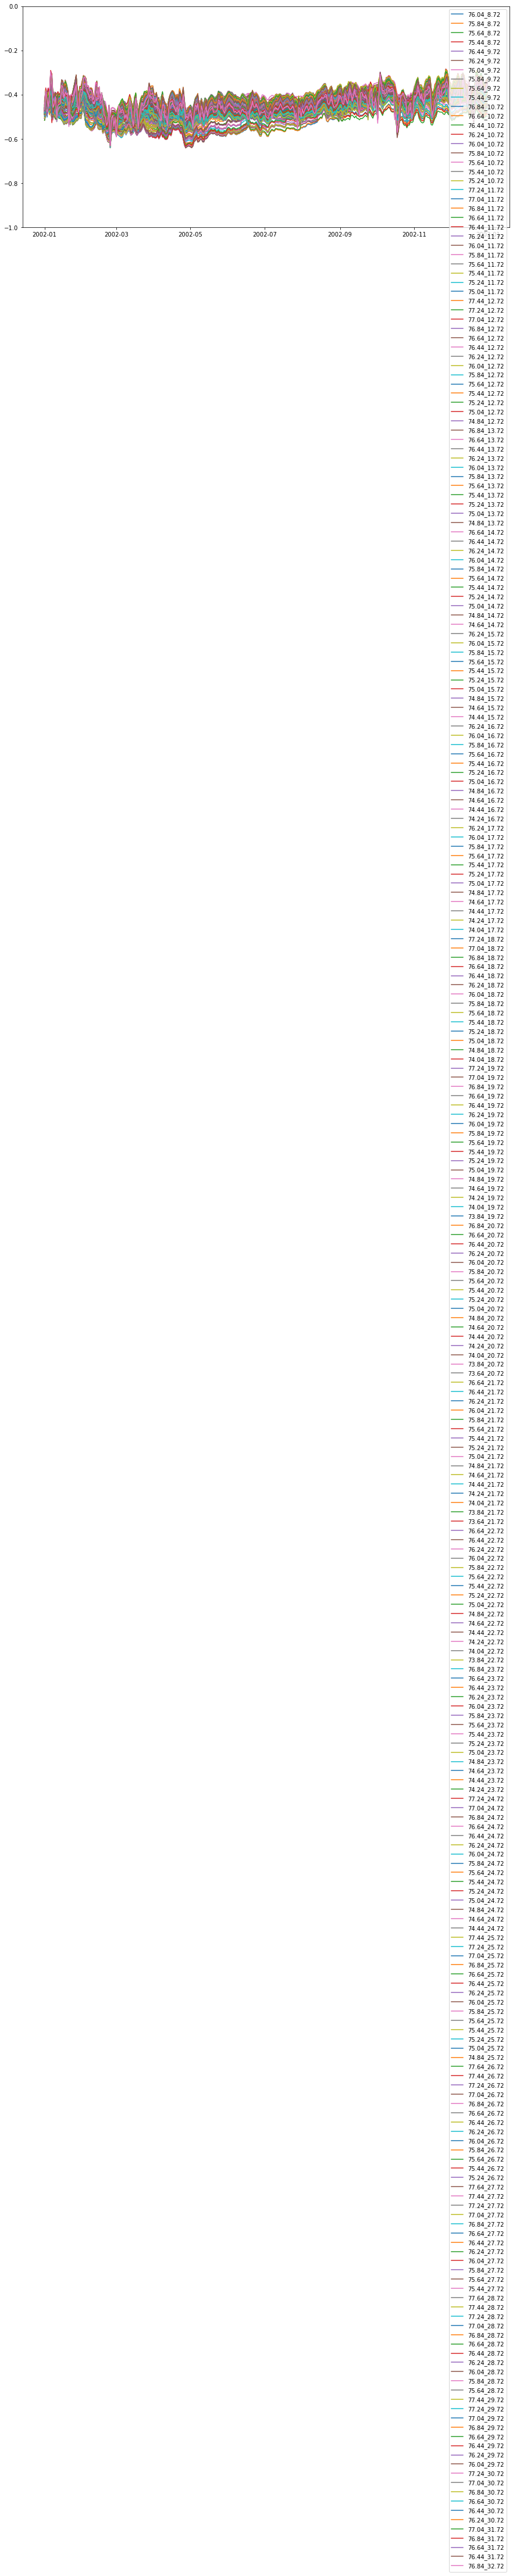

In [20]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

for key in list(names_dict.keys()):
    if key!='dates':
        plt.plot(pd_df['dates'], pd_df[key], label=key)
plt.ylim(-1, 0)
plt.legend()
plt.show()

# Пропусков нет - круть

## Создаем дататест по сетке с NEMO_SPITZ

In [9]:
nemo_data_folder='./dataset_SPITZ12'

In [10]:
coordinates_from_map={'lat': points_ds['y'].tolist(),
                      'lon': points_ds['x'].tolist()}

names_dict={}

for i in range (len(coordinates_from_map['lat'])):
    name=str(coordinates_from_map['lat'][i])+'_'+str(coordinates_from_map['lon'][i])
    names_dict[name]=[]
    
for file in os.listdir(nemo_data_folder):
    print(file)        
    try:
        ds = nc.Dataset(os.path.join(nemo_data_folder, file))
    except Exception as e:
        print(e)
        pass
            
    for i in range (len(coordinates_from_map['lat'])):        
        
        sea_level=np.array(ds['zos'][:, :, :])[0]

        in_lat = coordinates_from_map['lat'][i]
        in_lon = coordinates_from_map['lon'][i]

        lats = np.array(ds['nav_lat'])
        lons = np.array(ds['nav_lon'])

        idx = idx_by_2coord([in_lat, in_lon], lats, lons)

        value=sea_level[idx[0], idx[1]]
        name=str(coordinates_from_map['lat'][i])+'_'+str(coordinates_from_map['lon'][i])
        names_dict[name].append(value)

SPITZ_1d_00010101_00011231_grid_T_00010101-00010101.nc
SPITZ_1d_00010101_00011231_grid_T_00010101-00010101.nc.aux.xml
[Errno -51] NetCDF: Unknown file format: b'./dataset_SPITZ12\\SPITZ_1d_00010101_00011231_grid_T_00010101-00010101.nc.aux.xml'
SPITZ_1d_00010101_00011231_grid_T_00010102-00010102.nc
SPITZ_1d_00010101_00011231_grid_T_00010103-00010103.nc
SPITZ_1d_00010101_00011231_grid_T_00010104-00010104.nc
SPITZ_1d_00010101_00011231_grid_T_00010105-00010105.nc
SPITZ_1d_00010101_00011231_grid_T_00010106-00010106.nc
SPITZ_1d_00010101_00011231_grid_T_00010107-00010107.nc
SPITZ_1d_00010101_00011231_grid_T_00010108-00010108.nc
SPITZ_1d_00010101_00011231_grid_T_00010109-00010109.nc
SPITZ_1d_00010101_00011231_grid_T_00010110-00010110.nc
SPITZ_1d_00010101_00011231_grid_T_00010111-00010111.nc
SPITZ_1d_00010101_00011231_grid_T_00010112-00010112.nc
SPITZ_1d_00010101_00011231_grid_T_00010113-00010113.nc
SPITZ_1d_00010101_00011231_grid_T_00010114-00010114.nc
SPITZ_1d_00010101_00011231_grid_T_0001011

SPITZ_1d_00010101_00011231_grid_T_00010527-00010527.nc
SPITZ_1d_00010101_00011231_grid_T_00010528-00010528.nc
SPITZ_1d_00010101_00011231_grid_T_00010529-00010529.nc
SPITZ_1d_00010101_00011231_grid_T_00010530-00010530.nc
SPITZ_1d_00010101_00011231_grid_T_00010531-00010531.nc
SPITZ_1d_00010101_00011231_grid_T_00010601-00010601.nc
SPITZ_1d_00010101_00011231_grid_T_00010602-00010602.nc
SPITZ_1d_00010101_00011231_grid_T_00010603-00010603.nc
SPITZ_1d_00010101_00011231_grid_T_00010604-00010604.nc
SPITZ_1d_00010101_00011231_grid_T_00010605-00010605.nc
SPITZ_1d_00010101_00011231_grid_T_00010606-00010606.nc
SPITZ_1d_00010101_00011231_grid_T_00010607-00010607.nc
SPITZ_1d_00010101_00011231_grid_T_00010608-00010608.nc
SPITZ_1d_00010101_00011231_grid_T_00010609-00010609.nc
SPITZ_1d_00010101_00011231_grid_T_00010610-00010610.nc
SPITZ_1d_00010101_00011231_grid_T_00010611-00010611.nc
SPITZ_1d_00010101_00011231_grid_T_00010612-00010612.nc
SPITZ_1d_00010101_00011231_grid_T_00010613-00010613.nc
SPITZ_1d_0

SPITZ_1d_00010101_00011231_grid_T_00011023-00011023.nc
SPITZ_1d_00010101_00011231_grid_T_00011024-00011024.nc
SPITZ_1d_00010101_00011231_grid_T_00011025-00011025.nc
SPITZ_1d_00010101_00011231_grid_T_00011026-00011026.nc
SPITZ_1d_00010101_00011231_grid_T_00011027-00011027.nc
SPITZ_1d_00010101_00011231_grid_T_00011028-00011028.nc
SPITZ_1d_00010101_00011231_grid_T_00011029-00011029.nc
SPITZ_1d_00010101_00011231_grid_T_00011030-00011030.nc
SPITZ_1d_00010101_00011231_grid_T_00011031-00011031.nc
SPITZ_1d_00010101_00011231_grid_T_00011101-00011101.nc
SPITZ_1d_00010101_00011231_grid_T_00011102-00011102.nc
SPITZ_1d_00010101_00011231_grid_T_00011103-00011103.nc
SPITZ_1d_00010101_00011231_grid_T_00011104-00011104.nc
SPITZ_1d_00010101_00011231_grid_T_00011105-00011105.nc
SPITZ_1d_00010101_00011231_grid_T_00011106-00011106.nc
SPITZ_1d_00010101_00011231_grid_T_00011107-00011107.nc
SPITZ_1d_00010101_00011231_grid_T_00011108-00011108.nc
SPITZ_1d_00010101_00011231_grid_T_00011109-00011109.nc
SPITZ_1d_0

In [14]:
pd_df = pd.DataFrame(names_dict, columns = list(names_dict.keys()))
per = pd.date_range(start ='1-1-2002', end ='1-1-2003', freq ='1D')
pd_df['dates']=per
pd_df=pd_df.sort_values(by=['dates'])
pd_df.to_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID.csv', sep=';', index=False)
pd_df

76.04_8.72  75.84_8.72  75.64_8.72  75.44_8.72  76.44_9.72  76.24_9.72  \
0     -0.942993   -0.937628   -0.930204   -0.926181   -0.949348   -0.954056   
1     -0.942993   -0.937628   -0.930204   -0.926181   -0.949348   -0.954056   
2     -0.954143   -0.949737   -0.943272   -0.941566   -0.963461   -0.964639   
3     -0.931632   -0.929046   -0.923890   -0.923869   -0.941948   -0.942619   
4     -0.916045   -0.914592   -0.909500   -0.909975   -0.932103   -0.931216   
..          ...         ...         ...         ...         ...         ...   
361   -0.926950   -0.936539   -0.923194   -0.904722   -0.943568   -0.933682   
362   -0.938924   -0.949687   -0.938435   -0.915860   -0.955742   -0.947546   
363   -0.949362   -0.961301   -0.950975   -0.923545   -0.966302   -0.959826   
364   -0.957105   -0.970395   -0.961219   -0.931276   -0.973440   -0.968722   
365   -0.958535   -0.972930   -0.962517   -0.934586   -0.973185   -0.969175   

     76.04_9.72  75.84_9.72  75.64_9.72  75.44_9.72  ...  76.84_30.72  \
0     -0.942295   -0.939654   -0.938162   -0.943516  ...    -0.865533   
1     -0.942295   -0.939654   -0.938162   -0.943516  ...    -0.865533   
2     -0.952621   -0.951219   -0.952585   -0.960035  ...    -0.876808   
3     -0.934764   -0.935740   -0.937847   -0.943613  ...    -0.896532   
4     -0.922982   -0.923508   -0.924925   -0.927923  ...    -0.882398   
..          ...         ...         ...         ...  ...          ...   
361   -0.917024   -0.907105   -0.900654   -0.908947  ...    -0.778285   
362   -0.927565   -0.920571   -0.912849   -0.920480  ...    -0.782651   
363   -0.937372   -0.934917   -0.924476   -0.930004  ...    -0.781056   
364   -0.946500   -0.949262   -0.935017   -0.937616  ...    -0.779540   
365   -0.952673   -0.957135   -0.939563   -0.939779  ...    -0.784372   

     76.64_30.72  76.44_30.72  76.24_30.72  77.04_31.72  76.84_31.72  \
0      -0.880952    -0.885008    -0.887473    -0.855233    -0.856440   
1      -0.880952    -0.885008    -0.887473    -0.855233    -0.856440   
2      -0.891283    -0.896531    -0.900448    -0.870082    -0.876918   
3      -0.908186    -0.911249    -0.913017    -0.889516    -0.898641   
4      -0.890130    -0.889501    -0.890809    -0.876646    -0.878063   
..           ...          ...          ...          ...          ...   
361    -0.773105    -0.771124    -0.771343    -0.785147    -0.780579   
362    -0.777705    -0.774124    -0.773126    -0.789242    -0.785402   
363    -0.776708    -0.772152    -0.770868    -0.786105    -0.781754   
364    -0.778097    -0.775524    -0.776043    -0.782384    -0.778408   
365    -0.785398    -0.784189    -0.785722    -0.785718    -0.783202   

     76.64_31.72  76.44_31.72  76.84_32.72      dates  
0      -0.861575    -0.875327    -0.857126 2002-01-01  
1      -0.861575    -0.875327    -0.857126 2002-01-02  
2      -0.881961    -0.893854    -0.881724 2002-01-03  
3      -0.898054    -0.906221    -0.893768 2002-01-04  
4      -0.878136    -0.886778    -0.869840 2002-01-05  
..           ...          ...          ...        ...  
361    -0.772303    -0.773564    -0.795469 2002-12-28  
362    -0.777304    -0.777887    -0.799299 2002-12-29  
363    -0.774197    -0.775878    -0.793030 2002-12-30  
364    -0.773417    -0.779315    -0.788577 2002-12-31  
365    -0.780940    -0.789972    -0.792804 2003-01-01  

[366 rows x 278 columns]

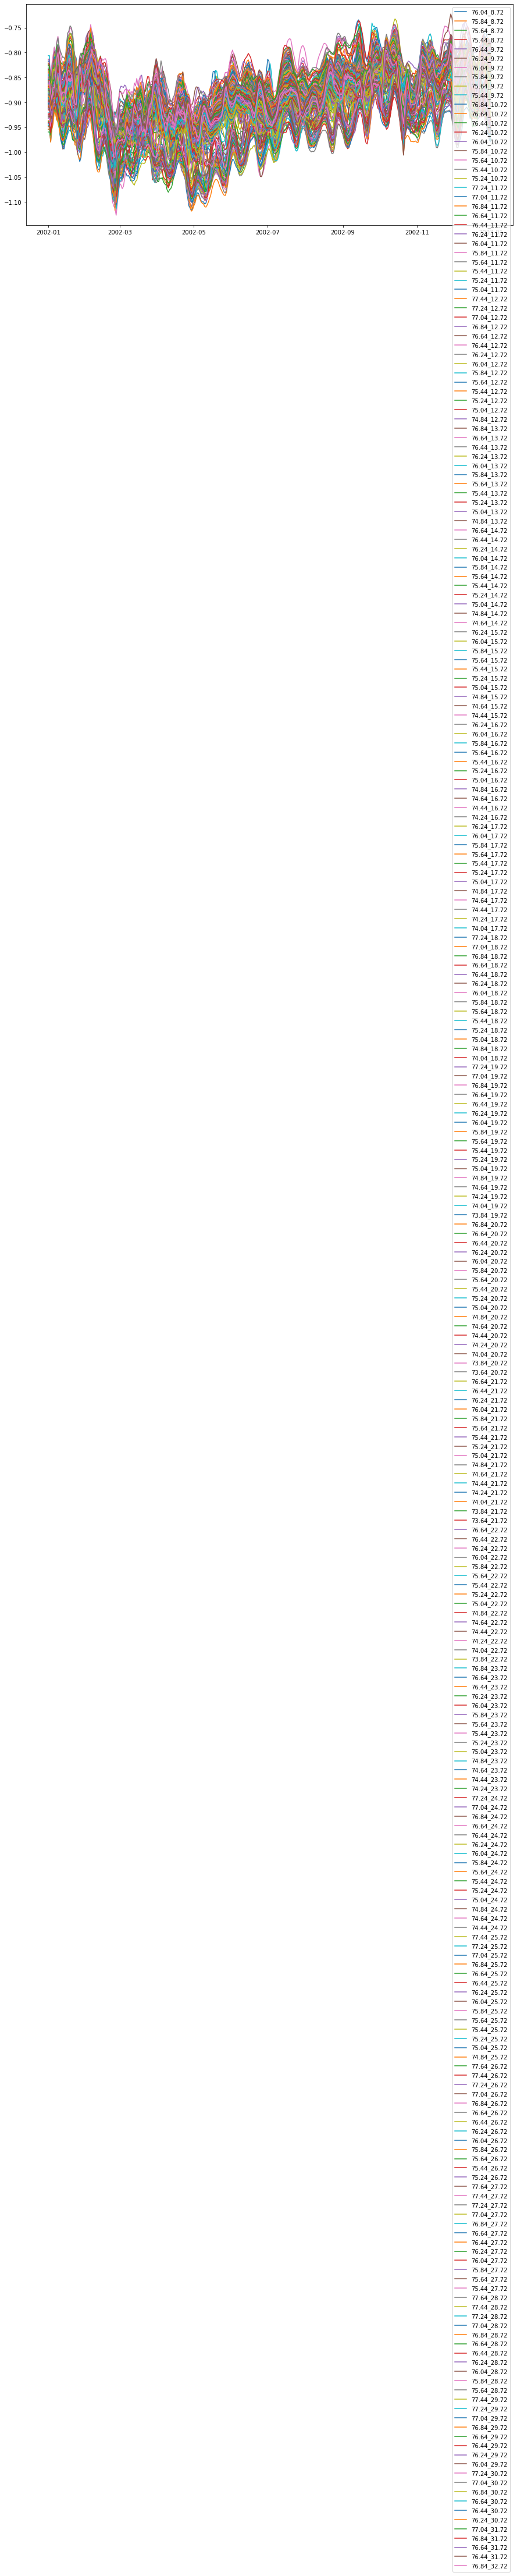

In [13]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

for key in list(names_dict.keys()):
    if key!='dates':
        plt.plot(pd_df['dates'], pd_df[key], label=key)

plt.legend()
plt.show()

## Сделаем моделирование для каждого временного ряда ARIM'ой и гибридизацией с NEMO и подобьем статистику

In [62]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%d.%m.%Y')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            
df_nemo

76.04_8.72  75.84_8.72  75.64_8.72  75.44_8.72  76.44_9.72  76.24_9.72  \
0      0.043496    0.041205    0.043296    0.049496    0.018957    0.020623   
1      0.047268    0.046536    0.044069    0.050039    0.019246    0.021221   
2      0.044126    0.044443    0.036774    0.041407    0.010971    0.014720   
3      0.062028    0.062371    0.050494    0.054275    0.025246    0.029794   
4      0.071914    0.072430    0.058286    0.061006    0.027560    0.035322   
..          ...         ...         ...         ...         ...         ...   
360    0.045611    0.054914    0.059584    0.077185    0.028578    0.029135   
361    0.040227    0.046561    0.047235    0.068944    0.020274    0.021585   
362    0.036336    0.040292    0.039558    0.064122    0.014276    0.015902   
363    0.032965    0.035805    0.034460    0.062205    0.009790    0.011852   
364    0.031678    0.033542    0.031623    0.061194    0.008079    0.010965   

     76.04_9.72  75.84_9.72  75.64_9.72  75.44_9.72  ...  76.84_30.72  \
0      0.043043    0.037323    0.030662    0.021557  ...    -0.006893   
1      0.045237    0.040602    0.034548    0.025336  ...     0.000493   
2      0.043880    0.036382    0.029206    0.017985  ...    -0.004167   
3      0.058684    0.048697    0.041713    0.030885  ...    -0.010836   
4      0.063933    0.056161    0.049207    0.039845  ...    -0.000004   
..          ...         ...         ...         ...  ...          ...   
360    0.054378    0.072661    0.074267    0.059977  ...     0.111664   
361    0.049065    0.066814    0.069268    0.056660  ...     0.103190   
362    0.045349    0.060325    0.064344    0.053484  ...     0.099011   
363    0.042518    0.053357    0.060313    0.050977  ...     0.098158   
364    0.040451    0.046910    0.057708    0.049543  ...     0.096756   

     76.64_30.72  76.44_30.72  76.24_30.72  77.04_31.72  76.84_31.72  \
0      -0.016234    -0.021648    -0.021540     0.006230     0.002845   
1      -0.009252    -0.014643    -0.014258     0.013718     0.008249   
2      -0.012748    -0.017804    -0.017722     0.007621    -0.002128   
3      -0.015992    -0.018431    -0.017348    -0.000368    -0.010376   
4      -0.003843    -0.003772    -0.002390     0.010757     0.006049   
..           ...          ...          ...          ...          ...   
360     0.117896     0.114245     0.115759     0.105825     0.109763   
361     0.108623     0.107286     0.109981     0.097514     0.100478   
362     0.102547     0.102639     0.105849     0.095617     0.095864   
363     0.100042     0.100620     0.103715     0.097523     0.095937   
364     0.095937     0.094964     0.096638     0.098726     0.096455   

     76.64_31.72  76.44_31.72  76.84_32.72      dates  
0      -0.005700    -0.013671     0.009085 2002-01-01  
1       0.000039    -0.006766     0.014637 2002-01-02  
2      -0.008281    -0.012912     0.003973 2002-01-03  
3      -0.011623    -0.014038     0.001755 2002-01-04  
4       0.003313    -0.000569     0.019566 2002-01-05  
..           ...          ...          ...        ...  
360     0.112713     0.115663     0.101524 2002-12-27  
361     0.104291     0.107933     0.094374 2002-12-28  
362     0.098940     0.101429     0.090882 2002-12-29  
363     0.098053     0.098531     0.092439 2002-12-30  
364     0.095877     0.092865     0.094673 2002-12-31  

[365 rows x 278 columns]

In [59]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
df_rean

76.04_8.72  75.84_8.72  75.64_8.72  75.44_8.72  76.44_9.72  76.24_9.72  \
0      0.034992    0.034718    0.032032    0.027844    0.026310    0.028339   
1      0.058270    0.058306    0.055602    0.050686    0.049921    0.051845   
2      0.062436    0.062537    0.059925    0.055279    0.054040    0.055957   
3      0.063424    0.063512    0.061063    0.056140    0.054533    0.056757   
4      0.056305    0.056191    0.053409    0.047372    0.047233    0.049387   
..          ...         ...         ...         ...         ...         ...   
360    0.053847    0.047681    0.039707    0.041549    0.063631    0.066376   
361    0.056429    0.049822    0.040671    0.040778    0.063836    0.067421   
362    0.059627    0.053090    0.045162    0.045927    0.066616    0.070397   
363    0.066121    0.059172    0.051419    0.052143    0.075578    0.078953   
364    0.063762    0.056489    0.048829    0.048968    0.074870    0.078118   

     76.04_9.72  75.84_9.72  75.64_9.72  75.44_9.72  ...  76.84_30.72  \
0      0.027947    0.027634    0.026690    0.016180  ...    -0.020535   
1      0.052467    0.052148    0.051075    0.040347  ...     0.022316   
2      0.057700    0.057536    0.056527    0.046154  ...     0.012881   
3      0.059166    0.058829    0.057676    0.046912  ...    -0.017130   
4      0.050545    0.049952    0.048565    0.036534  ...     0.012275   
..          ...         ...         ...         ...  ...          ...   
360    0.062971    0.055390    0.049154    0.048711  ...     0.080870   
361    0.064336    0.056341    0.049220    0.048054  ...     0.059155   
362    0.067439    0.059568    0.052695    0.052243  ...     0.059734   
363    0.074769    0.066495    0.059423    0.059202  ...     0.067323   
364    0.073466    0.064834    0.057580    0.057303  ...     0.079710   

     76.64_30.72  76.44_30.72  76.24_30.72  77.04_31.72  76.84_31.72  \
0      -0.027864    -0.034043    -0.034043     0.008050     0.000913   
1       0.014934     0.009822     0.009822     0.050113     0.046925   
2       0.001712    -0.008514    -0.008514     0.039593     0.032066   
3      -0.022521    -0.022301    -0.022301     0.002329    -0.001674   
4       0.009005     0.006407     0.006407     0.034164     0.037784   
..           ...          ...          ...          ...          ...   
360     0.076975     0.081327     0.081327     0.091999     0.084992   
361     0.056916     0.064658     0.064658     0.071171     0.066003   
362     0.057916     0.064062     0.064062     0.076493     0.074301   
363     0.065050     0.070196     0.070196     0.084828     0.082266   
364     0.077438     0.080678     0.080678     0.097847     0.095381   

     76.64_31.72  76.44_31.72  76.84_32.72      dates  
0      -0.021561    -0.030222     0.001356 2002-01-01  
1       0.027756     0.020172     0.049706 2002-01-02  
2       0.008459    -0.002192     0.025435 2002-01-03  
3      -0.016318    -0.021154     0.004181 2002-01-04  
4       0.022573     0.016598     0.045194 2002-01-05  
..           ...          ...          ...        ...  
360     0.073588     0.072650     0.071904 2002-12-27  
361     0.055439     0.054380     0.060337 2002-12-28  
362     0.060417     0.056684     0.070495 2002-12-29  
363     0.066639     0.062536     0.074877 2002-12-30  
364     0.079860     0.075920     0.088263 2002-12-31  

[365 rows x 278 columns]

In [63]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [77]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA', 'KS_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB', 'KS_HYB'])

for column in list(df_rean.columns.values):
    if column!='dates':
        test = df_rean[column][-105:]
        test.index = df_rean['dates'][-105:]
        data = df_rean[column][:-105]
        data.index = df_rean['dates'][:-105]

        nemo_pr=df_nemo[column][-105:]
        nemo_pr.index = df_nemo['dates'][-105:]

        stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
        model_res = stlf.fit()
        forecasts = model_res.forecast(105)

        hybrid_forecact=(nemo_pr+forecasts)/2
        
        params_hyb = norm.fit(test-hybrid_forecact)
        ks_hyb = kstest(test-hybrid_forecact, 'norm', params, N=1000)[1]
        params_ARIMA = norm.fit(test-forecasts)
        ks_ARIMA = kstest(test-forecasts, 'norm', params, N=1000)[1]
        
        '''
        plt.rcParams['figure.figsize'] = [17, 4]
        plt.plot(data, label='Train')
        plt.plot(test, c='r', label='Test')
        plt.plot(hybrid_forecact, label='Hybrid')
        plt.plot(forecasts, label='ARIMA', linewidth=0.5)
        plt.plot(df_nemo['dates'], df_nemo[column], label='NEMO', linewidth=0.5)

        plt.title(df_rean[column].name)
        plt.legend()
        plt.grid()
        plt.show()
        '''
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': mean_squared_error(test, forecasts),
                                      'MAE_ARIMA':mean_absolute_error(test, forecasts),
                                      'MAPE_ARIMA':round(np.mean(np.abs(test-forecasts)/test)*100,3),
                                      'R^2_ARIMA':r2_score(test, forecasts),
                                      'KS_ARIMA':ks_ARIMA,
                                      'MSE_HYB':mean_squared_error(test, hybrid_forecact),
                                      'MAE_HYB':mean_absolute_error(test, hybrid_forecact),
                                      'MAPE_HYB':round(np.mean(np.abs(test-hybrid_forecact)/test)*100,3),
                                      'R^2_HYB':r2_score(test, hybrid_forecact),
                                      'KS_HYB':ks_hyb,
                                     } , ignore_index=True)
        '''
        print('Hybrid:')
        print("MSE = ", mean_squared_error(test, hybrid_forecact))
        print("MAE = ", mean_absolute_error(test, hybrid_forecact))
        print("MAPE = ", round(np.mean(np.abs(test-hybrid_forecact)/test)*100,3))
        print("R^2 = ", r2_score(test, hybrid_forecact))        
        print('\n')
        print('ARIMA:')
        print("MSE = ", mean_squared_error(test, forecasts))
        print("MAE = ", mean_absolute_error(test, forecasts))
        print("MAPE = ", round(np.mean(np.abs(test-forecasts)/test)*100,3))
        print("R^2 = ", r2_score(test, forecasts))

        plt.rcParams['figure.figsize'] = [4, 4]
        sns.distplot(test-hybrid_forecact)
        plt.show()
        '''
errors_df

POINT  MSE_ARIMA  MAE_ARIMA  MAPE_ARIMA  R^2_ARIMA      KS_ARIMA  \
0     76.04_8.72   0.000313   0.013806      27.756  -0.414904  8.658555e-15   
1     75.84_8.72   0.000223   0.011373      29.050  -0.105822  1.281695e-08   
2     75.64_8.72   0.000153   0.009308      26.323   0.151059  9.038797e-04   
3     75.44_8.72   0.000172   0.009842      32.949   0.107688  1.391423e-06   
4     76.44_9.72   0.000325   0.014418      22.264  -0.133968  3.331730e-13   
..           ...        ...        ...         ...        ...           ...   
272  77.04_31.72   0.001094   0.026196      31.042   0.398227  9.729972e-14   
273  76.84_31.72   0.001059   0.025771      31.445   0.444881  5.692690e-11   
274  76.64_31.72   0.000901   0.022521       3.773   0.549537  4.415490e-04   
275  76.44_31.72   0.000948   0.022656      18.552   0.555450  4.592298e-03   
276  76.84_32.72   0.001070   0.026460       9.091   0.404596  1.003272e-14   

      MSE_HYB   MAE_HYB  MAPE_HYB   R^2_HYB        KS_HYB  
0    0.000236  0.011910    25.055 -0.069203  1.536444e-06  
1    0.000137  0.008943    24.668  0.319559  8.424171e-06  
2    0.000115  0.008078    23.437  0.361944  7.562516e-05  
3    0.000192  0.010675    34.441  0.002648  1.077723e-06  
4    0.000545  0.019037    29.027 -0.904133  2.860380e-18  
..        ...       ...       ...       ...           ...  
272  0.000868  0.023160    34.034  0.522761  1.430341e-03  
273  0.000919  0.024323    44.403  0.518541  4.221367e-04  
274  0.000875  0.022908    38.258  0.562274  1.853651e-01  
275  0.000904  0.023130    43.146  0.576342  1.554713e-01  
276  0.000839  0.022789   -13.270  0.533316  2.636804e-03  

[277 rows x 11 columns]

In [83]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])
errors_df['KS_DIF']=abs(errors_df['KS_HYB'])-abs(errors_df['KS_ARIMA'])
errors_df

POINT  MSE_ARIMA  MAE_ARIMA  MAPE_ARIMA  R^2_ARIMA      KS_ARIMA  \
0     76.04_8.72   0.000313   0.013806      27.756  -0.414904  8.658555e-15   
1     75.84_8.72   0.000223   0.011373      29.050  -0.105822  1.281695e-08   
2     75.64_8.72   0.000153   0.009308      26.323   0.151059  9.038797e-04   
3     75.44_8.72   0.000172   0.009842      32.949   0.107688  1.391423e-06   
4     76.44_9.72   0.000325   0.014418      22.264  -0.133968  3.331730e-13   
..           ...        ...        ...         ...        ...           ...   
272  77.04_31.72   0.001094   0.026196      31.042   0.398227  9.729972e-14   
273  76.84_31.72   0.001059   0.025771      31.445   0.444881  5.692690e-11   
274  76.64_31.72   0.000901   0.022521       3.773   0.549537  4.415490e-04   
275  76.44_31.72   0.000948   0.022656      18.552   0.555450  4.592298e-03   
276  76.84_32.72   0.001070   0.026460       9.091   0.404596  1.003272e-14   

      MSE_HYB   MAE_HYB  MAPE_HYB   R^2_HYB        KS_HYB   MSE_DIF   MAE_DIF  \
0    0.000236  0.011910    25.055 -0.069203  1.536444e-06 -0.000076 -0.001896   
1    0.000137  0.008943    24.668  0.319559  8.424171e-06 -0.000086 -0.002430   
2    0.000115  0.008078    23.437  0.361944  7.562516e-05 -0.000038 -0.001230   
3    0.000192  0.010675    34.441  0.002648  1.077723e-06  0.000020  0.000832   
4    0.000545  0.019037    29.027 -0.904133  2.860380e-18  0.000221  0.004619   
..        ...       ...       ...       ...           ...       ...       ...   
272  0.000868  0.023160    34.034  0.522761  1.430341e-03 -0.000226 -0.003036   
273  0.000919  0.024323    44.403  0.518541  4.221367e-04 -0.000141 -0.001448   
274  0.000875  0.022908    38.258  0.562274  1.853651e-01 -0.000025  0.000387   
275  0.000904  0.023130    43.146  0.576342  1.554713e-01 -0.000045  0.000474   
276  0.000839  0.022789   -13.270  0.533316  2.636804e-03 -0.000231 -0.003671   

     MAPE_DIF   R^2_DIF        KS_DIF  
0      -2.701 -0.345702  1.536444e-06  
1      -4.382  0.213738  8.411354e-06  
2      -2.886  0.210886 -8.282545e-04  
3       1.492 -0.105040 -3.137002e-07  
4       6.763  0.770165 -3.331701e-13  
..        ...       ...           ...  
272     2.992  0.124534  1.430341e-03  
273    12.958  0.073660  4.221367e-04  
274    34.485  0.012736  1.849236e-01  
275    24.594  0.020891  1.508790e-01  
276     4.179  0.128720  2.636804e-03  

[277 rows x 16 columns]

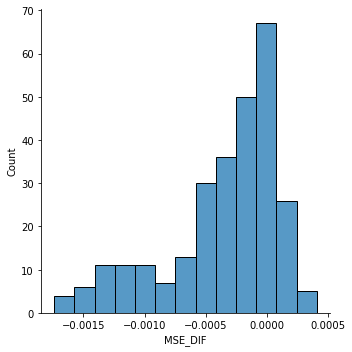

In [79]:
sns.displot(errors_df, x="MSE_DIF")

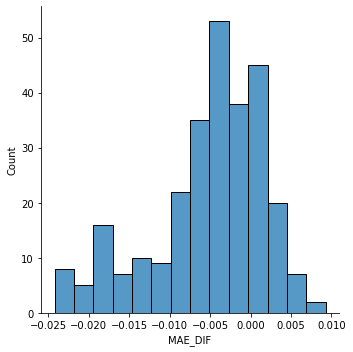

In [80]:
sns.displot(errors_df, x="MAE_DIF")

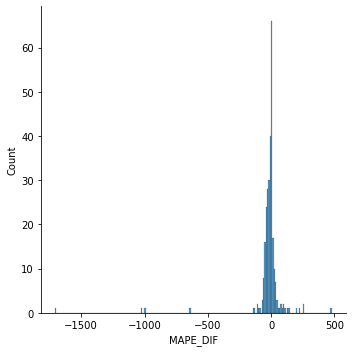

In [81]:
sns.displot(errors_df, x="MAPE_DIF")

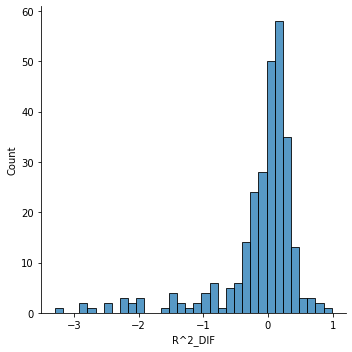

In [82]:
sns.displot(errors_df, x="R^2_DIF")

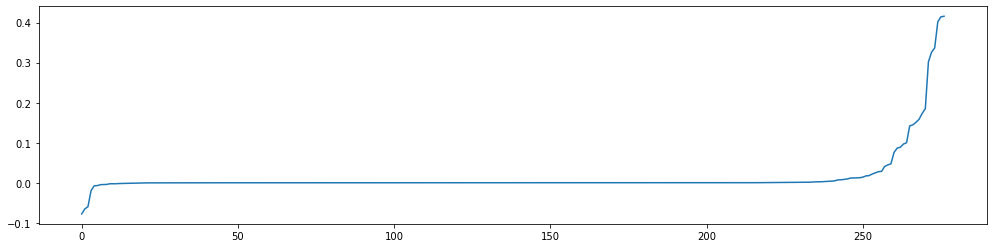

In [98]:
plt.rcParams['figure.figsize'] = [17, 4]
l=errors_df['KS_DIF'].tolist()
l.sort()
plt.plot(np.arange(len(l)), l)

In [99]:
lat = []  
lon = []
for values in errors_df['POINT']:
    lat.append(values.split('_')[0])
    lon.append(values.split('_')[1])

errors_df['lat'] = lat
errors_df['lon'] = lon
errors_df

POINT  MSE_ARIMA  MAE_ARIMA  MAPE_ARIMA  R^2_ARIMA      KS_ARIMA  \
0     76.04_8.72   0.000313   0.013806      27.756  -0.414904  8.658555e-15   
1     75.84_8.72   0.000223   0.011373      29.050  -0.105822  1.281695e-08   
2     75.64_8.72   0.000153   0.009308      26.323   0.151059  9.038797e-04   
3     75.44_8.72   0.000172   0.009842      32.949   0.107688  1.391423e-06   
4     76.44_9.72   0.000325   0.014418      22.264  -0.133968  3.331730e-13   
..           ...        ...        ...         ...        ...           ...   
272  77.04_31.72   0.001094   0.026196      31.042   0.398227  9.729972e-14   
273  76.84_31.72   0.001059   0.025771      31.445   0.444881  5.692690e-11   
274  76.64_31.72   0.000901   0.022521       3.773   0.549537  4.415490e-04   
275  76.44_31.72   0.000948   0.022656      18.552   0.555450  4.592298e-03   
276  76.84_32.72   0.001070   0.026460       9.091   0.404596  1.003272e-14   

      MSE_HYB   MAE_HYB  MAPE_HYB   R^2_HYB        KS_HYB   MSE_DIF   MAE_DIF  \
0    0.000236  0.011910    25.055 -0.069203  1.536444e-06 -0.000076 -0.001896   
1    0.000137  0.008943    24.668  0.319559  8.424171e-06 -0.000086 -0.002430   
2    0.000115  0.008078    23.437  0.361944  7.562516e-05 -0.000038 -0.001230   
3    0.000192  0.010675    34.441  0.002648  1.077723e-06  0.000020  0.000832   
4    0.000545  0.019037    29.027 -0.904133  2.860380e-18  0.000221  0.004619   
..        ...       ...       ...       ...           ...       ...       ...   
272  0.000868  0.023160    34.034  0.522761  1.430341e-03 -0.000226 -0.003036   
273  0.000919  0.024323    44.403  0.518541  4.221367e-04 -0.000141 -0.001448   
274  0.000875  0.022908    38.258  0.562274  1.853651e-01 -0.000025  0.000387   
275  0.000904  0.023130    43.146  0.576342  1.554713e-01 -0.000045  0.000474   
276  0.000839  0.022789   -13.270  0.533316  2.636804e-03 -0.000231 -0.003671   

     MAPE_DIF   R^2_DIF        KS_DIF    lat    lon  
0      -2.701 -0.345702  1.536444e-06  76.04   8.72  
1      -4.382  0.213738  8.411354e-06  75.84   8.72  
2      -2.886  0.210886 -8.282545e-04  75.64   8.72  
3       1.492 -0.105040 -3.137002e-07  75.44   8.72  
4       6.763  0.770165 -3.331701e-13  76.44   9.72  
..        ...       ...           ...    ...    ...  
272     2.992  0.124534  1.430341e-03  77.04  31.72  
273    12.958  0.073660  4.221367e-04  76.84  31.72  
274    34.485  0.012736  1.849236e-01  76.64  31.72  
275    24.594  0.020891  1.508790e-01  76.44  31.72  
276     4.179  0.128720  2.636804e-03  76.84  32.72  

[277 rows x 18 columns]

In [101]:
errors_df.to_csv('./errors_report_ARIMA_vs_Hybrid.csv', sep=';', index=False)